## Final Project Submission

Please fill out:
* Student name: Sam Oliver
* Student pace: self paced
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://samoliverds.blogspot.com/2021/12/the-utility-of-using-r-squared-as.html


## Business Problem

The stakeholder is a real estate agency that wants to establish its group in the King's County area. Their aim is to find which characteristics create value in homes. The agency will then invest in homes with these characteristics.

## Import Data and Clean the Data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# imports for statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import meanabs

plt.style.use('seaborn')

In [2]:
# import the dataset
df = pd.read_csv('data/kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
# look at columns to see what can be dropped immediately
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Columns to drop:
* id: non-descriptive
* date: non-descriptive because all of the homes were sold from 2014-2015

In [4]:
# drop identified columns
df = df.drop(['id', 'date'], axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# check for null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Columns containing null objects: yr_renovated, waterfront, view
* I will assume that null values in yr_renovated have not been renovated and will set missing values to 0
* I will assume that null values in waterfront are not waterfront properties and will set these missing values to 0.
* I will assume that null values in view are properties that do not have views and will set these null objects to 0

In [6]:
# set NA values in yr_renovated, waterfront, and view to 0
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [7]:
# handle values of waterfront, grade, etc... object columns
obj_cols = ['waterfront', 'view', 'condition', 'grade', 'sqft_basement']
for c in obj_cols:
    print(df[c].unique())

[0 'NO' 'YES']
['NONE' 0 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0' '720.0' '700.0' '820.0' '780.0' '790.0' '330.0' '1620.0' '360.0'
 '588.0' '1510.0' '410.0' '990.0' '600.0' '560.0' '550.0' '1000.0'
 '1600.0' '500.0' '1040.0' '880.0' '1010.0' '240.0' '265.0' '290.0'
 '800.0' '540.0' '710.0' '840.0' '380.0' '770.0' '480.0' '570.0' '1490.0'
 '620.0' '1250.0' '1270.0' '120.0' '650.0' '180.0' '1130.0' '450.0'
 '1640.0' '1460.0' '1020.0' '1030.0' '750.0' '640.0' '1070.0' '490.0'
 '1310.0' '630.0' '2000.0' '390.0' '430.0' '850.0' '210.0' '1430.0'
 '1950.0' '440.0' '220.0' '1160.0' '860.0' '580.0' '2060.0' '1820.0'
 '1180.0' '200.0' '1150.0' '1200.0' '680.0' '530.0' '1450.0' '1170.0'
 '1080.0' '960.0' '280.0' '870.0' '1100.0' '460.0' '1400.0' '660

In [8]:
# handle values in object columns

# waterfront
df.loc[df['waterfront'] == 'NO', 'waterfront'] = 0
df.loc[df['waterfront'] == 'YES', 'waterfront'] = 1

# view
df.loc[df['view'] == 'NONE', 'view'] = 0
df.loc[df['view'] == 'FAIR', 'view'] = 1     # fair will be 1
df.loc[df['view'] == 'AVERAGE', 'view'] = 2      # average will be 2
df.loc[df['view'] == 'GOOD', 'view'] = 3    # good is 3
df.loc[df['view'] == 'EXCELLENT', 'view'] = 4     # excellent is 4

# condition
df.loc[df['condition'] == 'Poor', 'condition'] = 0
df.loc[df['condition'] == 'Fair', 'condition'] = 1     # fair will be 1
df.loc[df['condition'] == 'Average', 'condition'] = 2      # average will be 2
df.loc[df['condition'] == 'Good', 'condition'] = 3    # good is 3
df.loc[df['condition'] == 'Very Good', 'condition'] = 4     # very good is 4

# grade
df.loc[df['grade'] == '3 Poor', 'grade'] = 0
df.loc[df['grade'] == '4 Low', 'grade'] = 1     
df.loc[df['grade'] == '5 Fair', 'grade'] = 2      
df.loc[df['grade'] == '6 Low Average', 'grade'] = 3    
df.loc[df['grade'] == '7 Average', 'grade'] = 4     
df.loc[df['grade'] == '8 Good', 'grade'] = 5
df.loc[df['grade'] == '9 Better', 'grade'] = 6    
df.loc[df['grade'] == '10 Very Good', 'grade'] = 7      
df.loc[df['grade'] == '11 Excellent', 'grade'] = 8    
df.loc[df['grade'] == '12 Luxury', 'grade'] = 9     
df.loc[df['grade'] == '13 Mansion', 'grade'] = 10     

# sqft_basement - convert from string to float
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = '0'     # handle ? as 0

# convert altered values to integer
for c in obj_cols:
    # prevent issues of casting int to the string '0.0'
    if c == 'sqft_basement':
        df = df.astype({c: float})
        df = df.astype({c: int})
    else:
        df = df.astype({c: int})

# check
for c in obj_cols:
    print(df[c].unique())

[0 1]
[0 3 4 2 1]
[2 4 3 0 1]
[ 4  3  5  8  6  2  7  9  1  0 10]
[   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  710  840  380  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
  280  870 1100  460 1400  660 1220  900  420 1580 1380  475  690  270
  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470  370
  140 1760  130  520  890 1110  150 1720  810  190 1290  670 1800 1120
 1810   60 1050  940  310  930 1390  610 1830 1300  510 1330 1590  920
 1320 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520 1850
 1660 2130 2

In [9]:
# check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int32  
 7   view           21597 non-null  int32  
 8   condition      21597 non-null  int32  
 9   grade          21597 non-null  int32  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## Initial Exploration of Data

### Histogram of each variable

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

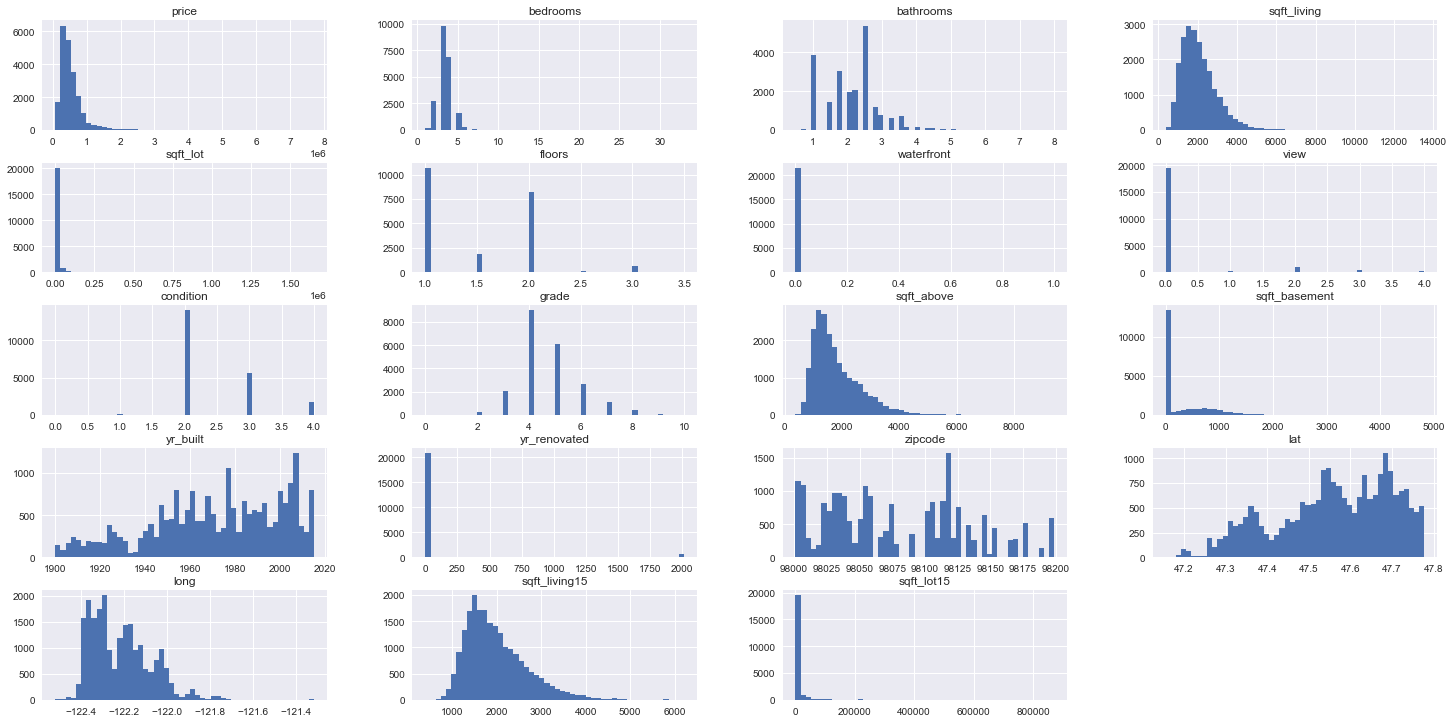

In [10]:
# plot histograms of all the columns in the set.
df.hist(bins=50, figsize=(25, 12.5))

Observations: 
* price, sqft_living, sqft_above, and sqft_living look approximately log-normally distributed.
* Most homes have 1-5 bedrooms
* long and lat look approximately to follow a trimodal distribution
* most homes do not have a view nor are waterfront properties
* most homes have a condition of 2 and many have a condition of 3
* grade is roughly normally distributed.
* most homes do not have a basement

### Scatterplot of each variable and price

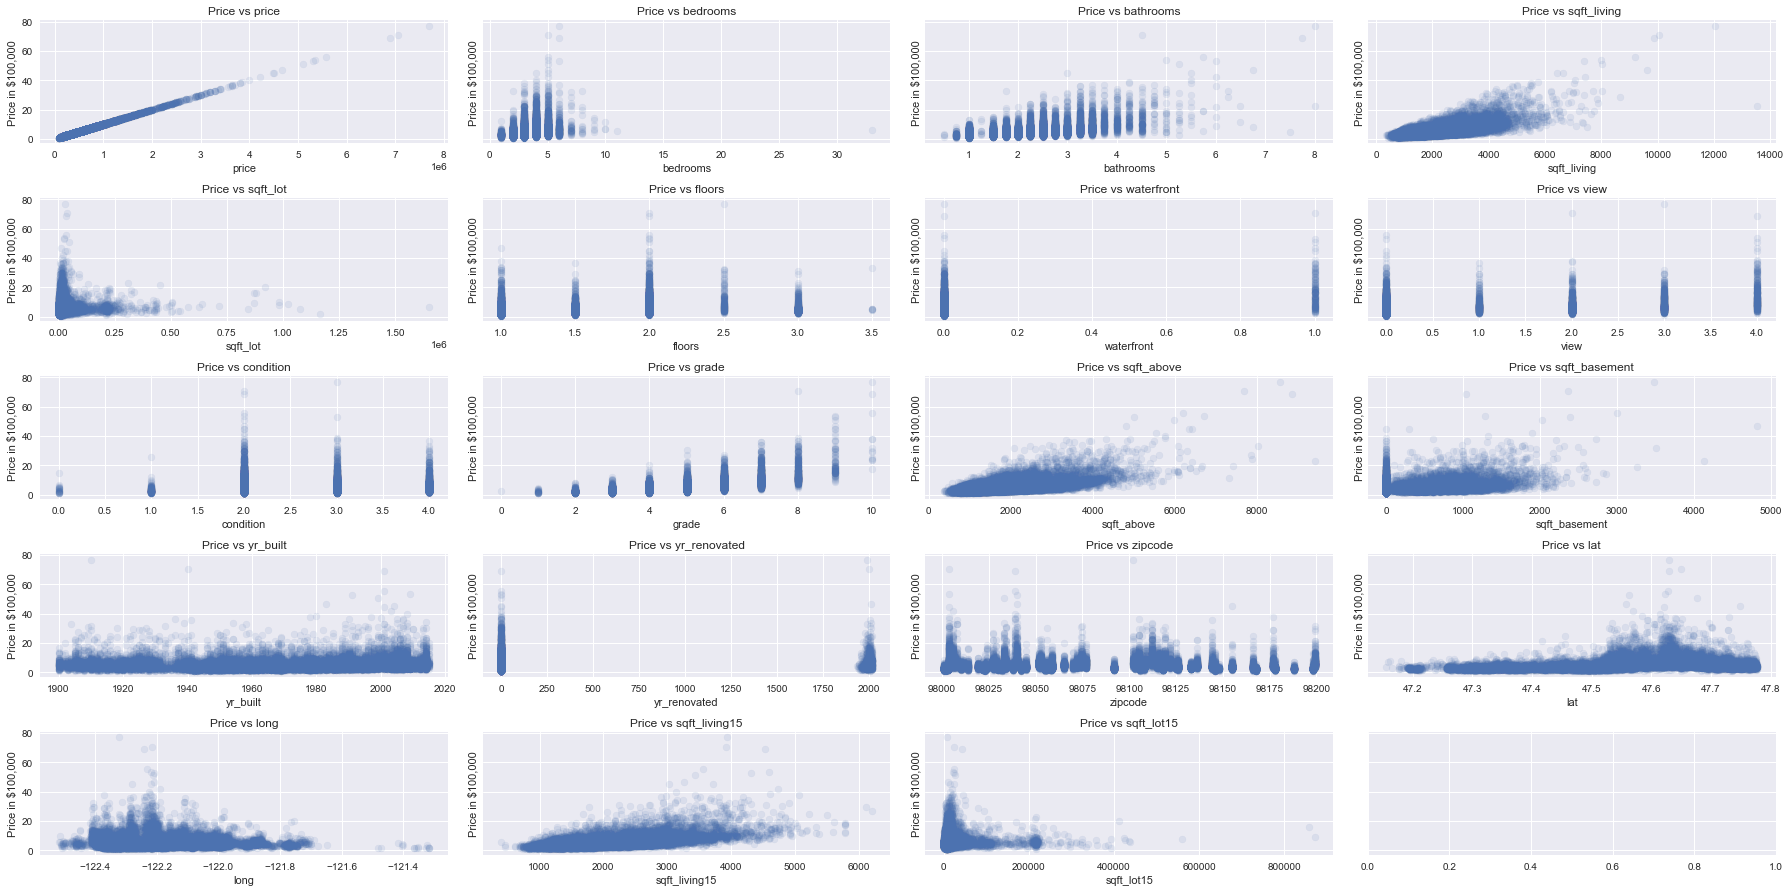

In [11]:
# visualize scatterplots of histograms with price as y variable
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

Observations:
* sqft_living and price are fairly linearly related.
* grade and price are somewhat linearly related
* sqft_above and sqft_living15 are somewhat linearly related to price.

### Correlation heatmap

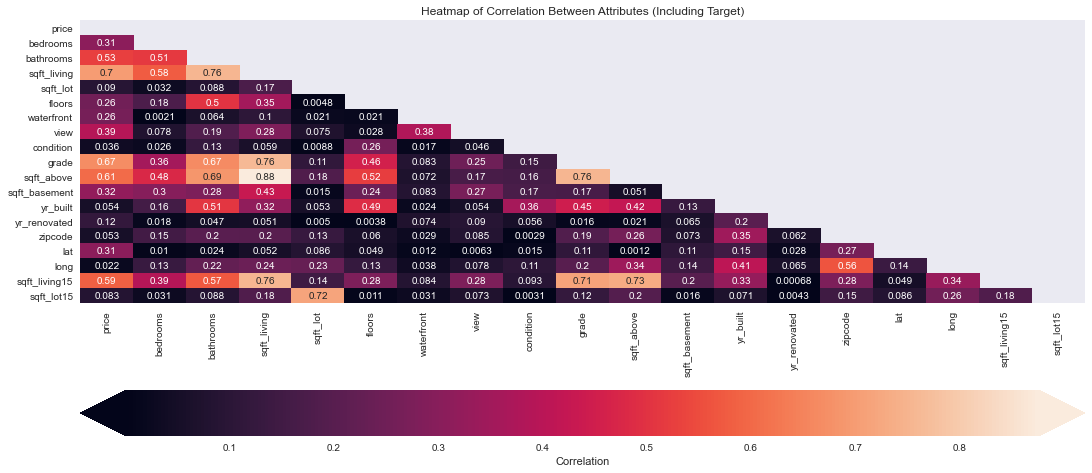

In [12]:
# adapted from dsc-linear-regression-lab
# author: hoffm386
# link: https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution
heatmap_data = df
corr = np.abs(heatmap_data.corr())

# Set up figure and axes
fig, ax = plt.subplots(figsize=(18, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2,
              "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Observations:
* sqft_living, grade, and sqft_above are all correlated above 0.6 with price
* predictor variable correlation pairs above 0.6: (grade, sqft_living15), (sqft_above, sqft_living15), (grade, sqft_above), (sqft_lot, sqft_lot15), (sqft_living, sqft_living15), (sqft_living, sqft_above), (sqft_living, grade), (bathrooms, sqft_above), (bathrooms, grade), (bathrooms, sqft_living)

### Investigate linear regression assumptions for each numerical variable.

In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Regression Diagnostics for Price~price


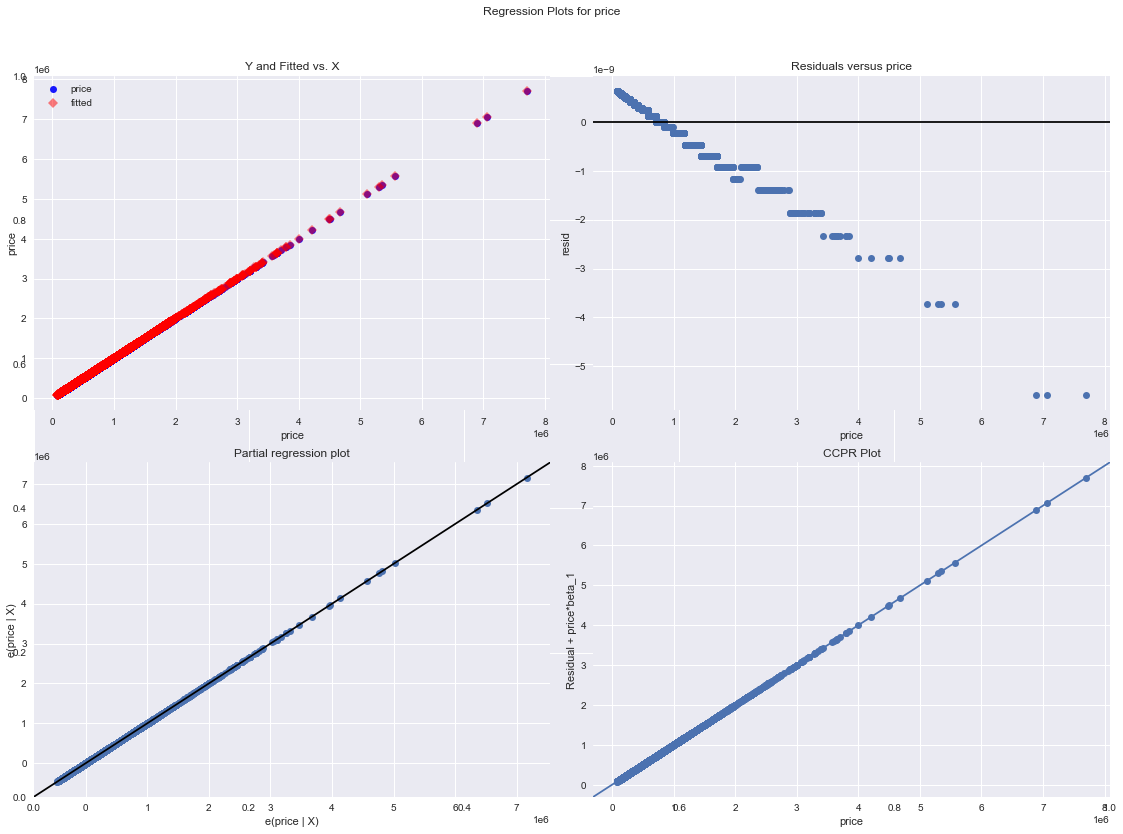

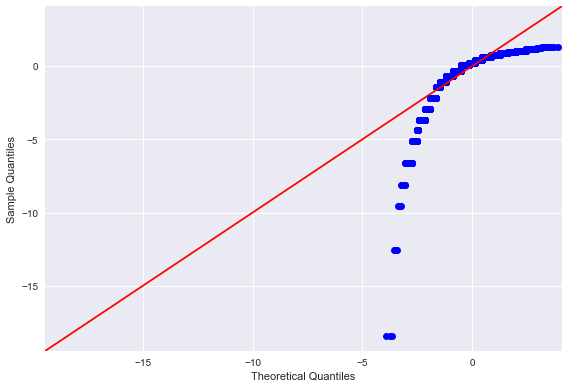

Regression Diagnostics for Price~bedrooms


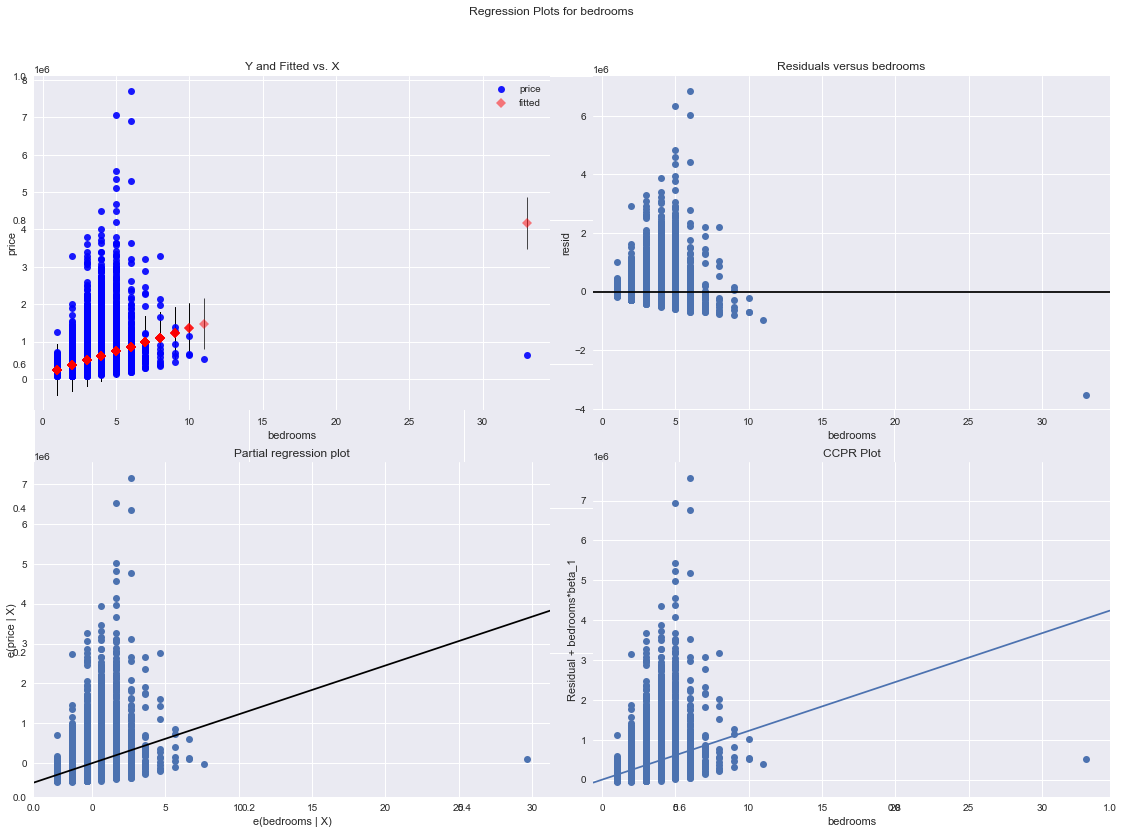

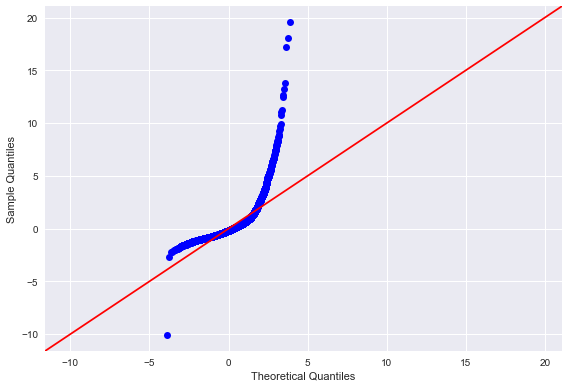

Regression Diagnostics for Price~bathrooms


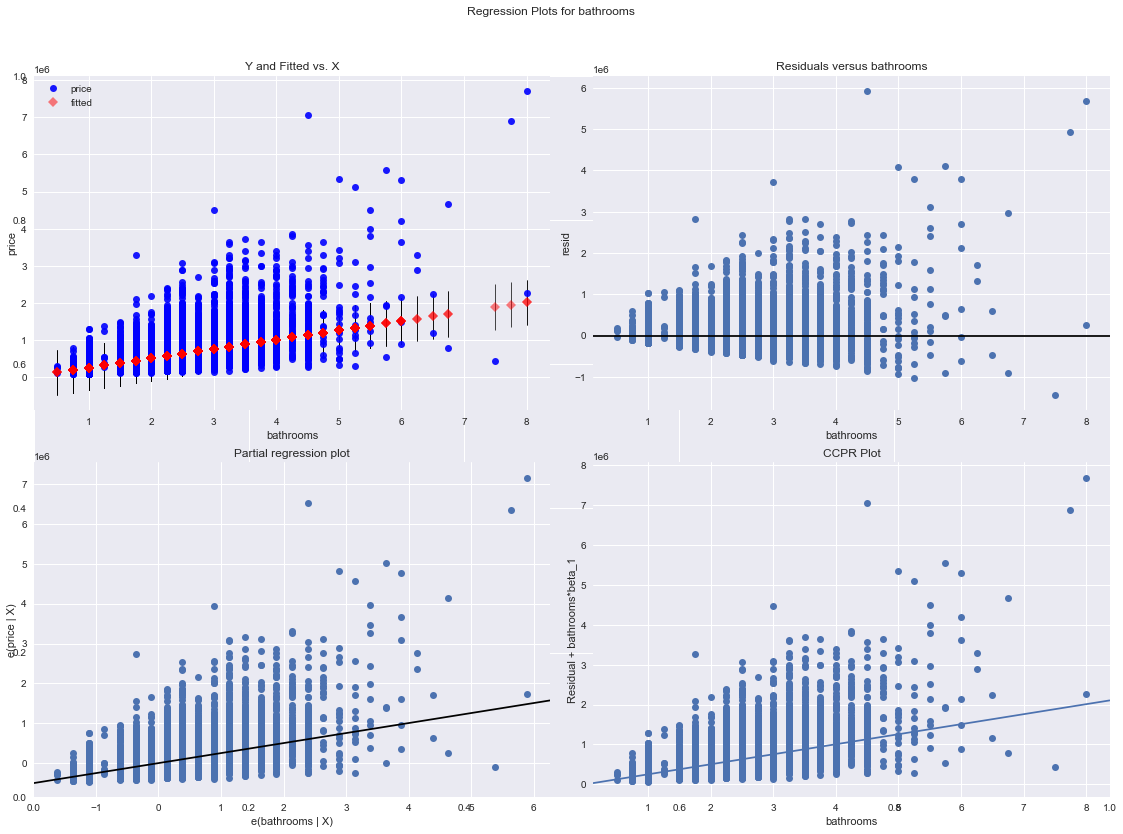

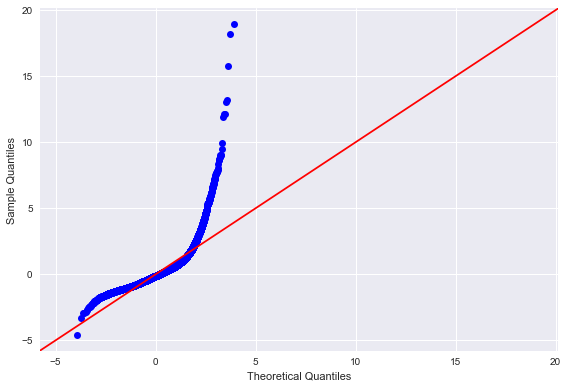

Regression Diagnostics for Price~sqft_living


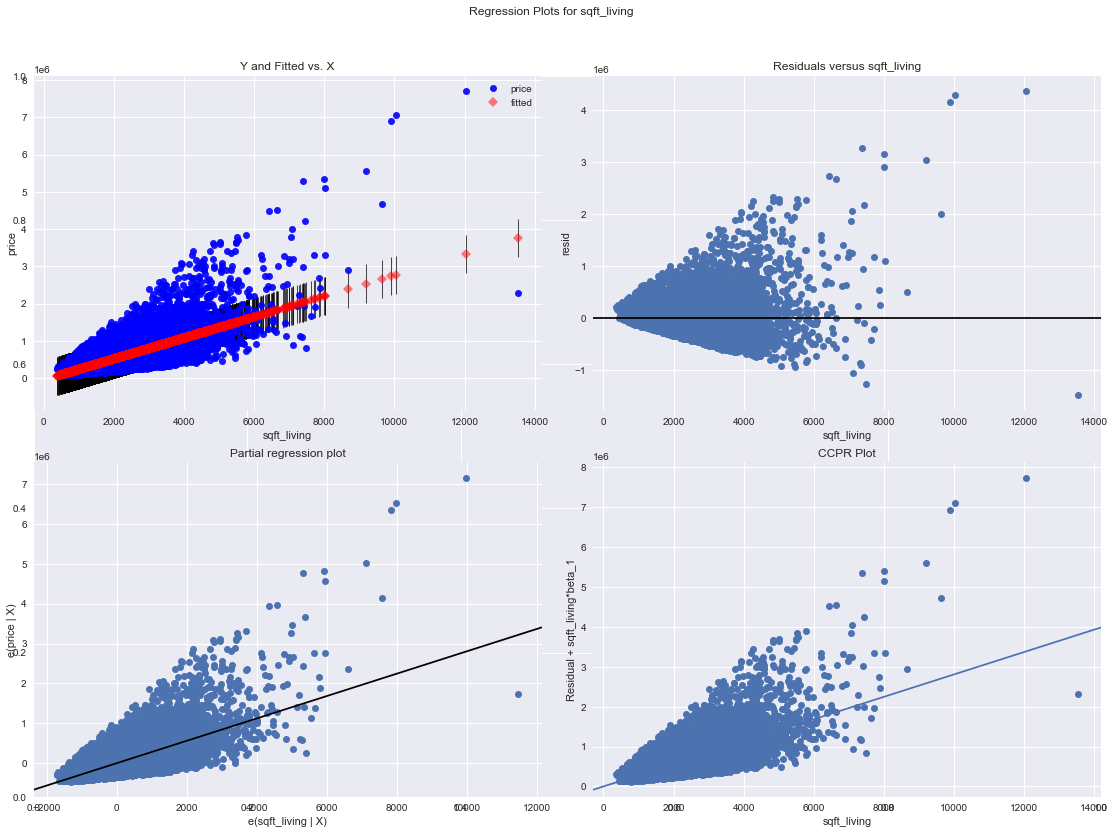

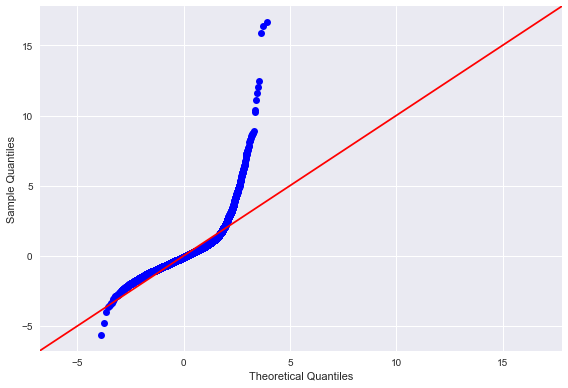

Regression Diagnostics for Price~sqft_lot


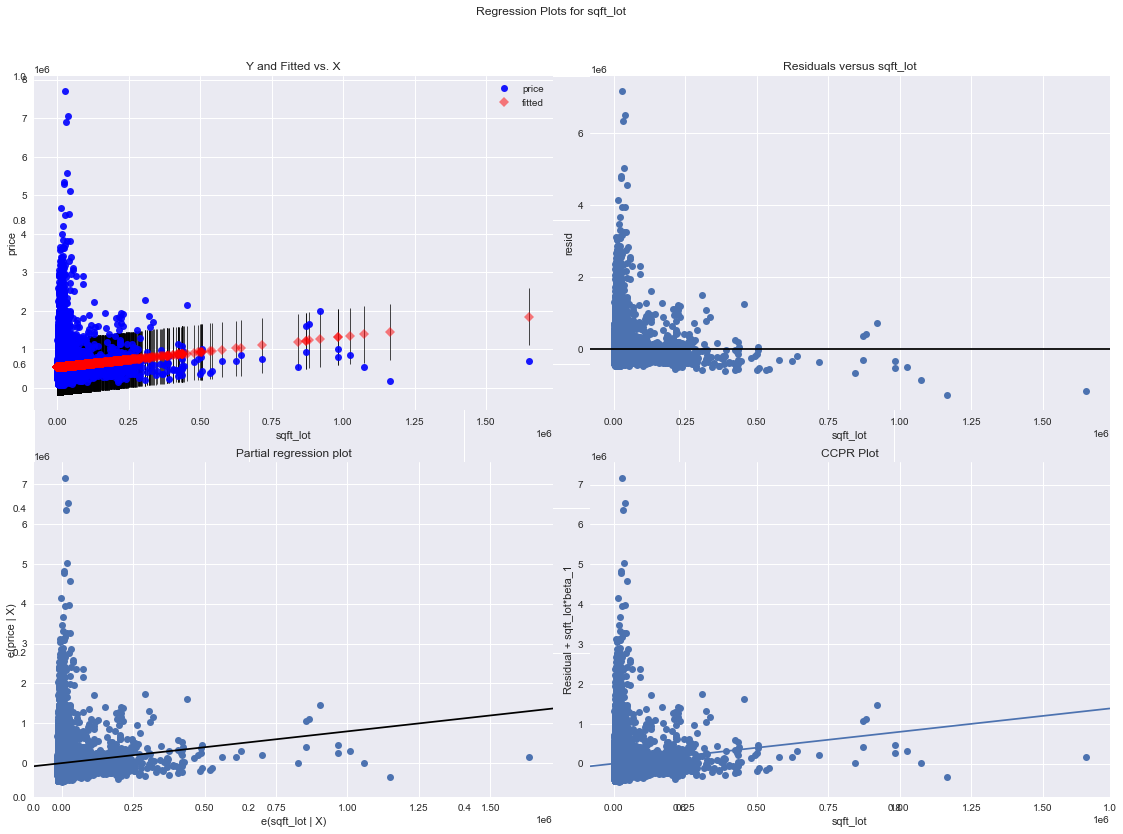

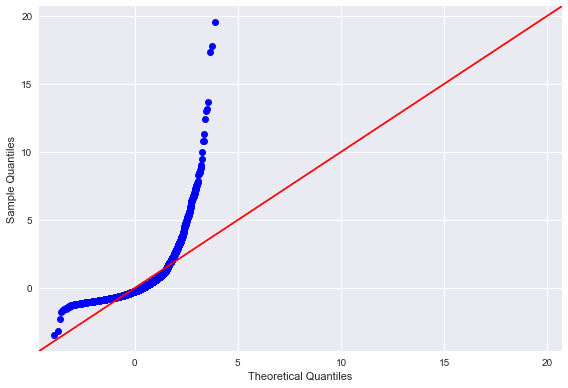

Regression Diagnostics for Price~floors


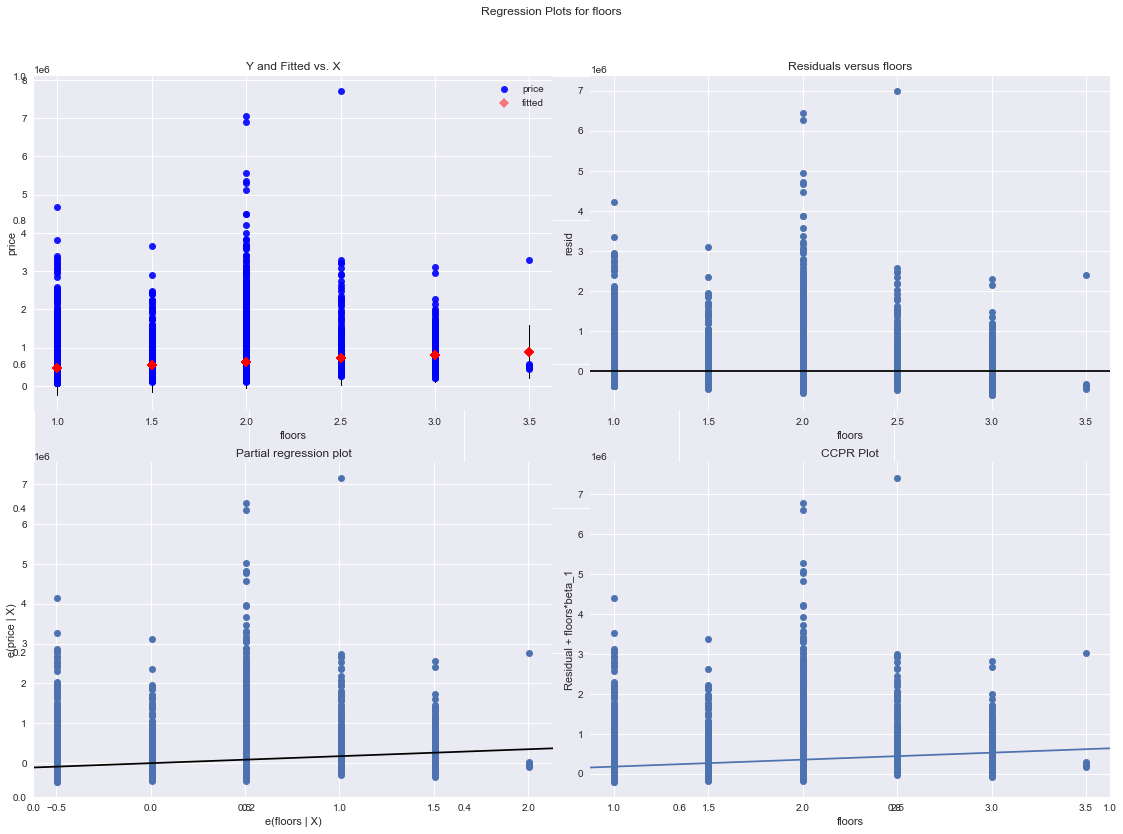

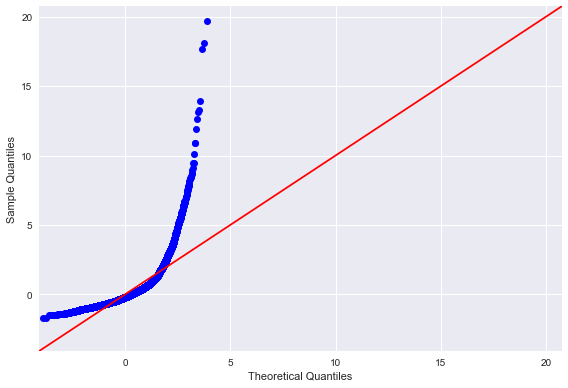

Regression Diagnostics for Price~sqft_above


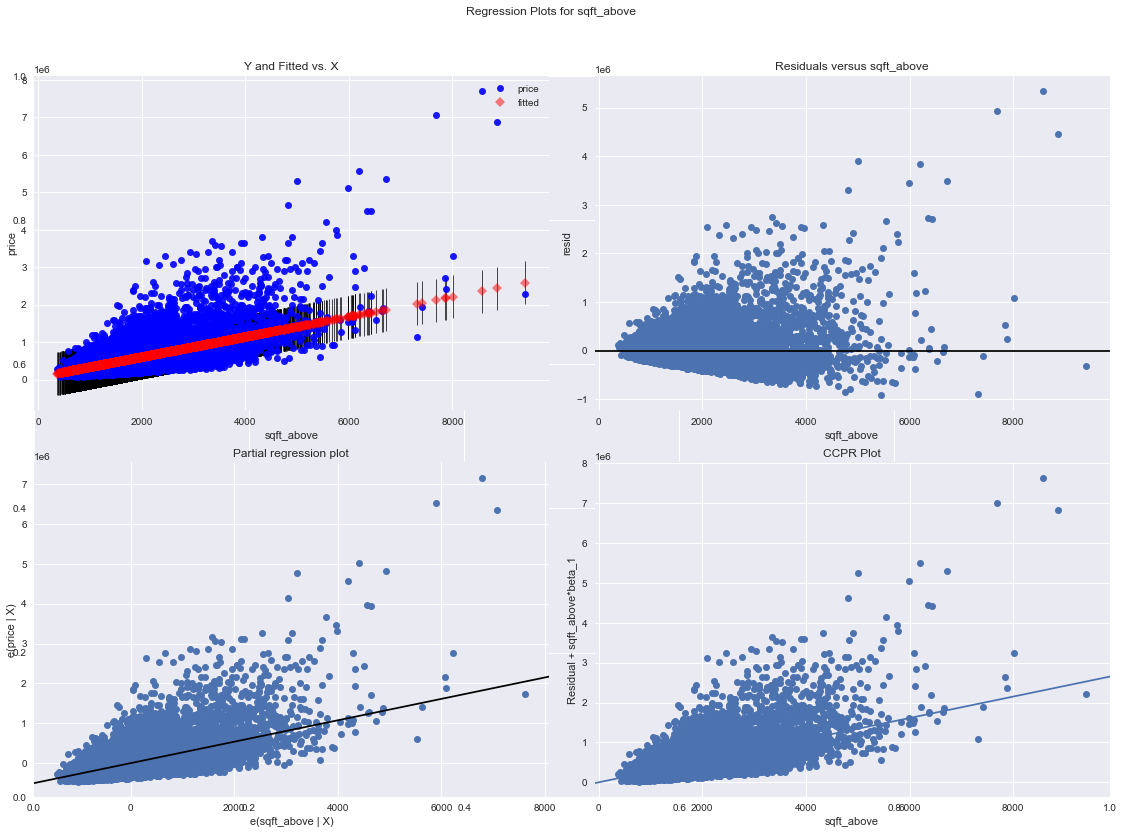

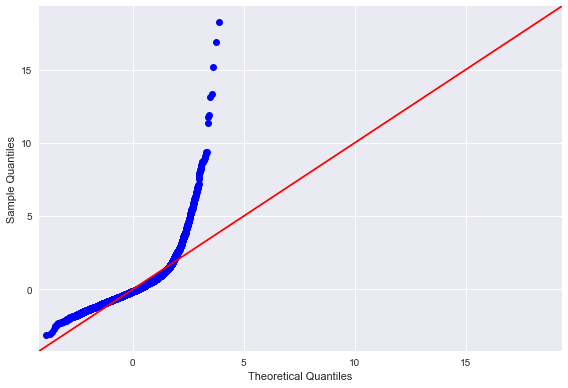

Regression Diagnostics for Price~sqft_basement


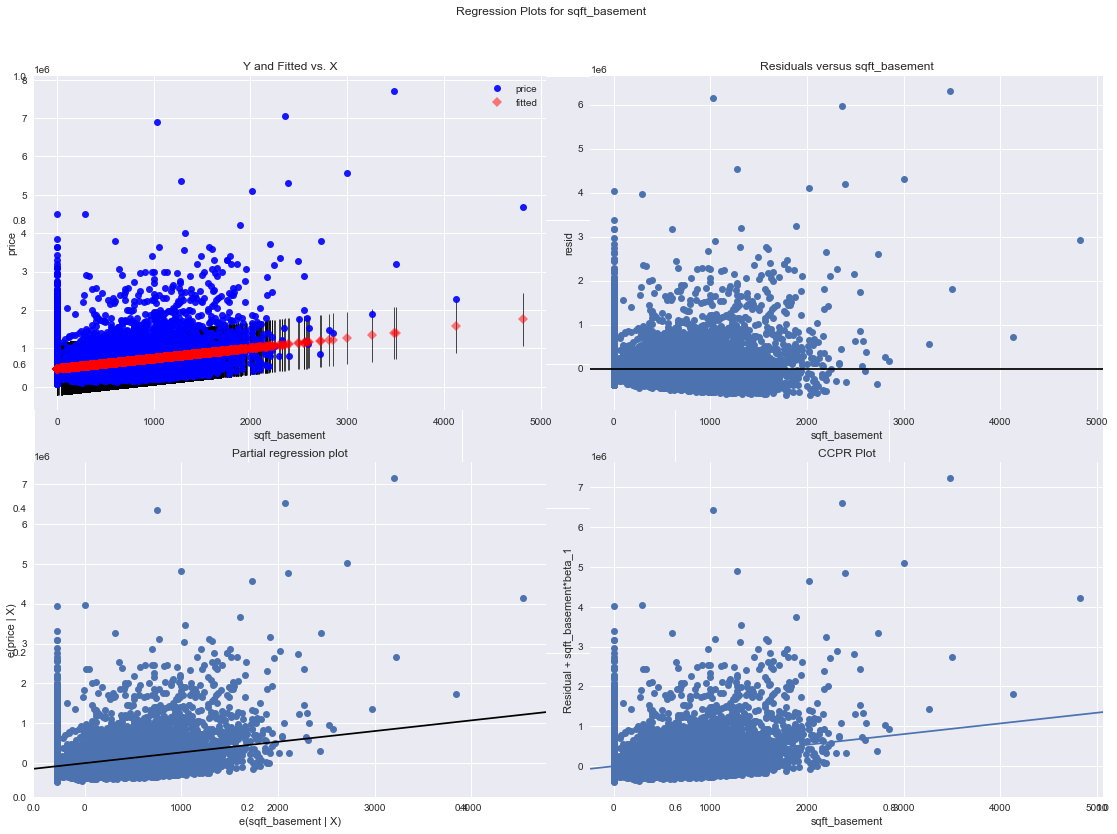

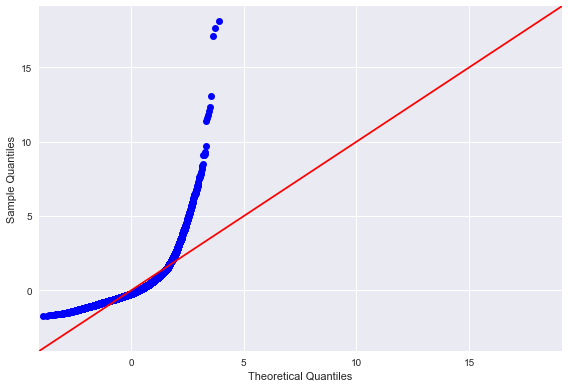

Regression Diagnostics for Price~sqft_living15


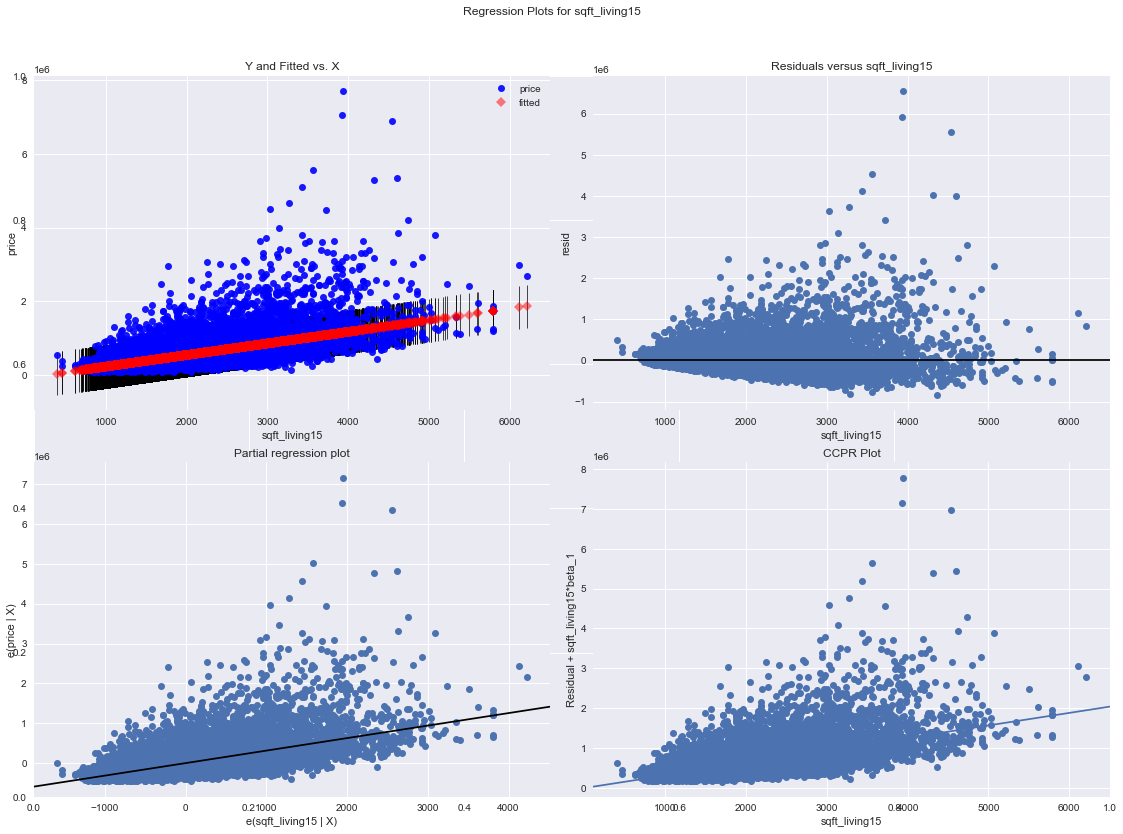

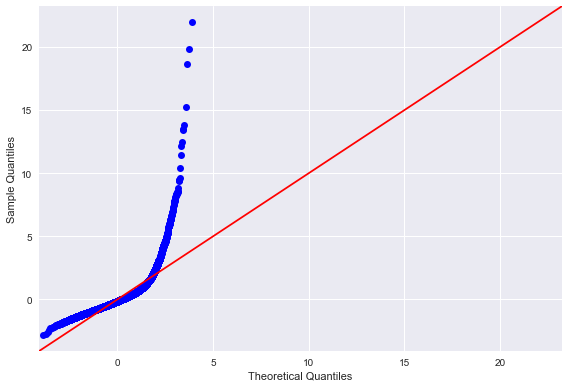

Regression Diagnostics for Price~sqft_lot15


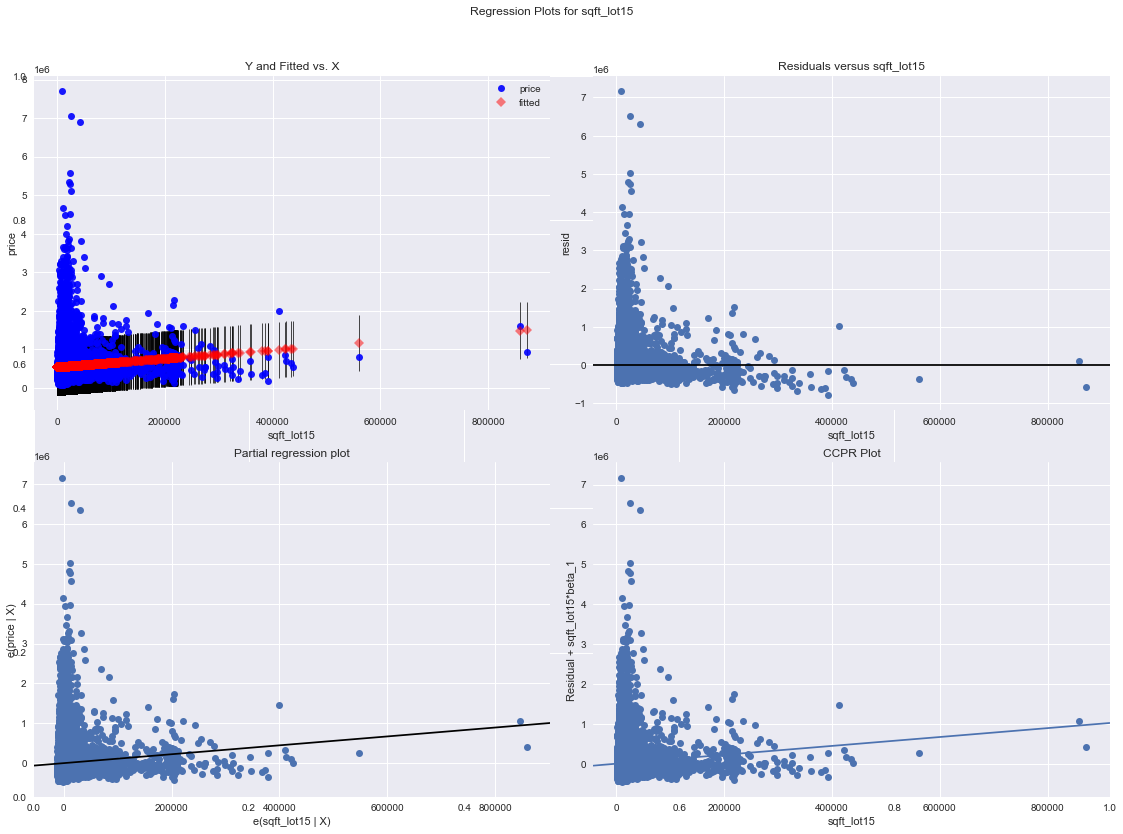

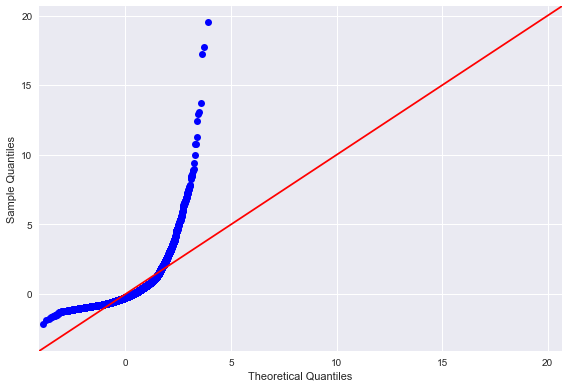

In [14]:
# create df with numerics to check lr assumptions
df_numerics = df.drop(['waterfront', 'view', 'yr_built', 'yr_renovated', 
                       'zipcode', 'lat', 'long', 'grade', 'condition'], axis=1)

# check assumptions
for idx, column in enumerate(df_numerics.columns):
    print(f"Regression Diagnostics for Price~{column}")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=df_numerics).fit()
    
    fig, axes = plt.subplots(figsize=(16,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

## Modeling

### Helper functions for modeling

In [15]:
# establish LinearRegression() variable for later use
lr = LinearRegression()

# import for finding r-squared value
from sklearn.metrics import r2_score

In [16]:
# this function places the data in train_test_split and builds a linear
# regression model. 
# Inputs: parameters for modeling & target variable
# Returns: r-squared value
def lin_model(X,y):
    # split into train and test. Use default split size of 0.25 and use same
    # random_state for consistency
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
    
    # fit the model
    lr.fit(X_train, y_train)
    
    # return r-squared
    return lr.score(X_train, y_train)

In [17]:
# this function facillitates log transformation of variables
# inputs: list of variables to be log-transformed and the dataframe that hosts
# these variables
# returns: the modified dataframe
def var_log_transform(var_list, df):
    for var in var_list:
        log_var = np.log(df[var])     # log the variable
        df = df.drop([var], axis=1)     # drop the variable from the df
        df[var] = log_var     # add the logged variable into the df
    return df     # return the df

In [18]:
# this function creates dummy variables for a list of variables and
# concatonates these variables onto the df
# inputs: list of variables to be dummied, df
# returns: df with modified vars
def dum_transformation(dum_list, df):
    for d in dum_list:
        dum = pd.get_dummies(df[d], prefix=d, drop_first=True)     # create dummies
        df = df.drop([d], axis=1)    # drop old variable
        df = pd.concat([df, dum], axis=1)    # add dummies into df
    return df     # return the df

In [19]:
# this function allows efficient statsmodels linear regression modeling
# inputs: df
# returns list: fitted model - can do print(str({name of model}.summary())), 
# X, df_x, df_train_y
def sm_lin_model(df):
    df_y = df[['price']]     # assumes target is 'price' establish y-var df
    df_x = df.drop(['price'], axis=1)  # same assumption and creates x-var df
    
    df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)
    
    X = sm.add_constant(df_train_x)

    # Fit the linear regression model
    model = sm.OLS(df_train_y, X)     # instantiate model
    res = model.fit()     # fit model
    
    # Creating a list of items to return for later use.
    # to_ret = [res, X, df_train_y, df_x]
    
    return res, X, df_y, df_x, df_train_x, df_train_y  # returns the fitted model - can then print summary as str

In [20]:
# this function plots the residuals of the model to check if they follow a
# normal distribution. This function uses a Q-Q-Plot, which should follow a
# linear trend if the assumption is correct.
# inputs: fitted model
def sm_check_resid_normality(res):
    df_residuals = res.resid
    mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                                 fit=True)

In [21]:
# this function plots the homoscedasticity of a linear regression model
# inputs: res (fitted model), df_train_y, X (of form: sm.add_constant(df_train_x))
def sm_check_scedas(res, df_train_y, X):    
    # check for homoscedasticity
    plt.scatter(res.predict(X), res.resid)     
    plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

    plt.title('Linear Regression Model Homoscedasticity');

In [22]:
# this function checks multicollinearity btwn independent variables
# inputs: dataframe with the independent variables (df_x)
# returns: list of variables with VIF values - be cautious of vals > 5
def multicollinearity_check(df_x):
    X = df_x
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return list(zip(list(df_x.columns), vif))

In [23]:
# this function filters values from a categorical variable based on the IQR
# for each value in the category.
# inputs: the category (type is string) & the dataframe
# returns: the dataframe with modifications
def IQR_filter_categorical(cat, df):
    # create variable with all the unique values from the category.
    cat_uniques = df[cat].unique()
    
    for value in cat_uniques:
        # create new df with each value from the category
        df_cat = pd.DataFrame()
        df_cat = df[df[cat] == value]
        
        # find first and third quartiles
        q3, q1 = np.percentile(df_cat.price, [75 ,25])
    
        iqr = q3 - q1

        # define and drop outliers
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr

        for row in df.index:
            if df.loc[row, cat] == value:
                if (df.loc[row, 'price'] > upper_bound) |  (df.loc[row, 'price'] < lower_bound):
                    df = df.drop(labels=row, axis=0)
    
    return df

### Model 1

I will use sqft_living and grade for the first model. Grade may be tricky because it is categorical. It may need to be treated with dummy variables, label encoding, or some other method in future models.

I will use statsmodels to create a linear regression model, and I will also use it to check linear regression assumptions (linearity, normality, homoscedasticity, and p-value < 0.05.

#### Create dataframe

In [24]:
# create df with just price, grade, and sqft_living
df_model1 = df[['price', 'sqft_living', 'grade']].copy()

#### Check linearity assumption

* Check if there is a linear relationship between each predictor and target variable.
* Check for outliers 

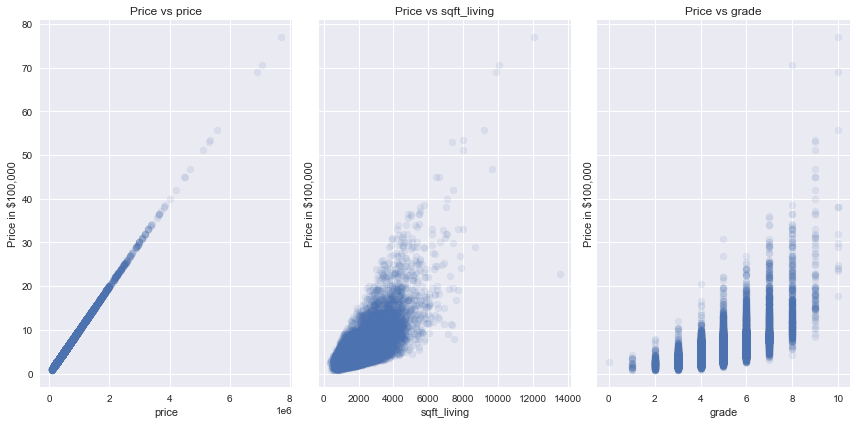

In [25]:
# check assumptions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), sharey=True)

for ax, column in zip(axes.flatten(), df_model1.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

Neither variables follow the normality assumption, but I will still model and fix these assumptions later.

#### Fit the model

In [26]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_model1)

In [27]:
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     9352.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:20:49   Log-Likelihood:            -2.2427e+05
No. Observations:               16197   AIC:                         4.485e+05
Df Residuals:                   16194   BIC:                         4.486e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.129e+05   8383.424    -37.318      

#### Check assumptions

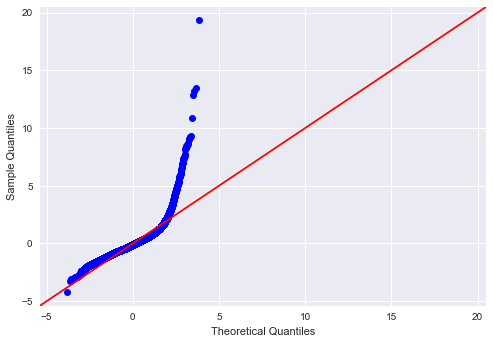

In [28]:
# Normality of residuals
sm_check_resid_normality(res)

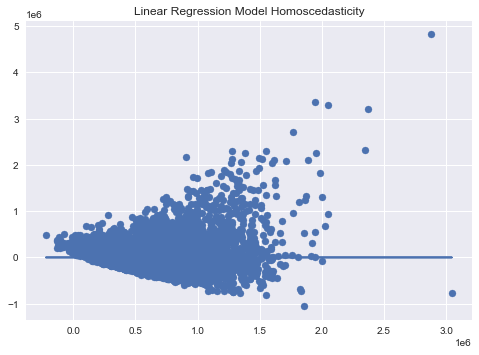

In [29]:
sm_check_scedas(res, df_train_y, X)

In [30]:
multicollinearity_check(df_x)

[('sqft_living', 13.546151335704193), ('grade', 13.546151335704193)]

None of the assumptions were met, and the model produced a low r^2 value.

#### Evaluate model error with MAE

In [31]:
# generate predictions
ypred = res.predict(X)

# calc MAE
mae = meanabs
mae = mae(df_train_y['price'], ypred)
mae

165041.76217912533

### Model 2

This model will utilize sqft_living and grade again, but it will handle grade with a method used for transforming categorical variables.

#### Create dummy variables for grade

In [32]:
df1 = df[['grade','price','sqft_living']].copy()
dum_list = ['grade']
df1 = dum_transformation(dum_list, df1)     # use custom dummy function
df1

price  sqft_living  grade_1  grade_2  grade_3  grade_4  grade_5  \
0      221900.0         1180        0        0        0        1        0   
1      538000.0         2570        0        0        0        1        0   
2      180000.0          770        0        0        1        0        0   
3      604000.0         1960        0        0        0        1        0   
4      510000.0         1680        0        0        0        0        1   
...         ...          ...      ...      ...      ...      ...      ...   
21592  360000.0         1530        0        0        0        0        1   
21593  400000.0         2310        0        0        0        0        1   
21594  402101.0         1020        0        0        0        1        0   
21595  400000.0         1600        0        0        0        0        1   
21596  325000.0         1020        0        0        0        1        0   

       grade_6  grade_7  grade_8  grade_9  grade_10  
0            0        0        0        0         0  
1            0        0        0        0         0  
2            0        0        0        0         0  
3            0        0        0        0         0  
4            0        0        0        0         0  
...        ...      ...      ...      ...       ...  
21592        0        0        0        0         0  
21593        0        0        0        0         0  
21594        0        0        0        0         0  
21595        0        0        0        0         0  
21596        0        0        0        0         0  

[21597 rows x 12 columns]

#### Check linearity assumption

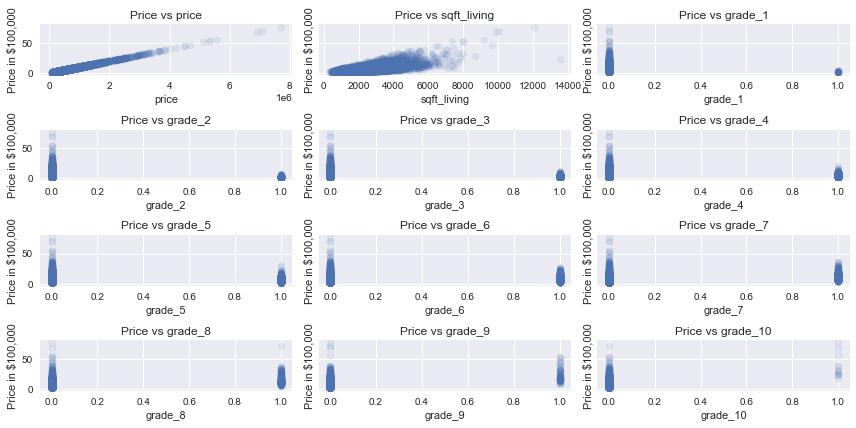

In [33]:
# check assumptions
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 6), sharey=True)

for ax, column in zip(axes.flatten(), df1.columns):
    ax.scatter(df1[column], df1['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

#### Create and evaluate the model

In [34]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df1)

In [35]:
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     2076.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:20:51   Log-Likelihood:            -2.2336e+05
No. Observations:               16197   AIC:                         4.467e+05
Df Residuals:                   16185   BIC:                         4.468e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.823e+05   2.36e+05      0.772      

That's an improvement from the first model, but it's still not great. It's time to incorporate some other variables and possibly try to normalize some of the variables that look log-normal.

#### Check assumptions

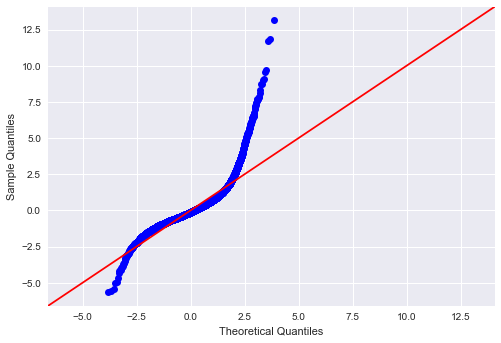

In [36]:
sm_check_resid_normality(res)

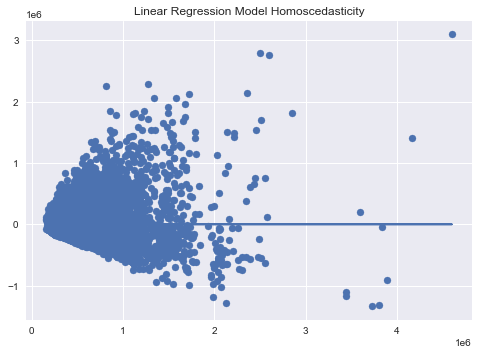

In [37]:
sm_check_scedas(res, df_train_y, X)

In [38]:
multicollinearity_check(df_x)

[('sqft_living', 15.31761237738164),
 ('grade_1', 1.0017162572055227),
 ('grade_2', 1.0320971098597982),
 ('grade_3', 1.3969100610530283),
 ('grade_4', 4.513704685212176),
 ('grade_5', 4.971099283394959),
 ('grade_6', 3.9507165867135647),
 ('grade_7', 2.9276469077052285),
 ('grade_8', 2.0573881407685795),
 ('grade_9', 1.366480856400538),
 ('grade_10', 1.0998524890682377)]

Model does not satisfy assumptions

#### Evaluate MAE

In [39]:
# generate predictions
ypred = res.predict(X)

# calc MAE
mae = meanabs
mae = mae(df_train_y['price'], ypred)
mae

156756.38242423633

### exploring relationship between sqft_living, sqft_above, sqft_basement

In [40]:
df_e = df[['sqft_living', 'sqft_above', 'sqft_basement']]
df_e

sqft_living  sqft_above  sqft_basement
0             1180        1180              0
1             2570        2170            400
2              770         770              0
3             1960        1050            910
4             1680        1680              0
...            ...         ...            ...
21592         1530        1530              0
21593         2310        2310              0
21594         1020        1020              0
21595         1600        1600              0
21596         1020        1020              0

[21597 rows x 3 columns]

Looks like sqft_living is the sum of sqft_above and sqft_basement

### Model 9

In [41]:
# add sqft_lot and view
df_9 = df.copy()
df_9 = df_9[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms', 
             'grade', 'condition', 'waterfront', 'sqft_lot', 'view']]

df_9

price  zipcode  sqft_living  bedrooms  bathrooms  grade  condition  \
0      221900.0    98178         1180         3       1.00      4          2   
1      538000.0    98125         2570         3       2.25      4          2   
2      180000.0    98028          770         2       1.00      3          2   
3      604000.0    98136         1960         4       3.00      4          4   
4      510000.0    98074         1680         3       2.00      5          2   
...         ...      ...          ...       ...        ...    ...        ...   
21592  360000.0    98103         1530         3       2.50      5          2   
21593  400000.0    98146         2310         4       2.50      5          2   
21594  402101.0    98144         1020         2       0.75      4          2   
21595  400000.0    98027         1600         3       2.50      5          2   
21596  325000.0    98144         1020         2       0.75      4          2   

       waterfront  sqft_lot  view  
0               0      5650     0  
1               0      7242     0  
2               0     10000     0  
3               0      5000     0  
4               0      8080     0  
...           ...       ...   ...  
21592           0      1131     0  
21593           0      5813     0  
21594           0      1350     0  
21595           0      2388     0  
21596           0      1076     0  

[21597 rows x 10 columns]

In [42]:
# log transform of applicable variables
log_t = ['price', 'sqft_living', 'sqft_lot']

for l in log_t:
    l_log = np.log(df_9[l])
    df_9 = df_9.drop([l], axis=1)
    df_9[l] = l_log
    
# dummies
to_dum = ['zipcode', 'bedrooms', 'bathrooms', 
             'grade', 'condition', 'waterfront', 'view']

for d in to_dum:
    dummy = pd.get_dummies(df_9[d], prefix=d, drop_first=True)
    df_9 = df_9.drop([d], axis=1)
    df_9 = pd.concat([df_9, dummy], axis=1)
    
df_9.describe()

price   sqft_living      sqft_lot  zipcode_98002  zipcode_98003  \
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000   
mean      13.048211      7.550720      8.989805       0.009214       0.012965   
std        0.526555      0.424191      0.902078       0.095550       0.113125   
min       11.264464      5.913503      6.253829       0.000000       0.000000   
25%       12.682307      7.265430      8.525161       0.000000       0.000000   
50%       13.017003      7.554859      8.938269       0.000000       0.000000   
75%       13.377006      7.843849      9.276596       0.000000       0.000000   
max       15.856731      9.513404     14.317109       1.000000       1.000000   

       zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  \
count   21597.000000   21597.000000   21597.000000   21597.000000   
mean        0.014678       0.007779       0.023059       0.006529   
std         0.120263       0.087856       0.150094       0.080538   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98008  ...      grade_10   condition_1   condition_2  \
count   21597.000000  ...  21597.000000  21597.000000  21597.000000   
mean        0.013104  ...      0.000602      0.007871      0.649164   
std         0.113721  ...      0.024528      0.088373      0.477243   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%         0.000000  ...      0.000000      0.000000      0.000000   
50%         0.000000  ...      0.000000      0.000000      1.000000   
75%         0.000000  ...      0.000000      0.000000      1.000000   
max         1.000000  ...      1.000000      1.000000      1.000000   

        condition_3   condition_4  waterfront_1        view_1        view_2  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       0.262861      0.078761      0.006760      0.015280      0.044312   
std        0.440198      0.269372      0.081944      0.122667      0.205792   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21597.000000  21597.000000  
mean       0.023522      0.014678  
std        0.151557      0.120263  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 130 columns]

In [43]:
# pre-handling for statsmodel
df_9 = df_9.rename(columns={"bathrooms_0.75": "br_0_75",
                  "bathrooms_1.0": "br_1_0", "bathrooms_1.25": "br_1_25",
                  "bathrooms_1.5": "br_1_5", "bathrooms_1.75": "br_1_75",
                  "bathrooms_2.0": "br_2_0", "bathrooms_2.25": "br_2_25", 
                  "bathrooms_2.5": "br_2_5", "bathrooms_2.75": "br_2_75",
                  "bathrooms_3.0": "br_3_0", "bathrooms_3.25": "br_3_25",
                  "bathrooms_3.25": "br_3_25", "bathrooms_3.5": "br_3_5",
                  "bathrooms_3.75": "br_3_75", "bathrooms_4.0": "br_4_0",
                  "bathrooms_4.25": "br_4_25", "bathrooms_4.5": "br_4_5",
                  "bathrooms_4.75": "br_4_75", "bathrooms_5.0": "br_5_0",
                  "bathrooms_5.25": "br_5_25", "bathrooms_5.5": "br_5_5",
                  "bathrooms_5.75": "br_5_75", "bathrooms_6.0": "br_6_0",
                  "bathrooms_6.25": "br_6_25", "bathrooms_6.5": "br_6_5",
                  "bathrooms_6.75": "br_6_75", "bathrooms_7.5": "br_7_5",
                  "bathrooms_7.75": "br_7_75", "bathrooms_8.0": "br_8_0"}) 

In [44]:
#statsmodel
df_9_y = df_9[['price']]
df_9_X = df_9.drop(['price'], axis=1)

df_9_train, df_9_test = train_test_split(df_9, random_state=42)

df_9_x_cols = list(df_9.columns)
df_9_x_cols.remove('price')

outcome = 'price'
x_cols = df_9_x_cols
    
# Fit the linear regression model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_9_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     940.8
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:20:53   Log-Likelihood:                 4536.1
No. Observations:               16197   AIC:                            -8820.
Df Residuals:                   16071   BIC:                            -7851.
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4631      0.218     38.822      0.000       8.036       8.890
sqft_living       0.4409      0.008     57.468      0.000       0.426       0.456
sqft_lot          0.0667      0.002     29.463      0.000       0.062       0.071
zipcode_98002    -0.0051      0.019     -0.265      0.791      -0.043       0.032
zipcode_98003     0.0368      0.017      2.161      0.031       0.003       0.070
zipcode_98004     1.1290      0.017     67.477      0.000       1.096       1.162
zipcode_98005     0.7483      0.020     37.390      0.000       0.709       0.788
zipcode_98006     0.6583      0.015     43.434      0.000       0.629       0.688
zipcode_98007     0.6756      0.021     31.556      0.000       0.634       0.718
zipcode_98008     0.6650      0.017     39.357      0.000       0.632       0.698
zipcode_98010     0.2283      0.023      9.758      0.000       0.182       0.274
zipcode_98011     0.4747      0.019     24.988      0.000       0.437       0.512
zipcode_98014     0.2754      0.022     12.798      0.000       0.233       0.318
zipcode_98019     0.3177      0.019     16.490      0.000       0.280       0.356
zipcode_98022     0.0509      0.018      2.791      0.005       0.015       0.087
zipcode_98023    -0.0171      0.015     -1.163      0.245      -0.046       0.012
zipcode_98024     0.4241      0.026     16.413      0.000       0.373       0.475
zipcode_98027     0.5137      0.015     33.510      0.000       0.484       0.544
zipcode_98028     0.4168      0.017     24.628      0.000       0.384       0.450
zipcode_98029     0.6245      0.016     37.881      0.000       0.592       0.657
zipcode_98030     0.0682      0.018      3.850      0.000       0.033       0.103
zipcode_98031     0.0822      0.017      4.844      0.000       0.049       0.115
zipcode_98032    -0.0203      0.023     -0.897      0.370      -0.065       0.024
zipcode_98033     0.8030      0.015     52.141      0.000       0.773       0.833
zipcode_98034     0.5495      0.014     38.015      0.000       0.521       0.578
zipcode_98038     0.1830      0.014     12.763      0.000       0.155       0.211
zipcode_98039     1.3156      0.032     41.249      0.000       1.253       1.378
zipcode_98040     0.9106      0.017     52.788      0.000       0.877       0.944
zipcode_98042     0.0785      0.015      5.406      0.000       0.050       0.107
zipcode_98045     0.3044      0.018     17.021      0.000       0.269       0.340
zipcode_98052     0.6554      0.014     45.673      0.000       0.627       0.683
zipcode_98053     0.6044      0.016     38.428      0.000       0.574       0.635
zipcode_98055     0.1604      0.017      9.546      0.000       0.127       0.193
zipcode_98056     0.3346      0.015     21.620      0.000       0.304       0.365
zipcode_98058     0.1655      0.015     10.947   

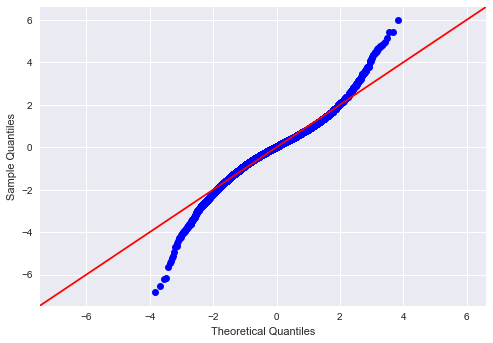

In [45]:
# check assumptions
df9_residuals = model.resid
mod_res = sm.graphics.qqplot(df9_residuals, dist=stats.norm, line='45', 
                             fit=True)

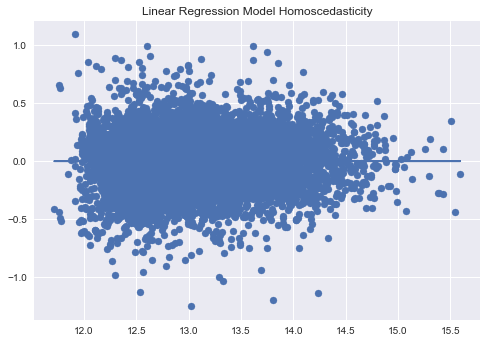

In [46]:
# check for homoscedasticity
plt.scatter(model.predict(df_9_train[x_cols]), model.resid)
plt.plot(model.predict(df_9_train[x_cols]), [0 for i in range(len(df_9_train))])

plt.title('Linear Regression Model Homoscedasticity');

* Having issues with large p-values in bedrooms, bathrooms, grade, and zipcode. Is there a better way to treat these variables in the pre-processing steps?

### Model 10

In [47]:
# focus on pre-processing of bedrooms, bathrooms, grade, and zipcode
df_10 = df.copy()
df_10 = df_10[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms', 
             'grade', 'condition', 'waterfront', 'sqft_lot', 'view']]

df_10

price  zipcode  sqft_living  bedrooms  bathrooms  grade  condition  \
0      221900.0    98178         1180         3       1.00      4          2   
1      538000.0    98125         2570         3       2.25      4          2   
2      180000.0    98028          770         2       1.00      3          2   
3      604000.0    98136         1960         4       3.00      4          4   
4      510000.0    98074         1680         3       2.00      5          2   
...         ...      ...          ...       ...        ...    ...        ...   
21592  360000.0    98103         1530         3       2.50      5          2   
21593  400000.0    98146         2310         4       2.50      5          2   
21594  402101.0    98144         1020         2       0.75      4          2   
21595  400000.0    98027         1600         3       2.50      5          2   
21596  325000.0    98144         1020         2       0.75      4          2   

       waterfront  sqft_lot  view  
0               0      5650     0  
1               0      7242     0  
2               0     10000     0  
3               0      5000     0  
4               0      8080     0  
...           ...       ...   ...  
21592           0      1131     0  
21593           0      5813     0  
21594           0      1350     0  
21595           0      2388     0  
21596           0      1076     0  

[21597 rows x 10 columns]

In [48]:
df_10['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [49]:
# remove the outlier of 33 bedrooms
df_10 = df_10[df_10['bedrooms'] < 32]

In [50]:
# fix problem of .5, .75 bathrooms and so on...
df_10['bathrm'] = df_10.bathrooms*4
df_10.bathrm = df_10.bathrm.astype('int32')
df_10 = df_10.drop('bathrooms', axis=1)
df_10

<ipython-input-50-e466e318a3a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['bathrm'] = df_10.bathrooms*4
C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


price  zipcode  sqft_living  bedrooms  grade  condition  waterfront  \
0      221900.0    98178         1180         3      4          2           0   
1      538000.0    98125         2570         3      4          2           0   
2      180000.0    98028          770         2      3          2           0   
3      604000.0    98136         1960         4      4          4           0   
4      510000.0    98074         1680         3      5          2           0   
...         ...      ...          ...       ...    ...        ...         ...   
21592  360000.0    98103         1530         3      5          2           0   
21593  400000.0    98146         2310         4      5          2           0   
21594  402101.0    98144         1020         2      4          2           0   
21595  400000.0    98027         1600         3      5          2           0   
21596  325000.0    98144         1020         2      4          2           0   

       sqft_lot  view  bathrm  
0          5650     0       4  
1          7242     0       9  
2         10000     0       4  
3          5000     0      12  
4          8080     0       8  
...         ...   ...     ...  
21592      1131     0      10  
21593      5813     0      10  
21594      1350     0       3  
21595      2388     0      10  
21596      1076     0       3  

[21596 rows x 10 columns]

I think some of these variables that I have been treating as categorical can actuallly be treated as numerical such as bedrooms and bathrooms. These two can be treated as quantitative because they can take on any number.

In [51]:
# log transform of applicable variables
log_t = ['price', 'sqft_living', 'sqft_lot']

for l in log_t:
    l_log = np.log(df_10[l])
    df_10 = df_10.drop([l], axis=1)
    df_10[l] = l_log
    
# dummies
to_dum = ['zipcode', 'grade', 'condition', 'waterfront', 'view']  # grade and condition satisfy reqs for label encoding

for d in to_dum:
    dummy = pd.get_dummies(df_10[d], prefix=d, drop_first=True)
    df_10 = df_10.drop([d], axis=1)
    df_10 = pd.concat([df_10, dummy], axis=1)
    
df_10.describe()

bedrooms        bathrm         price   sqft_living      sqft_lot  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       3.371828      8.463373     13.048196      7.550728      8.989818   
std        0.904114      3.075992      0.526562      0.424199      0.902097   
min        1.000000      2.000000     11.264464      5.913503      6.253829   
25%        3.000000      7.000000     12.682307      7.265430      8.525161   
50%        3.000000      9.000000     13.017003      7.554859      8.938400   
75%        4.000000     10.000000     13.377006      7.843849      9.276643   
max       11.000000     32.000000     15.856731      9.513404     14.317109   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
count   21596.000000   21596.000000   21596.000000   21596.000000   
mean        0.009215       0.012965       0.014679       0.007779   
std         0.095552       0.113128       0.120266       0.087858   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98006  ...      grade_10   condition_1   condition_2  \
count   21596.000000  ...  21596.000000  21596.000000  21596.000000   
mean        0.023060  ...      0.000602      0.007872      0.649194   
std         0.150097  ...      0.024528      0.088375      0.477233   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%         0.000000  ...      0.000000      0.000000      0.000000   
50%         0.000000  ...      0.000000      0.000000      1.000000   
75%         0.000000  ...      0.000000      0.000000      1.000000   
max         1.000000  ...      1.000000      1.000000      1.000000   

        condition_3   condition_4  waterfront_1        view_1        view_2  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       0.262873      0.078718      0.006761      0.015281      0.044314   
std        0.440204      0.269305      0.081946      0.122670      0.205796   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21596.000000  21596.000000  
mean       0.023523      0.014679  
std        0.151561      0.120266  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 93 columns]

In [52]:
#statsmodel
df_10_y = df_10[['price']]
df_10_x = df_10.drop(['price'], axis=1)

# do train test split for x and y values
df_10_train_x, df_10_test_x, df_10_train_y, df_10_test_y = train_test_split(df_10_x, df_10_y, random_state=42)

df_10_x_cols = list(df_10.columns)
df_10_x_cols.remove('price')

outcome = 'price'
x_cols = df_10_x_cols

X = sm.add_constant(df_10_train_x)
    
# Fit the linear regression model
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
# model = ols(formula=formula, data=df_10_train_x).fit()
model = sm.OLS(df_10_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1275.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:20:54   Log-Likelihood:                 4518.4
No. Observations:               16197   AIC:                            -8851.
Df Residuals:                   16104   BIC:                            -8135.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.6425      0.195     44.418

Doesn't pass multicollinearity or p-val assumptions.

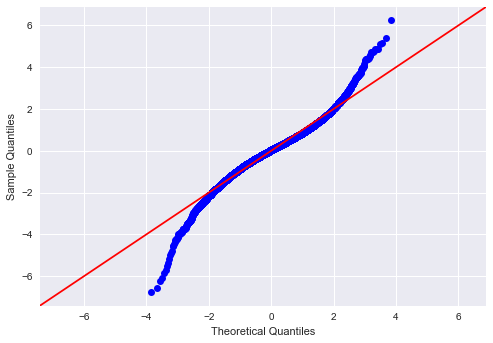

In [53]:
# check assumptions
df_10_residuals = res.resid
mod_res = sm.graphics.qqplot(df_10_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [54]:
# can drop outliers based on z-scores. - do on whole data frame before split

### Model 11

#### Create model with price, zipcode, sqft_living, bedrooms, bathrooms, condition, waterfront, sqft_lot, and view

In [55]:
# going to repeat model 11, but I will drop grade because grade produces too
# many overly high p-values

df_11 = df.copy()
df_11 = df_11[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms',
               'condition', 'waterfront', 'sqft_lot', 'view']]

df_11

price  zipcode  sqft_living  bedrooms  bathrooms  condition  \
0      221900.0    98178         1180         3       1.00          2   
1      538000.0    98125         2570         3       2.25          2   
2      180000.0    98028          770         2       1.00          2   
3      604000.0    98136         1960         4       3.00          4   
4      510000.0    98074         1680         3       2.00          2   
...         ...      ...          ...       ...        ...        ...   
21592  360000.0    98103         1530         3       2.50          2   
21593  400000.0    98146         2310         4       2.50          2   
21594  402101.0    98144         1020         2       0.75          2   
21595  400000.0    98027         1600         3       2.50          2   
21596  325000.0    98144         1020         2       0.75          2   

       waterfront  sqft_lot  view  
0               0      5650     0  
1               0      7242     0  
2               0     10000     0  
3               0      5000     0  
4               0      8080     0  
...           ...       ...   ...  
21592           0      1131     0  
21593           0      5813     0  
21594           0      1350     0  
21595           0      2388     0  
21596           0      1076     0  

[21597 rows x 9 columns]

<AxesSubplot:>

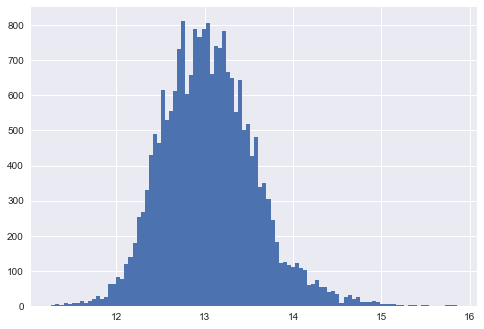

In [56]:
np.log(df_11['price']).hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x19d988ee3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x19d988eea60>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d988ee040>],
 'medians': [<matplotlib.lines.Line2D at 0x19d988f8160>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d988f84c0>],
 'means': []}

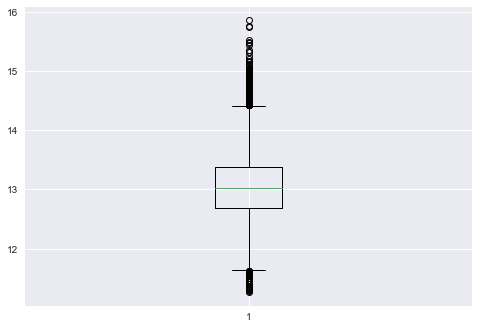

In [57]:
plt.boxplot(np.log(df_11['price']))

<AxesSubplot:>

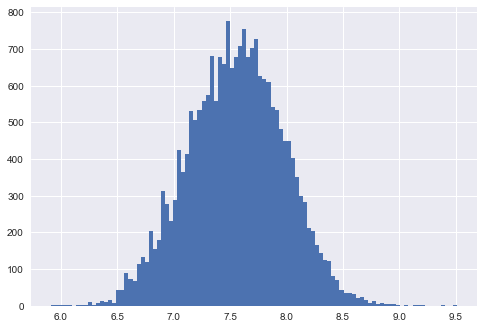

In [58]:
np.log(df_11['sqft_living']).hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x19d98eed8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x19d98eedf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d98eed550>],
 'medians': [<matplotlib.lines.Line2D at 0x19d98ef9640>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d98ef9970>],
 'means': []}

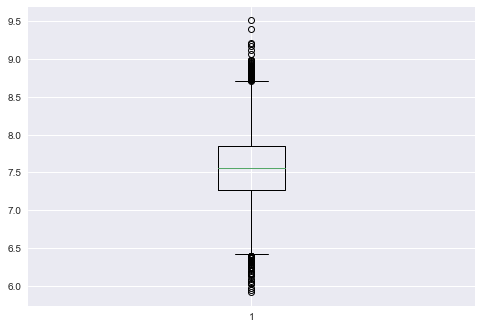

In [59]:
plt.boxplot(np.log(df_11['sqft_living']))

#### Remove outliers

In [60]:
# remove the outlier of 33 bedrooms
df_11 = df_11[df_11['bedrooms'] < 32]

# fix problem of .5, .75 bathrooms and so on...
df_11['bathrm'] = df_11.bathrooms*4
df_11.bathrm = df_11.bathrm.astype('int32')
df_11 = df_11.drop('bathrooms', axis=1)
df_11

<ipython-input-60-a3faea8c21de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11['bathrm'] = df_11.bathrooms*4
C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


price  zipcode  sqft_living  bedrooms  condition  waterfront  \
0      221900.0    98178         1180         3          2           0   
1      538000.0    98125         2570         3          2           0   
2      180000.0    98028          770         2          2           0   
3      604000.0    98136         1960         4          4           0   
4      510000.0    98074         1680         3          2           0   
...         ...      ...          ...       ...        ...         ...   
21592  360000.0    98103         1530         3          2           0   
21593  400000.0    98146         2310         4          2           0   
21594  402101.0    98144         1020         2          2           0   
21595  400000.0    98027         1600         3          2           0   
21596  325000.0    98144         1020         2          2           0   

       sqft_lot  view  bathrm  
0          5650     0       4  
1          7242     0       9  
2         10000     0       4  
3          5000     0      12  
4          8080     0       8  
...         ...   ...     ...  
21592      1131     0      10  
21593      5813     0      10  
21594      1350     0       3  
21595      2388     0      10  
21596      1076     0       3  

[21596 rows x 9 columns]

<AxesSubplot:>

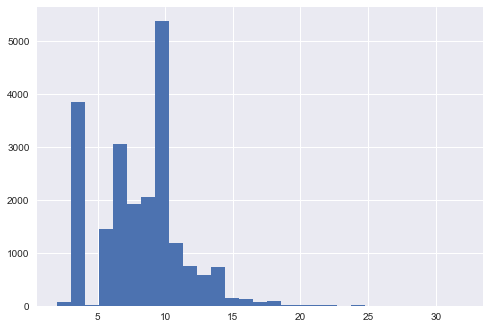

In [61]:
df_11['bathrm'].hist(bins=29)

In [62]:
df_11.bathrm.unique().size

29

In [63]:
df_11.bathrm.value_counts()

10    5377
4     3851
7     3047
9     2047
8     1930
6     1445
11    1185
12     753
14     731
13     589
15     155
16     136
18     100
17      79
3       71
19      23
20      21
21      13
22      10
5        9
24       6
2        4
23       4
25       2
26       2
27       2
32       2
30       1
31       1
Name: bathrm, dtype: int64

<AxesSubplot:>

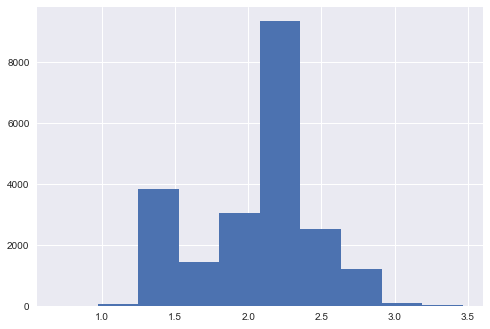

In [64]:
log_bath = np.log(df_11['bathrm'])
log_bath.hist()

Could potentially treat bathrooms as log-normal distribution. It looks slightly more normal transformed, but still does not look that normally distributed.

#### Log transform price, sqft_living, sqft_lot

In [65]:
# log transform of applicable variables
log_t = ['price', 'sqft_living', 'sqft_lot']

for l in log_t:
    l_log = np.log(df_11[l])
    df_11 = df_11.drop([l], axis=1)
    df_11[l] = l_log
    
# dummies
to_dum = ['zipcode', 'condition', 'waterfront', 'view']

for d in to_dum:
    dummy = pd.get_dummies(df_11[d], prefix=d, drop_first=True)
    df_11 = df_11.drop([d], axis=1)
    df_11 = pd.concat([df_11, dummy], axis=1)
    
df_11.describe()

bedrooms        bathrm         price   sqft_living      sqft_lot  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       3.371828      8.463373     13.048196      7.550728      8.989818   
std        0.904114      3.075992      0.526562      0.424199      0.902097   
min        1.000000      2.000000     11.264464      5.913503      6.253829   
25%        3.000000      7.000000     12.682307      7.265430      8.525161   
50%        3.000000      9.000000     13.017003      7.554859      8.938400   
75%        4.000000     10.000000     13.377006      7.843849      9.276643   
max       11.000000     32.000000     15.856731      9.513404     14.317109   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
count   21596.000000   21596.000000   21596.000000   21596.000000   
mean        0.009215       0.012965       0.014679       0.007779   
std         0.095552       0.113128       0.120266       0.087858   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98006  ...  zipcode_98199   condition_1   condition_2  \
count   21596.000000  ...   21596.000000  21596.000000  21596.000000   
mean        0.023060  ...       0.014679      0.007872      0.649194   
std         0.150097  ...       0.120266      0.088375      0.477233   
min         0.000000  ...       0.000000      0.000000      0.000000   
25%         0.000000  ...       0.000000      0.000000      0.000000   
50%         0.000000  ...       0.000000      0.000000      1.000000   
75%         0.000000  ...       0.000000      0.000000      1.000000   
max         1.000000  ...       1.000000      1.000000      1.000000   

        condition_3   condition_4  waterfront_1        view_1        view_2  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       0.262873      0.078718      0.006761      0.015281      0.044314   
std        0.440204      0.269305      0.081946      0.122670      0.205796   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21596.000000  21596.000000  
mean       0.023523      0.014679  
std        0.151561      0.120266  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 83 columns]

#### Model A

In [66]:
#statsmodel
df_y = df_11[['price']]
df_x = df_11.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1187.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:20:57   Log-Likelihood:                 3201.3
No. Observations:               16197   AIC:                            -6237.
Df Residuals:                   16114   BIC:                            -5598.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8734      0.065    105.287

#### Remove variables with p-value over 0.05

In [67]:
# drop following zipcodes (too high p-value) and run model again:
# zipcode_98198, zipcode_98032, zipcode_98023, zipcode_98002
zips_drop = ['zipcode_98002', 'zipcode_98023', 'zipcode_98032']
for z in zips_drop:
       df_11 = df_11.drop([z], axis=1)
df_11.describe()

bedrooms        bathrm         price   sqft_living      sqft_lot  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       3.371828      8.463373     13.048196      7.550728      8.989818   
std        0.904114      3.075992      0.526562      0.424199      0.902097   
min        1.000000      2.000000     11.264464      5.913503      6.253829   
25%        3.000000      7.000000     12.682307      7.265430      8.525161   
50%        3.000000      9.000000     13.017003      7.554859      8.938400   
75%        4.000000     10.000000     13.377006      7.843849      9.276643   
max       11.000000     32.000000     15.856731      9.513404     14.317109   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
count   21596.000000   21596.000000   21596.000000   21596.000000   
mean        0.012965       0.014679       0.007779       0.023060   
std         0.113128       0.120266       0.087858       0.150097   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98007  ...  zipcode_98199   condition_1   condition_2  \
count   21596.000000  ...   21596.000000  21596.000000  21596.000000   
mean        0.006529  ...       0.014679      0.007872      0.649194   
std         0.080540  ...       0.120266      0.088375      0.477233   
min         0.000000  ...       0.000000      0.000000      0.000000   
25%         0.000000  ...       0.000000      0.000000      0.000000   
50%         0.000000  ...       0.000000      0.000000      1.000000   
75%         0.000000  ...       0.000000      0.000000      1.000000   
max         1.000000  ...       1.000000      1.000000      1.000000   

        condition_3   condition_4  waterfront_1        view_1        view_2  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       0.262873      0.078718      0.006761      0.015281      0.044314   
std        0.440204      0.269305      0.081946      0.122670      0.205796   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21596.000000  21596.000000  
mean       0.023523      0.014679  
std        0.151561      0.120266  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 80 columns]

In [68]:
# Check correlation matrix between the dep. variables in this df.
df_11.corr()

bedrooms    bathrm     price  sqft_living  sqft_lot  \
bedrooms      1.000000  0.527870  0.350871     0.637670  0.189953   
bathrm        0.527870  1.000000  0.551270     0.762133  0.100617   
price         0.350871  0.551270  1.000000     0.674820  0.138271   
sqft_living   0.637670  0.762133  0.674820     1.000000  0.325979   
sqft_lot      0.189953  0.100617  0.138271     0.325979  1.000000   
...                ...       ...       ...          ...       ...   
waterfront_1 -0.002054  0.063628  0.170724     0.078898  0.072339   
view_1        0.022670  0.037932  0.097676     0.063659  0.018448   
view_2        0.046580  0.087018  0.158599     0.122779  0.053902   
view_3        0.051404  0.111904  0.172717     0.141314  0.073311   
view_4        0.034126  0.105787  0.224025     0.134285  0.073414   

              zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
bedrooms          -0.001862       0.065214       0.046948       0.079790   
bathrm            -0.010213       0.065356       0.035495       0.087885   
price             -0.110647       0.222655       0.086099       0.150089   
sqft_living       -0.012798       0.094177       0.058226       0.123103   
sqft_lot           0.020291       0.050623       0.062720       0.065221   
...                     ...            ...            ...            ...   
waterfront_1      -0.009456      -0.005371      -0.007305       0.002384   
view_1             0.005744       0.038156      -0.006733       0.003496   
view_2             0.011123       0.007395      -0.013944       0.032878   
view_3            -0.001584      -0.008782      -0.010265       0.055542   
view_4            -0.013989       0.010715      -0.002042       0.045380   

              zipcode_98007  ...  zipcode_98199  condition_1  condition_2  \
bedrooms           0.039792  ...      -0.021664    -0.050543     0.007402   
bathrm             0.006106  ...       0.008275    -0.075935     0.190769   
price              0.036664  ...       0.101805    -0.086094     0.021971   
sqft_living        0.015818  ...       0.010486    -0.080516     0.098506   
sqft_lot           0.011842  ...      -0.071554     0.039070    -0.120050   
...                     ...  ...            ...          ...          ...   
waterfront_1      -0.006688  ...      -0.005371    -0.000955    -0.017504   
view_1            -0.010099  ...       0.031878    -0.006825    -0.019169   
view_2            -0.011869  ...       0.039202    -0.011542    -0.017577   
view_3            -0.012582  ...       0.057271    -0.006911    -0.013951   
view_4            -0.009895  ...      -0.014897    -0.010872    -0.025652   

              condition_3  condition_4  waterfront_1    view_1    view_2  \
bedrooms        -0.009176     0.022992     -0.002054  0.022670  0.046580   
bathrm          -0.166771    -0.034699      0.063628  0.037932  0.087018   
price           -0.040794     0.061069      0.170724  0.097676  0.158599   
sqft_living     -0.077117    -0.016075      0.078898  0.063659  0.122779   
sqft_lot         0.122758    -0.002802      0.072339  0.018448  0.053902   
...                   ...          ...           ...       ...       ...   
waterfront_1     0.009783     0.013654      1.000000 -0.005671  0.001456   
view_1           0.014794     0.011246     -0.005671  1.000000 -0.026824   
view_2           0.007376     0.023952      0.001456 -0.026824  1.000000   
view_3           0.013507     0.005685      0.039394 -0.019334 -0.033421   
view_4           0.012831     0.025802      0.567871 -0.015204 -0.026282   

                view_3    view_4  
bedrooms      0.051404  0.034126  
bathrm        0.111904  0.105787  
price         0.172717  0.224025  
sqft_living   0.141314  0.134285  
sqft_lot      0.073311  0.073414  
...                ...       ...  
waterfront_1  0.039394  0.567871  
view_1       -0.019334 -0.015204  
view_2       -0.033421 -0.026282  
view_3        1.000000 -0.018944  
view_4       -0.018944  1.000000  

[80 rows x 80

In [69]:
abs(df_11.corr()) > .75

bedrooms  bathrm  price  sqft_living  sqft_lot  zipcode_98003  \
bedrooms          True   False  False        False     False          False   
bathrm           False    True  False         True     False          False   
price            False   False   True        False     False          False   
sqft_living      False    True  False         True     False          False   
sqft_lot         False   False  False        False      True          False   
...                ...     ...    ...          ...       ...            ...   
waterfront_1     False   False  False        False     False          False   
view_1           False   False  False        False     False          False   
view_2           False   False  False        False     False          False   
view_3           False   False  False        False     False          False   
view_4           False   False  False        False     False          False   

              zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  ...  \
bedrooms              False          False          False          False  ...   
bathrm                False          False          False          False  ...   
price                 False          False          False          False  ...   
sqft_living           False          False          False          False  ...   
sqft_lot              False          False          False          False  ...   
...                     ...            ...            ...            ...  ...   
waterfront_1          False          False          False          False  ...   
view_1                False          False          False          False  ...   
view_2                False          False          False          False  ...   
view_3                False          False          False          False  ...   
view_4                False          False          False          False  ...   

              zipcode_98199  condition_1  condition_2  condition_3  \
bedrooms              False        False        False        False   
bathrm                False        False        False        False   
price                 False        False        False        False   
sqft_living           False        False        False        False   
sqft_lot              False        False        False        False   
...                     ...          ...          ...          ...   
waterfront_1          False        False        False        False   
view_1                False        False        False        False   
view_2                False        False        False        False   
view_3                False        False        False        False   
view_4                False        False        False        False   

              condition_4  waterfront_1  view_1  view_2  view_3  view_4  
bedrooms            False         False   False   False   False   False  
bathrm              False         False   False   False   False   False  
price               False         False   False   False   False   False  
sqft_living         False         False   False   False   False   False  
sqft_lot            False         False   False   False   False   False  
...                   ...           ...     ...     ...     ...     ...  
waterfront_1        False          True   False   False   False   False  
view_1              False         False    True   False   False   False  
view_2              False         False   False    True   False   False  
view_3              False         False   False   False    True   False  
view_4              False         False   False   False   False    True  

[80 rows x 80 columns]

#### look at high correlating features in the dataframe (avoid multicol.)

In [70]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_11.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

df_mc[(df_mc.cc>.75) & (df_mc.cc<1)]

cc
pairs                               
(condition_3, condition_2)  0.812373
(bathrm, sqft_living)       0.762133

* Condition 3 and condition 2 are highly correlated. 
* Bathroom and sqft_living are highly correlated.
I will drop condition_3 and bathrm from dataset

In [71]:
df_11 = df_11.drop(['condition_3'], axis=1)
df_11 = df_11.drop(['bathrm'], axis=1)
df_11

bedrooms      price  sqft_living  sqft_lot  zipcode_98003  \
0             3  12.309982     7.073270  8.639411              0   
1             3  13.195614     7.851661  8.887653              0   
2             2  12.100712     6.646391  9.210340              0   
3             4  13.311329     7.580700  8.517193              0   
4             3  13.142166     7.426549  8.997147              0   
...         ...        ...          ...       ...            ...   
21592         3  12.793859     7.333023  7.030857              0   
21593         4  12.899220     7.745003  8.667852              0   
21594         2  12.904459     6.927558  7.207860              0   
21595         3  12.899220     7.377759  7.778211              0   
21596         2  12.691580     6.927558  6.981006              0   

       zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98008  ...  zipcode_98198  zipcode_98199  condition_1  \
0                  0  ...              0              0            0   
1                  0  ...              0              0            0   
2                  0  ...              0              0            0   
3                  0  ...              0              0            0   
4                  0  ...              0              0            0   
...              ...  ...            ...            ...          ...   
21592              0  ...              0              0            0   
21593              0  ...              0              0            0   
21594              0  ...              0              0            0   
21595              0  ...              0              0            0   
21596              0  ...              0              0            0   

       condition_2  condition_4  waterfront_1  view_1  view_2  view_3  view_4  
0                1            0             0       0       0       0       0  
1                1            0             0       0       0       0       0  
2                1            0             0       0       0       0       0  
3                0            1             0       0       0       0       0  
4                1            0             0       0       0       0       0  
...            ...          ...           ...     ...     ...     ...     ...  
21592            1            0             0       0       0       0       0  
21593            1            0             0       0       0       0       0  
21594            1            0             0       0       0       0       0  
21595            1            0             0       0       0       0       0  
21596            1            0             0       0       0       0       0  

[21596 rows x 78 columns]

#### Model B

In [72]:
df_y = df_11[['price']]
df_x = df_11.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1226.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:20:59   Log-Likelihood:                 2984.1
No. Observations:               16197   AIC:                            -5812.
Df Residuals:                   16119   BIC:                            -5212.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.7950      0.040    171.881

#### Check assumptions

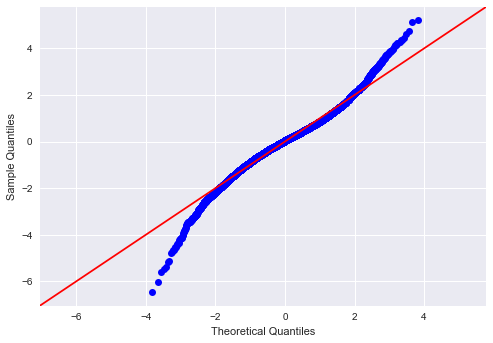

In [73]:
# run checks on linear regression assumptions
# check assumptions
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

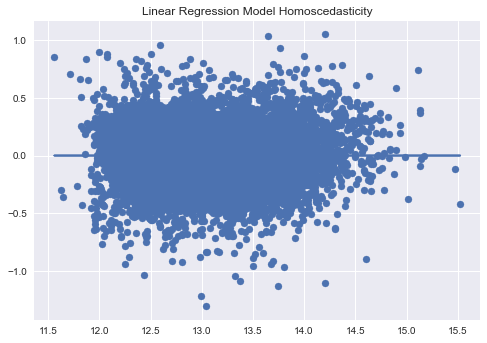

In [74]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

#### Check multicollinearity

In [75]:
# deal with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('bedrooms', 21.546513266281842),
 ('sqft_living', 234.3301312089465),
 ('sqft_lot', 159.37967130970796),
 ('zipcode_98003', 1.232247354268154),
 ('zipcode_98004', 1.2865898747812374),
 ('zipcode_98005', 1.1520541486422629),
 ('zipcode_98006', 1.4580619437262443),
 ('zipcode_98007', 1.1204222453407158),
 ('zipcode_98008', 1.2399088534207474),
 ('zipcode_98010', 1.0958126991004329),
 ('zipcode_98011', 1.1692972380867324),
 ('zipcode_98014', 1.1330572359707287),
 ('zipcode_98019', 1.1725855416392668),
 ('zipcode_98022', 1.2229974146958569),
 ('zipcode_98024', 1.089910057382766),
 ('zipcode_98027', 1.3621039265753427),
 ('zipcode_98028', 1.2405936275109244),
 ('zipcode_98029', 1.2914845794357208),
 ('zipcode_98030', 1.2135687051481094),
 ('zipcode_98031', 1.2262446020265925),
 ('zipcode_98033', 1.3728447958084595),
 ('zipcode_98034', 1.450525931597554),
 ('zipcode_98038', 1.5104442843413572),
 ('zipcode_98039', 1.0492504258822273),
 ('zipcode_98040', 1.2744955312193953),
 ('zipcode_98042

#### Evaluate with MAE

In [76]:
X = sm.add_constant(df_train_x)

# generate predictions
ypred = res.predict(X)

z = np.exp(df_train_y['price'])
z1 = np.exp(ypred)

mae = meanabs
mae = mae(z, z1)
mae

83988.02173104261

#### Remove sqft-lot (high multicollinearity) and model again

In [77]:
df_11 = df_11.drop(['sqft_lot'], axis=1)
df_11

bedrooms      price  sqft_living  zipcode_98003  zipcode_98004  \
0             3  12.309982     7.073270              0              0   
1             3  13.195614     7.851661              0              0   
2             2  12.100712     6.646391              0              0   
3             4  13.311329     7.580700              0              0   
4             3  13.142166     7.426549              0              0   
...         ...        ...          ...            ...            ...   
21592         3  12.793859     7.333023              0              0   
21593         4  12.899220     7.745003              0              0   
21594         2  12.904459     6.927558              0              0   
21595         3  12.899220     7.377759              0              0   
21596         2  12.691580     6.927558              0              0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98010  ...  zipcode_98198  zipcode_98199  condition_1  \
0                  0  ...              0              0            0   
1                  0  ...              0              0            0   
2                  0  ...              0              0            0   
3                  0  ...              0              0            0   
4                  0  ...              0              0            0   
...              ...  ...            ...            ...          ...   
21592              0  ...              0              0            0   
21593              0  ...              0              0            0   
21594              0  ...              0              0            0   
21595              0  ...              0              0            0   
21596              0  ...              0              0            0   

       condition_2  condition_4  waterfront_1  view_1  view_2  view_3  view_4  
0                1            0             0       0       0       0       0  
1                1            0             0       0       0       0       0  
2                1            0             0       0       0       0       0  
3                0            1             0       0       0       0       0  
4                1            0             0       0       0       0       0  
...            ...          ...           ...     ...     ...     ...     ...  
21592            1            0             0       0       0       0       0  
21593            1            0             0       0       0       0       0  
21594            1            0             0       0       0       0       0  
21595            1            0             0       0       0       0       0  
21596            1            0             0       0       0       0       0  

[21596 rows x 77 columns]

In [78]:
df_y = df_11[['price']]
df_x = df_11.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1183.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:21:21   Log-Likelihood:                 2645.1
No. Observations:               16197   AIC:                            -5136.
Df Residuals:                   16120   BIC:                            -4544.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.1241      0.038    186.088

#### Check assumptions

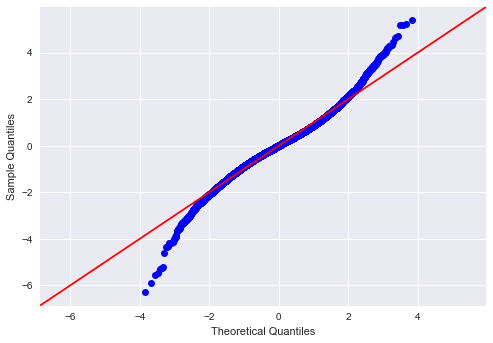

In [79]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

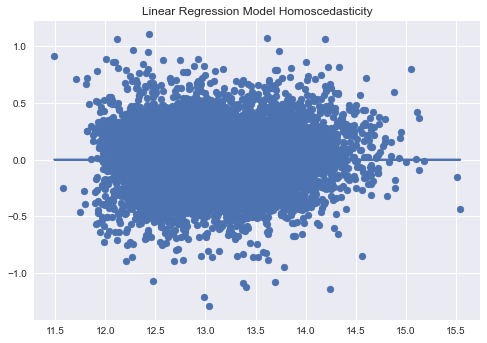

In [80]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [81]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('bedrooms', 20.755474468131258),
 ('sqft_living', 44.50986727737503),
 ('zipcode_98003', 1.2314025648620521),
 ('zipcode_98004', 1.2865689455638494),
 ('zipcode_98005', 1.151128411858298),
 ('zipcode_98006', 1.4579038621142923),
 ('zipcode_98007', 1.1204220831504366),
 ('zipcode_98008', 1.239880447975232),
 ('zipcode_98010', 1.0848962273094478),
 ('zipcode_98011', 1.1692817863803646),
 ('zipcode_98014', 1.1088420352797153),
 ('zipcode_98019', 1.1674389738377098),
 ('zipcode_98022', 1.2020990676790926),
 ('zipcode_98024', 1.0691012621765459),
 ('zipcode_98027', 1.3613859326878255),
 ('zipcode_98028', 1.2401935874556254),
 ('zipcode_98029', 1.2831392163314368),
 ('zipcode_98030', 1.2133397097305345),
 ('zipcode_98031', 1.2259367882101189),
 ('zipcode_98033', 1.3725858905037414),
 ('zipcode_98034', 1.450261083385069),
 ('zipcode_98038', 1.509767343218283),
 ('zipcode_98039', 1.049250425871056),
 ('zipcode_98040', 1.2742789282375935),
 ('zipcode_98042', 1.4553690995758903),
 ('zipcode_98

#### Remove bedrooms (multicollinearity too high) and model again

In [82]:
df_11 = df_11.drop(['bedrooms'], axis=1)
df_11

price  sqft_living  zipcode_98003  zipcode_98004  zipcode_98005  \
0      12.309982     7.073270              0              0              0   
1      13.195614     7.851661              0              0              0   
2      12.100712     6.646391              0              0              0   
3      13.311329     7.580700              0              0              0   
4      13.142166     7.426549              0              0              0   
...          ...          ...            ...            ...            ...   
21592  12.793859     7.333023              0              0              0   
21593  12.899220     7.745003              0              0              0   
21594  12.904459     6.927558              0              0              0   
21595  12.899220     7.377759              0              0              0   
21596  12.691580     6.927558              0              0              0   

       zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98011  ...  zipcode_98198  zipcode_98199  condition_1  \
0                  0  ...              0              0            0   
1                  0  ...              0              0            0   
2                  0  ...              0              0            0   
3                  0  ...              0              0            0   
4                  0  ...              0              0            0   
...              ...  ...            ...            ...          ...   
21592              0  ...              0              0            0   
21593              0  ...              0              0            0   
21594              0  ...              0              0            0   
21595              0  ...              0              0            0   
21596              0  ...              0              0            0   

       condition_2  condition_4  waterfront_1  view_1  view_2  view_3  view_4  
0                1            0             0       0       0       0       0  
1                1            0             0       0       0       0       0  
2                1            0             0       0       0       0       0  
3                0            1             0       0       0       0       0  
4                1            0             0       0       0       0       0  
...            ...          ...           ...     ...     ...     ...     ...  
21592            1            0             0       0       0       0       0  
21593            1            0             0       0       0       0       0  
21594            1            0             0       0       0       0       0  
21595            1            0             0       0       0       0       0  
21596            1            0             0       0       0       0       0  

[21596 rows x 76 columns]

In [83]:
df_y = df_11[['price']]
df_x = df_11.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1180.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:21:41   Log-Likelihood:                 2540.6
No. Observations:               16197   AIC:                            -4929.
Df Residuals:                   16121   BIC:                            -4345.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3824      0.034    216.604

* Note that p-value of condition 2 is over .05

#### Check assumptions

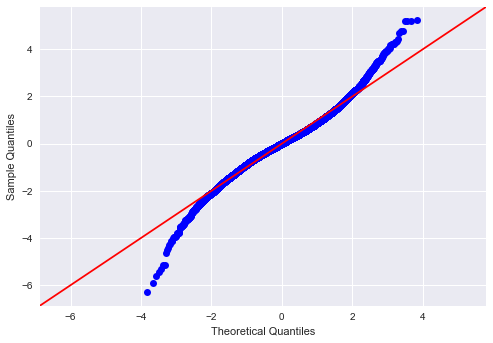

In [84]:
# run checks on linear regression assumptions
# check assumptions
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

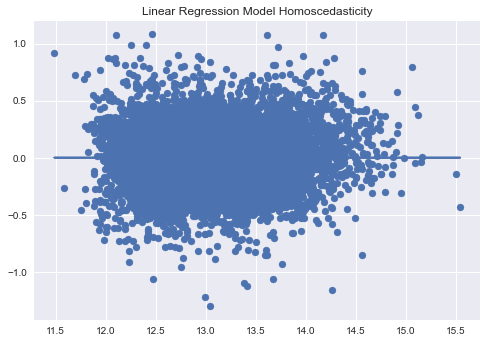

In [85]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [86]:
# deal with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('sqft_living', 20.249636624287362),
 ('zipcode_98003', 1.2283563612888353),
 ('zipcode_98004', 1.2864444508688917),
 ('zipcode_98005', 1.1510981293949436),
 ('zipcode_98006', 1.4574013879974759),
 ('zipcode_98007', 1.120418006259554),
 ('zipcode_98008', 1.239809308484645),
 ('zipcode_98010', 1.08313003475281),
 ('zipcode_98011', 1.1683225669910036),
 ('zipcode_98014', 1.1037009989128754),
 ('zipcode_98019', 1.1650465174507278),
 ('zipcode_98022', 1.1958803214410754),
 ('zipcode_98024', 1.0678320190113355),
 ('zipcode_98027', 1.3582421819929171),
 ('zipcode_98028', 1.238269308434113),
 ('zipcode_98029', 1.2796170958777384),
 ('zipcode_98030', 1.21225317096873),
 ('zipcode_98031', 1.2247356192695675),
 ('zipcode_98033', 1.3701462608745765),
 ('zipcode_98034', 1.4471831855686874),
 ('zipcode_98038', 1.504735038552495),
 ('zipcode_98039', 1.0492504040071815),
 ('zipcode_98040', 1.2742571378521714),
 ('zipcode_98042', 1.450626325048894),
 ('zipcode_98045', 1.1848987238057638),
 ('zipcode_

* still too high multicollinearity value for sqft_living

Try removing outliers in sqft_living based on z-score

#### Filter based on z-score of price & sqft_living

<AxesSubplot:>

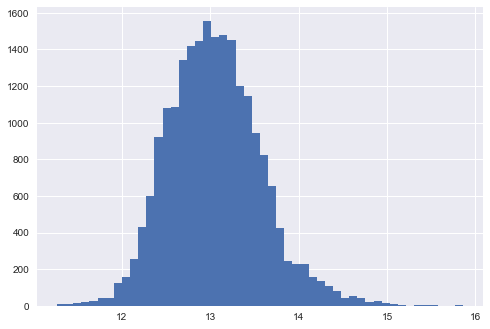

In [87]:
df_11.price.hist(bins=50)

In [88]:
# drop rows in df based on price z-score
max_price = df_11.price.mean() + (3*df_11.price.std())
min_price = df_11.price.mean() - (3*df_11.price.std())

df_11 = df_11[(df_11.price < max_price) & (df_11.price > min_price)]
df_11

price  sqft_living  zipcode_98003  zipcode_98004  zipcode_98005  \
0      12.309982     7.073270              0              0              0   
1      13.195614     7.851661              0              0              0   
2      12.100712     6.646391              0              0              0   
3      13.311329     7.580700              0              0              0   
4      13.142166     7.426549              0              0              0   
...          ...          ...            ...            ...            ...   
21592  12.793859     7.333023              0              0              0   
21593  12.899220     7.745003              0              0              0   
21594  12.904459     6.927558              0              0              0   
21595  12.899220     7.377759              0              0              0   
21596  12.691580     6.927558              0              0              0   

       zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98011  ...  zipcode_98198  zipcode_98199  condition_1  \
0                  0  ...              0              0            0   
1                  0  ...              0              0            0   
2                  0  ...              0              0            0   
3                  0  ...              0              0            0   
4                  0  ...              0              0            0   
...              ...  ...            ...            ...          ...   
21592              0  ...              0              0            0   
21593              0  ...              0              0            0   
21594              0  ...              0              0            0   
21595              0  ...              0              0            0   
21596              0  ...              0              0            0   

       condition_2  condition_4  waterfront_1  view_1  view_2  view_3  view_4  
0                1            0             0       0       0       0       0  
1                1            0             0       0       0       0       0  
2                1            0             0       0       0       0       0  
3                0            1             0       0       0       0       0  
4                1            0             0       0       0       0       0  
...            ...          ...           ...     ...     ...     ...     ...  
21592            1            0             0       0       0       0       0  
21593            1            0             0       0       0       0       0  
21594            1            0             0       0       0       0       0  
21595            1            0             0       0       0       0       0  
21596            1            0             0       0       0       0       0  

[21427 rows x 76 columns]

<AxesSubplot:>

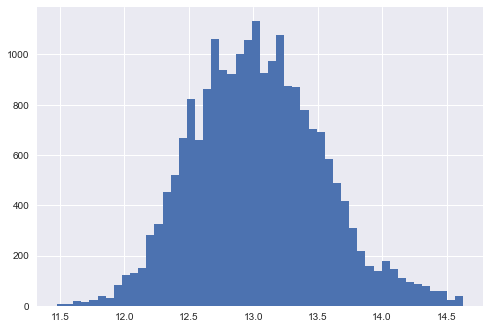

In [89]:
df_11.price.hist(bins=50)

<AxesSubplot:>

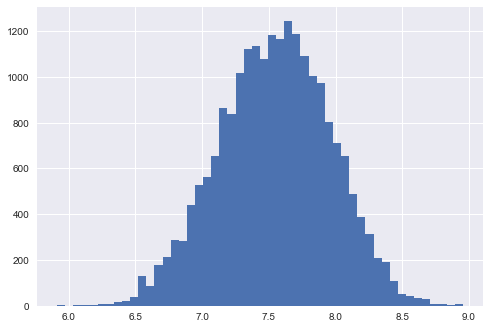

In [90]:
df_11.sqft_living.hist(bins=50)

<AxesSubplot:>

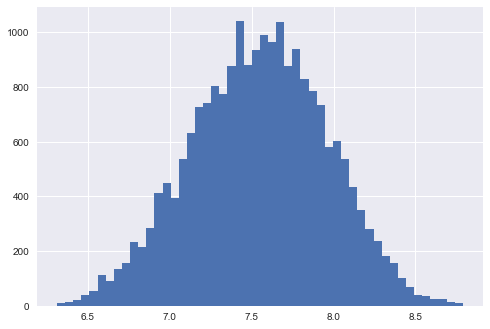

In [91]:
# drop rows in df based on sqft_living z-score
max_sqft_living = df_11.sqft_living.mean() + (3*df_11.sqft_living.std())
min_sqft_living = df_11.sqft_living.mean() - (3*df_11.sqft_living.std())

df_11 = df_11[(df_11.sqft_living < max_sqft_living) & (df_11.sqft_living > min_sqft_living)]
df_11.sqft_living.hist(bins=50)

#### Check linearity assumptions

In [92]:
df_11.columns

Index(['price', 'sqft_living', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98

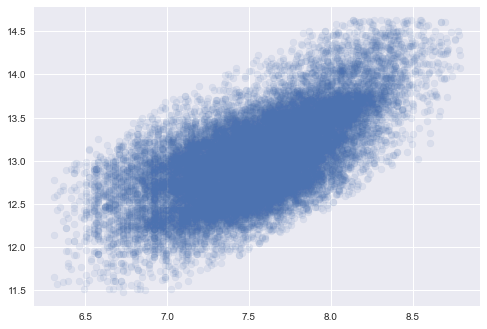

In [93]:
# visualize scatterplots of histograms with price as y variable and sqft_living

plt.scatter(df_11['sqft_living'], df_11['price'], label=column, alpha=.1)

#### Model

In [94]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_11)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1109.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:22:02   Log-Likelihood:                 2892.6
No. Observations:               16042   AIC:                            -5633.
Df Residuals:                   15966   BIC:                            -5049.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4802      0.034    220.955

In [95]:
multicollinearity_check(df_x)

[('sqft_living', 20.135183566140768),
 ('zipcode_98003', 1.2296047878793905),
 ('zipcode_98004', 1.2579636877065805),
 ('zipcode_98005', 1.1518748339539258),
 ('zipcode_98006', 1.4463774531665023),
 ('zipcode_98007', 1.121028164412369),
 ('zipcode_98008', 1.2340139883906212),
 ('zipcode_98010', 1.0830242217068071),
 ('zipcode_98011', 1.1692255203529995),
 ('zipcode_98014', 1.1024640575659013),
 ('zipcode_98019', 1.1659329225789987),
 ('zipcode_98022', 1.1957640485507854),
 ('zipcode_98024', 1.0682065788234656),
 ('zipcode_98027', 1.3568760701247378),
 ('zipcode_98028', 1.2396045817594554),
 ('zipcode_98029', 1.281134034980582),
 ('zipcode_98030', 1.2133448011594479),
 ('zipcode_98031', 1.2258740231709262),
 ('zipcode_98033', 1.362969350786472),
 ('zipcode_98034', 1.446078072680201),
 ('zipcode_98038', 1.50743901797198),
 ('zipcode_98039', 1.0313728140581293),
 ('zipcode_98040', 1.2567041376651193),
 ('zipcode_98042', 1.4528899967230149),
 ('zipcode_98045', 1.1836845289140896),
 ('zipco

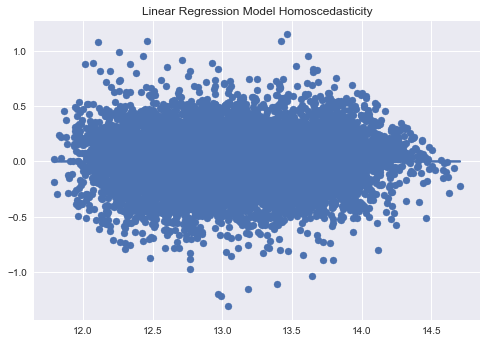

In [96]:
sm_check_scedas(res, df_train_y, X)

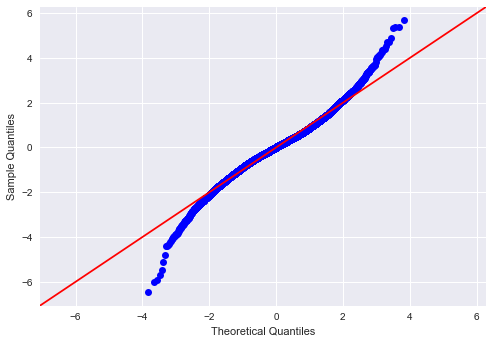

In [97]:
sm_check_resid_normality(res)

#### try without log-normalize

In [98]:
df_11 = df.copy()
df_11 = df_11[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms',
               'condition', 'waterfront', 'sqft_lot', 'view']]

# remove the outlier of 33 bedrooms
df_11 = df_11[df_11['bedrooms'] < 32]

# fix problem of .5, .75 bathrooms and so on...
df_11['bathrm'] = df_11.bathrooms*4
df_11.bathrm = df_11.bathrm.astype('int32')
df_11 = df_11.drop('bathrooms', axis=1)

# dummies
to_dum = ['zipcode', 'condition', 'waterfront', 'view']

for d in to_dum:
    dummy = pd.get_dummies(df_11[d], prefix=d, drop_first=True)
    df_11 = df_11.drop([d], axis=1)
    df_11 = pd.concat([df_11, dummy], axis=1)
    
df_11.describe()

price   sqft_living      bedrooms      sqft_lot        bathrm  \
count  2.159600e+04  21596.000000  21596.000000  2.159600e+04  21596.000000   
mean   5.402920e+05   2080.343165      3.371828  1.509983e+04      8.463373   
std    3.673760e+05    918.122038      0.904114  4.141355e+04      3.075992   
min    7.800000e+04    370.000000      1.000000  5.200000e+02      2.000000   
25%    3.220000e+05   1430.000000      3.000000  5.040000e+03      7.000000   
50%    4.500000e+05   1910.000000      3.000000  7.619000e+03      9.000000   
75%    6.450000e+05   2550.000000      4.000000  1.068550e+04     10.000000   
max    7.700000e+06  13540.000000     11.000000  1.651359e+06     32.000000   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
count   21596.000000   21596.000000   21596.000000   21596.000000   
mean        0.009215       0.012965       0.014679       0.007779   
std         0.095552       0.113128       0.120266       0.087858   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98006  ...  zipcode_98199   condition_1   condition_2  \
count   21596.000000  ...   21596.000000  21596.000000  21596.000000   
mean        0.023060  ...       0.014679      0.007872      0.649194   
std         0.150097  ...       0.120266      0.088375      0.477233   
min         0.000000  ...       0.000000      0.000000      0.000000   
25%         0.000000  ...       0.000000      0.000000      0.000000   
50%         0.000000  ...       0.000000      0.000000      1.000000   
75%         0.000000  ...       0.000000      0.000000      1.000000   
max         1.000000  ...       1.000000      1.000000      1.000000   

        condition_3   condition_4  waterfront_1        view_1        view_2  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       0.262873      0.078718      0.006761      0.015281      0.044314   
std        0.440204      0.269305      0.081946      0.122670      0.205796   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21596.000000  21596.000000  
mean       0.023523      0.014679  
std        0.151561      0.120266  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 83 columns]

#### Model C (no log-normalization)

In [99]:
#statsmodel
df_y = df_11[['price']]
df_x = df_11.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     751.2
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:22:22   Log-Likelihood:            -2.1773e+05
No. Observations:               16197   AIC:                         4.356e+05
Df Residuals:                   16114   BIC:                         4.363e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.751e+05   4.01e+04     -4.366

#### Check assumptions

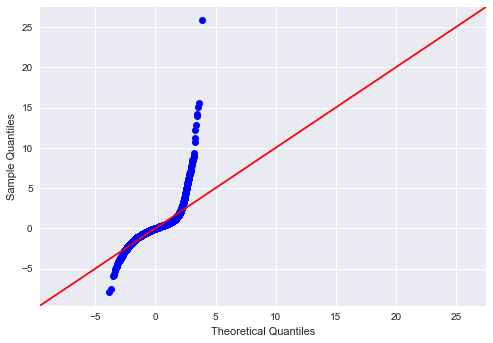

In [100]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

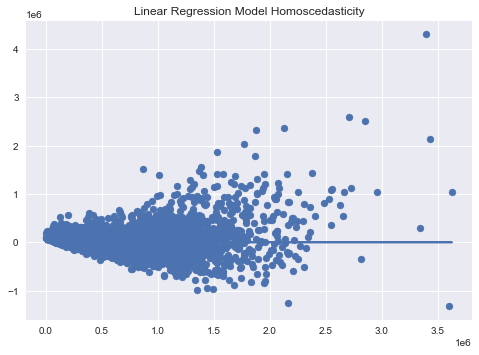

In [101]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

<AxesSubplot:>

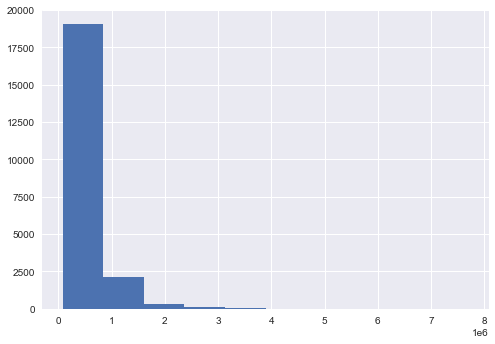

In [102]:
df_11.price.hist()

In [103]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df_11.price.quantile(q=q)))

0.8 percentile: 700500.0
0.81 percentile: 718000.0
0.82 percentile: 730000.8999999999
0.83 percentile: 749950.0
0.84 percentile: 760004.0
0.85 percentile: 779807.5
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836799.9999999993
0.89 percentile: 859972.0
0.9 percentile: 887000.0
0.91 percentile: 919994.5
0.92 percentile: 950000.0
0.93 percentile: 997967.5
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [104]:
orig_tot = len(df_11)
df_11c = df_11[df_11.price < 1970000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_11c))/orig_tot)


# Refit model with subset features
#statsmodel
df_y = df_11c[['price']]
df_x = df_11c.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

Percent removed: 0.010048157066123355
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     839.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:22:23   Log-Likelihood:            -2.1069e+05
No. Observations:               16034   AIC:                         4.215e+05
Df Residuals:                   15951   BIC:                         4.222e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

strong multicollinearity or other numerical problems.


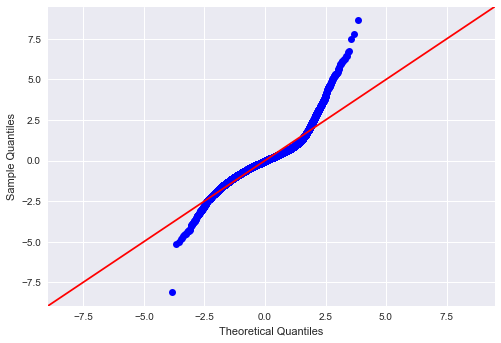

In [105]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [106]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df_11c.price.quantile(q=q)))

0.8 percentile: 695000.0
0.81 percentile: 705000.0
0.82 percentile: 720000.0
0.83 percentile: 735000.0
0.84 percentile: 750000.0
0.85 percentile: 765000.0
0.86 percentile: 780000.0
0.87 percentile: 800000.0
0.88 percentile: 818964.0
0.89 percentile: 840000.0
0.9 percentile: 860000.0
0.91 percentile: 890000.0
0.92 percentile: 920000.0
0.93 percentile: 952999.18
0.94 percentile: 998595.9999999999
0.95 percentile: 1070000.0
0.96 percentile: 1160000.0
0.97 percentile: 1260000.0
0.98 percentile: 1400000.0
0.99 percentile: 1600000.0


In [107]:
orig_tot = len(df_11c)
df_11d = df_11c[df_11c.price < 1600000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_11d))/orig_tot)

# Refit model with subset features
#statsmodel
df_y = df_11d[['price']]
df_x = df_11d.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

Percent removed: 0.010898545301464054
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     778.6
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:22:23   Log-Likelihood:            -2.0699e+05
No. Observations:               15859   AIC:                         4.141e+05
Df Residuals:                   15776   BIC:                         4.148e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

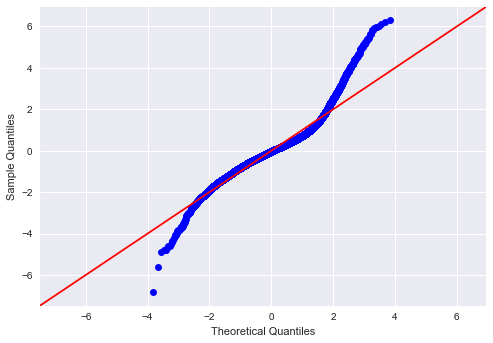

In [108]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [109]:
# remove high p-vals and try model again.

# drop following zipcodes (too high p-value) and run model again:
# zipcode_98198, zipcode_98032, zipcode_98023, zipcode_98002
zips_drop = ['zipcode_98002', 'zipcode_98003', 'zipcode_98022', 'zipcode_98023',
            'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98042',
            'zipcode_98092', 'zipcode_98198']
for z in zips_drop:
       df_11d = df_11d.drop([z], axis=1)
df_11d.describe()

price   sqft_living      bedrooms      sqft_lot        bathrm  \
count  2.114600e+04  21146.000000  21146.000000  2.114600e+04  21146.000000   
mean   5.047075e+05   2028.578596      3.353258  1.476831e+04      8.339875   
std    2.547993e+05    832.151461      0.894299  3.996741e+04      2.935294   
min    7.800000e+04    370.000000      1.000000  5.200000e+02      2.000000   
25%    3.200000e+05   1410.000000      3.000000  5.003000e+03      6.000000   
50%    4.458340e+05   1890.000000      3.000000  7.560000e+03      9.000000   
75%    6.250000e+05   2500.000000      4.000000  1.048000e+04     10.000000   
max    1.590000e+06   7480.000000     11.000000  1.651359e+06     30.000000   

       zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  \
count   21146.000000   21146.000000   21146.000000   21146.000000   
mean        0.010546       0.007708       0.022037       0.006668   
std         0.102152       0.087460       0.146808       0.081387   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98008  ...  zipcode_98199   condition_1   condition_2  \
count   21146.000000  ...   21146.000000  21146.000000  21146.000000   
mean        0.012958  ...       0.014376      0.007992      0.649485   
std         0.113094  ...       0.119039      0.089042      0.477143   
min         0.000000  ...       0.000000      0.000000      0.000000   
25%         0.000000  ...       0.000000      0.000000      0.000000   
50%         0.000000  ...       0.000000      0.000000      1.000000   
75%         0.000000  ...       0.000000      0.000000      1.000000   
max         1.000000  ...       1.000000      1.000000      1.000000   

        condition_3   condition_4  waterfront_1        view_1        view_2  \
count  21146.000000  21146.000000  21146.000000  21146.000000  21146.000000   
mean       0.263549      0.077603      0.003547      0.014376      0.042656   
std        0.440568      0.267553      0.059450      0.119039      0.202085   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21146.000000  21146.000000  
mean       0.020997      0.009836  
std        0.143377      0.098692  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 73 columns]

In [110]:
df_y = df_11d[['price']]
df_x = df_11d.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     886.2
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:22:24   Log-Likelihood:            -2.0700e+05
No. Observations:               15859   AIC:                         4.141e+05
Df Residuals:                   15786   BIC:                         4.147e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.294e+05   2.39e+04     -5.405

In [111]:
# deal with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('sqft_living', 20.738391480375316),
 ('bedrooms', 25.307799003533766),
 ('sqft_lot', 1.3291827236207934),
 ('bathrm', 21.750284369490668),
 ('zipcode_98004', 1.0708985486936748),
 ('zipcode_98005', 1.0577647124004816),
 ('zipcode_98006', 1.1716881591042996),
 ('zipcode_98007', 1.045134178773884),
 ('zipcode_98008', 1.087180567136039),
 ('zipcode_98010', 1.0347331890490734),
 ('zipcode_98011', 1.0611075307990212),
 ('zipcode_98014', 1.0596423741233656),
 ('zipcode_98019', 1.0648894335178383),
 ('zipcode_98024', 1.0350956250618302),
 ('zipcode_98027', 1.1328477248410465),
 ('zipcode_98028', 1.0849324065880486),
 ('zipcode_98029', 1.1091901772225874),
 ('zipcode_98033', 1.1263768951503033),
 ('zipcode_98034', 1.1595191721188307),
 ('zipcode_98038', 1.1882463076325558),
 ('zipcode_98039', 1.0061572772443848),
 ('zipcode_98040', 1.0937946582793643),
 ('zipcode_98045', 1.0751030640800743),
 ('zipcode_98052', 1.1813171200000194),
 ('zipcode_98053', 1.1545678908065151),
 ('zipcode_98055', 1.

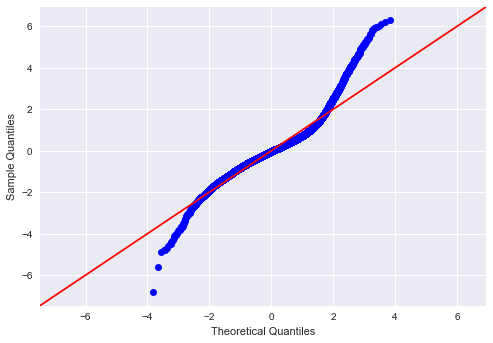

In [112]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

### Model 12 - learning from 11

#### Create model like df from model 11, but focus on preprocessing

In [113]:
df_12 = df.copy()
df_12 = df_12[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms',
               'condition', 'waterfront', 'sqft_lot', 'view']]

df_12

price  zipcode  sqft_living  bedrooms  bathrooms  condition  \
0      221900.0    98178         1180         3       1.00          2   
1      538000.0    98125         2570         3       2.25          2   
2      180000.0    98028          770         2       1.00          2   
3      604000.0    98136         1960         4       3.00          4   
4      510000.0    98074         1680         3       2.00          2   
...         ...      ...          ...       ...        ...        ...   
21592  360000.0    98103         1530         3       2.50          2   
21593  400000.0    98146         2310         4       2.50          2   
21594  402101.0    98144         1020         2       0.75          2   
21595  400000.0    98027         1600         3       2.50          2   
21596  325000.0    98144         1020         2       0.75          2   

       waterfront  sqft_lot  view  
0               0      5650     0  
1               0      7242     0  
2               0     10000     0  
3               0      5000     0  
4               0      8080     0  
...           ...       ...   ...  
21592           0      1131     0  
21593           0      5813     0  
21594           0      1350     0  
21595           0      2388     0  
21596           0      1076     0  

[21597 rows x 9 columns]

#### Preprocessing

In [114]:
# remove the outlier of 33 bedrooms
df_12 = df_12[df_12['bedrooms'] < 32]

# fix problem of .5, .75 bathrooms and so on...
df_12['bathrm4'] = df_12.bathrooms*4
df_12.bathrm4 = df_12.bathrm4.astype('int32')
df_12 = df_12.drop('bathrooms', axis=1)
df_12

<ipython-input-114-88e99cc19300>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12['bathrm4'] = df_12.bathrooms*4
C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


price  zipcode  sqft_living  bedrooms  condition  waterfront  \
0      221900.0    98178         1180         3          2           0   
1      538000.0    98125         2570         3          2           0   
2      180000.0    98028          770         2          2           0   
3      604000.0    98136         1960         4          4           0   
4      510000.0    98074         1680         3          2           0   
...         ...      ...          ...       ...        ...         ...   
21592  360000.0    98103         1530         3          2           0   
21593  400000.0    98146         2310         4          2           0   
21594  402101.0    98144         1020         2          2           0   
21595  400000.0    98027         1600         3          2           0   
21596  325000.0    98144         1020         2          2           0   

       sqft_lot  view  bathrm4  
0          5650     0        4  
1          7242     0        9  
2         10000     0        4  
3          5000     0       12  
4          8080     0        8  
...         ...   ...      ...  
21592      1131     0       10  
21593      5813     0       10  
21594      1350     0        3  
21595      2388     0       10  
21596      1076     0        3  

[21596 rows x 9 columns]

In [115]:
# apply log transforms and dummy vars to appropriate variables
# log transform of applicable variables
log_t = ['price', 'sqft_living', 'sqft_lot']

for l in log_t:
    l_log = np.log(df_12[l])
    df_12 = df_12.drop([l], axis=1)
    df_12[l] = l_log
    
# dummies
to_dum = ['zipcode', 'condition', 'waterfront', 'view']

for d in to_dum:
    dummy = pd.get_dummies(df_12[d], prefix=d, drop_first=True)
    df_12 = df_12.drop([d], axis=1)
    df_12 = pd.concat([df_12, dummy], axis=1)
    
df_12.describe()

bedrooms       bathrm4         price   sqft_living      sqft_lot  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       3.371828      8.463373     13.048196      7.550728      8.989818   
std        0.904114      3.075992      0.526562      0.424199      0.902097   
min        1.000000      2.000000     11.264464      5.913503      6.253829   
25%        3.000000      7.000000     12.682307      7.265430      8.525161   
50%        3.000000      9.000000     13.017003      7.554859      8.938400   
75%        4.000000     10.000000     13.377006      7.843849      9.276643   
max       11.000000     32.000000     15.856731      9.513404     14.317109   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
count   21596.000000   21596.000000   21596.000000   21596.000000   
mean        0.009215       0.012965       0.014679       0.007779   
std         0.095552       0.113128       0.120266       0.087858   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98006  ...  zipcode_98199   condition_1   condition_2  \
count   21596.000000  ...   21596.000000  21596.000000  21596.000000   
mean        0.023060  ...       0.014679      0.007872      0.649194   
std         0.150097  ...       0.120266      0.088375      0.477233   
min         0.000000  ...       0.000000      0.000000      0.000000   
25%         0.000000  ...       0.000000      0.000000      0.000000   
50%         0.000000  ...       0.000000      0.000000      1.000000   
75%         0.000000  ...       0.000000      0.000000      1.000000   
max         1.000000  ...       1.000000      1.000000      1.000000   

        condition_3   condition_4  waterfront_1        view_1        view_2  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       0.262873      0.078718      0.006761      0.015281      0.044314   
std        0.440204      0.269305      0.081946      0.122670      0.205796   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21596.000000  21596.000000  
mean       0.023523      0.014679  
std        0.151561      0.120266  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 83 columns]

<AxesSubplot:>

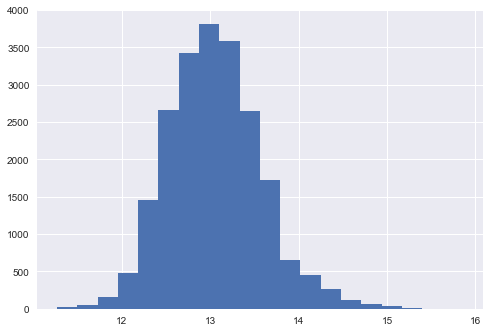

In [116]:
# Drop price values based on Z-score
df_12['price'].hist(bins=20)

In [117]:
high = df_12['price'].mean() + 3*df_12['price'].std()
low = df_12['price'].mean() - 3*df_12['price'].std()

df_12 = df_12[(df_12['price'] < high) & (df_12['price'] > low)]
df_12

bedrooms  bathrm4      price  sqft_living  sqft_lot  zipcode_98002  \
0             3        4  12.309982     7.073270  8.639411              0   
1             3        9  13.195614     7.851661  8.887653              0   
2             2        4  12.100712     6.646391  9.210340              0   
3             4       12  13.311329     7.580700  8.517193              0   
4             3        8  13.142166     7.426549  8.997147              0   
...         ...      ...        ...          ...       ...            ...   
21592         3       10  12.793859     7.333023  7.030857              0   
21593         4       10  12.899220     7.745003  8.667852              0   
21594         2        3  12.904459     6.927558  7.207860              0   
21595         3       10  12.899220     7.377759  7.778211              0   
21596         2        3  12.691580     6.927558  6.981006              0   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  ...  \
0                  0              0              0              0  ...   
1                  0              0              0              0  ...   
2                  0              0              0              0  ...   
3                  0              0              0              0  ...   
4                  0              0              0              0  ...   
...              ...            ...            ...            ...  ...   
21592              0              0              0              0  ...   
21593              0              0              0              0  ...   
21594              0              0              0              0  ...   
21595              0              0              0              0  ...   
21596              0              0              0              0  ...   

       zipcode_98199  condition_1  condition_2  condition_3  condition_4  \
0                  0            0            1            0            0   
1                  0            0            1            0            0   
2                  0            0            1            0            0   
3                  0            0            0            0            1   
4                  0            0            1            0            0   
...              ...          ...          ...          ...          ...   
21592              0            0            1            0            0   
21593              0            0            1            0            0   
21594              0            0            1            0            0   
21595              0            0            1            0            0   
21596              0            0            1            0            0   

       waterfront_1  view_1  view_2  view_3  view_4  
0                 0       0       0       0       0  
1                 0       0       0       0       0  
2                 0       0       0       0       0  
3                 0       0       0       0       0  
4                 0       0       0       0       0  
...             ...     ...     ...     ...     ...  
21592             0       0       0       0       0  
21593             0       0       0       0       0  
21594             0       0       0       0       0  
21595             0       0       0       0       0  
21596             0       0       0       0       0  

[21427 rows x 83 columns]

In [118]:
df_12.describe()

bedrooms       bathrm4         price   sqft_living      sqft_lot  \
count  21427.000000  21427.000000  21427.000000  21427.000000  21427.000000   
mean       3.365893      8.417091     13.037355      7.544924      8.984766   
std        0.898452      2.999840      0.503114      0.416220      0.901767   
min        1.000000      2.000000     11.477298      5.913503      6.253829   
25%        3.000000      6.000000     12.678885      7.258412      8.523672   
50%        3.000000      9.000000     13.017003      7.554859      8.934587   
75%        4.000000     10.000000     13.367660      7.835975      9.266532   
max       11.000000     30.000000     14.626441      8.952864     14.317109   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
count   21427.000000   21427.000000   21427.000000   21427.000000   
mean        0.009241       0.013068       0.013488       0.007841   
std         0.095685       0.113567       0.115353       0.088201   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98006  ...  zipcode_98199   condition_1   condition_2  \
count   21427.000000  ...   21427.000000  21427.000000  21427.000000   
mean        0.022775  ...       0.014654      0.007747      0.649274   
std         0.149189  ...       0.120168      0.087679      0.477208   
min         0.000000  ...       0.000000      0.000000      0.000000   
25%         0.000000  ...       0.000000      0.000000      0.000000   
50%         0.000000  ...       0.000000      0.000000      1.000000   
75%         0.000000  ...       0.000000      0.000000      1.000000   
max         1.000000  ...       1.000000      1.000000      1.000000   

        condition_3   condition_4  waterfront_1        view_1        view_2  \
count  21427.000000  21427.000000  21427.000000  21427.000000  21427.000000   
mean       0.263173      0.078546      0.005087      0.015028      0.043543   
std        0.440366      0.269035      0.071144      0.121666      0.204081   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21427.000000  21427.000000  
mean       0.022962      0.012508  
std        0.149785      0.111138  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 83 columns]

#### Model

In [119]:
#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1105.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:22:44   Log-Likelihood:                 3475.1
No. Observations:               16070   AIC:                            -6784.
Df Residuals:                   15987   BIC:                            -6146.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9244      0.064    108.274

#### Check Assumptions

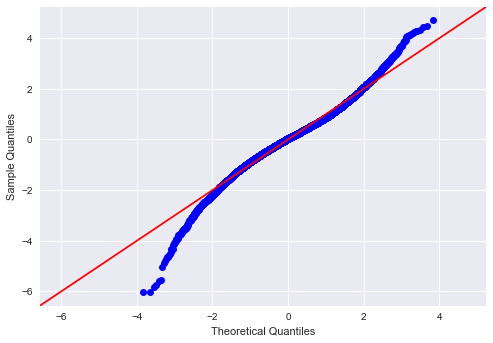

In [120]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

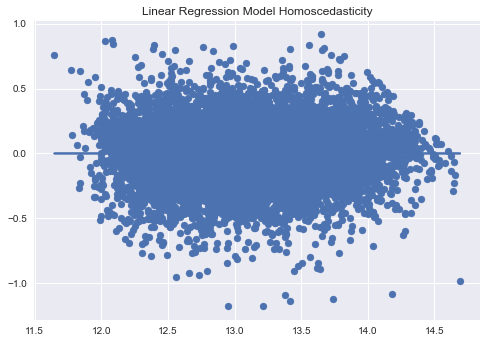

In [121]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [122]:
# Multicollinearity
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('bedrooms', 25.409362768233173),
 ('bathrm4', 20.748825509740865),
 ('sqft_living', 760.1237748300587),
 ('sqft_lot', 184.19969384695523),
 ('zipcode_98002', 1.5276010314137327),
 ('zipcode_98003', 1.747957196428307),
 ('zipcode_98004', 1.7989242426746135),
 ('zipcode_98005', 1.469509996239985),
 ('zipcode_98006', 2.3624738077828926),
 ('zipcode_98007', 1.383591808806272),
 ('zipcode_98008', 1.7504472994215416),
 ('zipcode_98010', 1.280365260642579),
 ('zipcode_98011', 1.5274009129393873),
 ('zipcode_98014', 1.3585817216658385),
 ('zipcode_98019', 1.5202172305461226),
 ('zipcode_98022', 1.6483595554824542),
 ('zipcode_98023', 2.3298365799677505),
 ('zipcode_98024', 1.2382569170221762),
 ('zipcode_98027', 2.1225993242678824),
 ('zipcode_98028', 1.7611506747011687),
 ('zipcode_98029', 1.8815571042754067),
 ('zipcode_98030', 1.683638667369861),
 ('zipcode_98031', 1.7287659589335032),
 ('zipcode_98032', 1.3305240138774828),
 ('zipcode_98033', 2.1459271564649725),
 ('zipcode_98034', 2.441

#### Process again - check for highly correlating vars.

<AxesSubplot:>

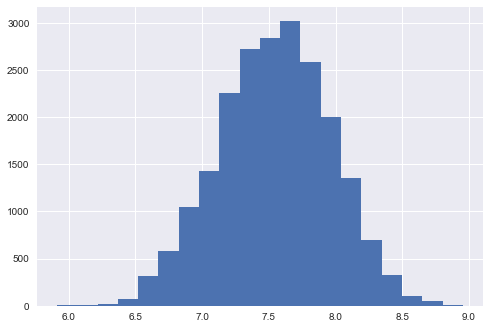

In [123]:
# Consider dropping sqft_living values based on Z-score
df_12['sqft_living'].hist(bins=20)

In [124]:
high = df_12['sqft_living'].mean() + 3*df_12['sqft_living'].std()
low = df_12['sqft_living'].mean() - 3*df_12['sqft_living'].std()

df_12 = df_12[(df_12['sqft_living'] < high) & (df_12['sqft_living'] > low)]
df_12

bedrooms  bathrm4      price  sqft_living  sqft_lot  zipcode_98002  \
0             3        4  12.309982     7.073270  8.639411              0   
1             3        9  13.195614     7.851661  8.887653              0   
2             2        4  12.100712     6.646391  9.210340              0   
3             4       12  13.311329     7.580700  8.517193              0   
4             3        8  13.142166     7.426549  8.997147              0   
...         ...      ...        ...          ...       ...            ...   
21592         3       10  12.793859     7.333023  7.030857              0   
21593         4       10  12.899220     7.745003  8.667852              0   
21594         2        3  12.904459     6.927558  7.207860              0   
21595         3       10  12.899220     7.377759  7.778211              0   
21596         2        3  12.691580     6.927558  6.981006              0   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  ...  \
0                  0              0              0              0  ...   
1                  0              0              0              0  ...   
2                  0              0              0              0  ...   
3                  0              0              0              0  ...   
4                  0              0              0              0  ...   
...              ...            ...            ...            ...  ...   
21592              0              0              0              0  ...   
21593              0              0              0              0  ...   
21594              0              0              0              0  ...   
21595              0              0              0              0  ...   
21596              0              0              0              0  ...   

       zipcode_98199  condition_1  condition_2  condition_3  condition_4  \
0                  0            0            1            0            0   
1                  0            0            1            0            0   
2                  0            0            1            0            0   
3                  0            0            0            0            1   
4                  0            0            1            0            0   
...              ...          ...          ...          ...          ...   
21592              0            0            1            0            0   
21593              0            0            1            0            0   
21594              0            0            1            0            0   
21595              0            0            1            0            0   
21596              0            0            1            0            0   

       waterfront_1  view_1  view_2  view_3  view_4  
0                 0       0       0       0       0  
1                 0       0       0       0       0  
2                 0       0       0       0       0  
3                 0       0       0       0       0  
4                 0       0       0       0       0  
...             ...     ...     ...     ...     ...  
21592             0       0       0       0       0  
21593             0       0       0       0       0  
21594             0       0       0       0       0  
21595             0       0       0       0       0  
21596             0       0       0       0       0  

[21390 rows x 83 columns]

In [125]:
#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1114.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:23:09   Log-Likelihood:                 3530.8
No. Observations:               16042   AIC:                            -6896.
Df Residuals:                   15959   BIC:                            -6258.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9811      0.063    110.724

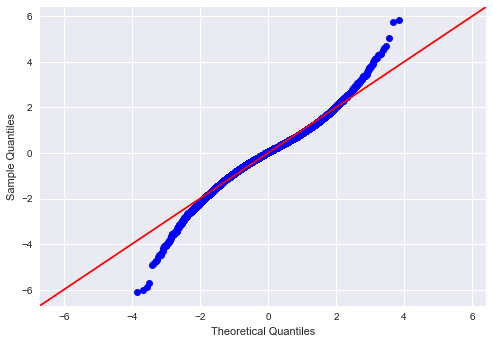

In [126]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

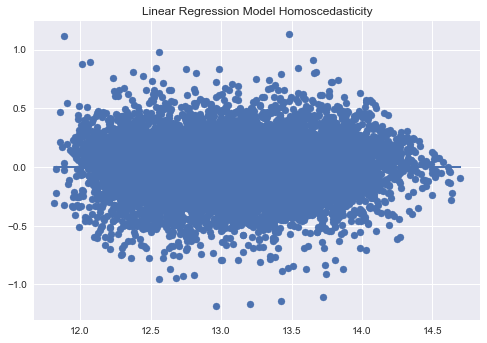

In [127]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [128]:
# Multicollinearity
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('bedrooms', 25.47121696934419),
 ('bathrm4', 20.944194968465123),
 ('sqft_living', 772.3174854315353),
 ('sqft_lot', 185.2063494551749),
 ('zipcode_98002', 1.5283244244824223),
 ('zipcode_98003', 1.7487307867794177),
 ('zipcode_98004', 1.799739332426844),
 ('zipcode_98005', 1.4699489050398433),
 ('zipcode_98006', 2.354736909578948),
 ('zipcode_98007', 1.3840403559609031),
 ('zipcode_98008', 1.7513542616789148),
 ('zipcode_98010', 1.2781933146208857),
 ('zipcode_98011', 1.527935799420748),
 ('zipcode_98014', 1.3535685838195035),
 ('zipcode_98019', 1.5206605655060523),
 ('zipcode_98022', 1.6430085278253206),
 ('zipcode_98023', 2.3311581084074158),
 ('zipcode_98024', 1.2384695390879126),
 ('zipcode_98027', 2.120536163048424),
 ('zipcode_98028', 1.76189464261707),
 ('zipcode_98029', 1.8827491325829515),
 ('zipcode_98030', 1.6844009683448928),
 ('zipcode_98031', 1.7295811532957028),
 ('zipcode_98032', 1.3308964792685611),
 ('zipcode_98033', 2.147103468190713),
 ('zipcode_98034', 2.4429105

#### Check for high correlating features before modeling again

In [129]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_12.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

df_mc[(df_mc.cc>.5) & (df_mc.cc<1)]

cc
pairs                               
(condition_3, condition_2)  0.813469
(sqft_living, bathrm4)      0.752491
(price, sqft_living)        0.656386
(bedrooms, sqft_living)     0.629904
(view_4, waterfront_1)      0.534663
(price, bathrm4)            0.524203
(bathrm4, bedrooms)         0.517714

In [130]:
# Process again - remove some of the highly correlating features.
df_12 = df_12.drop(['condition_3'], axis=1)
df_12 = df_12.drop(['bathrm4'], axis=1)

<AxesSubplot:>

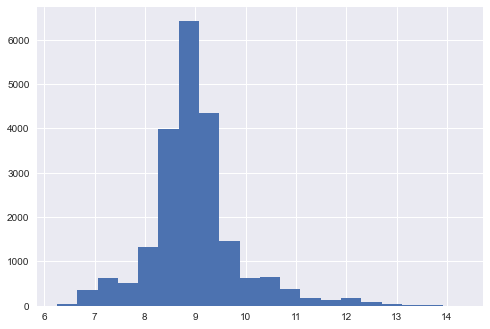

In [131]:
df_12.sqft_lot.hist(bins=20)

In [132]:
high = df_12['sqft_lot'].mean() + 3*df_12['sqft_lot'].std()
low = df_12['sqft_lot'].mean() - 3*df_12['sqft_lot'].std()

df_12 = df_12[(df_12['sqft_lot'] < high) & (df_12['sqft_lot'] > low)]
df_12

bedrooms      price  sqft_living  sqft_lot  zipcode_98002  \
0             3  12.309982     7.073270  8.639411              0   
1             3  13.195614     7.851661  8.887653              0   
2             2  12.100712     6.646391  9.210340              0   
3             4  13.311329     7.580700  8.517193              0   
4             3  13.142166     7.426549  8.997147              0   
...         ...        ...          ...       ...            ...   
21592         3  12.793859     7.333023  7.030857              0   
21593         4  12.899220     7.745003  8.667852              0   
21594         2  12.904459     6.927558  7.207860              0   
21595         3  12.899220     7.377759  7.778211              0   
21596         2  12.691580     6.927558  6.981006              0   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98007  ...  zipcode_98198  zipcode_98199  condition_1  \
0                  0  ...              0              0            0   
1                  0  ...              0              0            0   
2                  0  ...              0              0            0   
3                  0  ...              0              0            0   
4                  0  ...              0              0            0   
...              ...  ...            ...            ...          ...   
21592              0  ...              0              0            0   
21593              0  ...              0              0            0   
21594              0  ...              0              0            0   
21595              0  ...              0              0            0   
21596              0  ...              0              0            0   

       condition_2  condition_4  waterfront_1  view_1  view_2  view_3  view_4  
0                1            0             0       0       0       0       0  
1                1            0             0       0       0       0       0  
2                1            0             0       0       0       0       0  
3                0            1             0       0       0       0       0  
4                1            0             0       0       0       0       0  
...            ...          ...           ...     ...     ...     ...     ...  
21592            1            0             0       0       0       0       0  
21593            1            0             0       0       0       0       0  
21594            1            0             0       0       0       0       0  
21595            1            0             0       0       0       0       0  
21596            1            0             0       0       0       0       0  

[21014 rows x 81 columns]

In [133]:
#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1082.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:23:34   Log-Likelihood:                 3270.0
No. Observations:               15760   AIC:                            -6378.
Df Residuals:                   15679   BIC:                            -5757.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9518      0.043    162.237

#### Check Assumptions

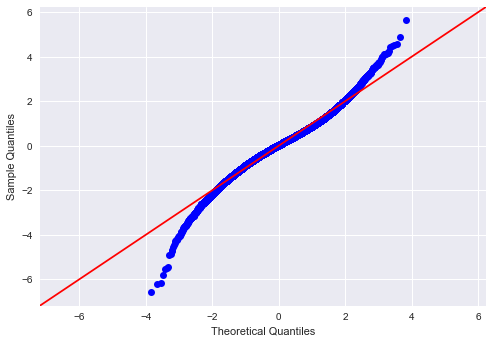

In [134]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

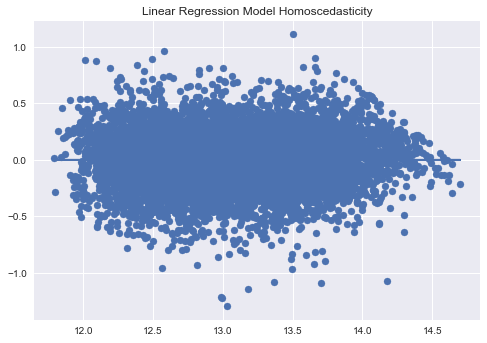

In [135]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [136]:
# Multicollinearity
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('bedrooms', 22.08646335268301),
 ('sqft_living', 311.0528395442197),
 ('sqft_lot', 196.82592494224866),
 ('zipcode_98002', 1.4899922772001144),
 ('zipcode_98003', 1.7181830274544658),
 ('zipcode_98004', 1.791525604638803),
 ('zipcode_98005', 1.4687996129087437),
 ('zipcode_98006', 2.3421550681411984),
 ('zipcode_98007', 1.369994903167899),
 ('zipcode_98008', 1.7125538651818553),
 ('zipcode_98010', 1.2280168398818638),
 ('zipcode_98011', 1.5151974164896211),
 ('zipcode_98014', 1.2512689906052625),
 ('zipcode_98019', 1.4445834275625353),
 ('zipcode_98022', 1.4934749936028053),
 ('zipcode_98023', 2.283124530743532),
 ('zipcode_98024', 1.1504231768096151),
 ('zipcode_98027', 2.043509972519826),
 ('zipcode_98028', 1.7405501404654526),
 ('zipcode_98029', 1.8540162299520462),
 ('zipcode_98030', 1.647768476320698),
 ('zipcode_98031', 1.6957440944959372),
 ('zipcode_98032', 1.3094325993566123),
 ('zipcode_98033', 2.118505720716305),
 ('zipcode_98034', 2.3760085677639653),
 ('zipcode_98038', 2

#### Remove variables with too high of p-value

In [137]:
to_drop = ['zipcode_98002', 'zipcode_98022', 'zipcode_98023',  'zipcode_98032']
for z in to_drop:
       df_12 = df_12.drop([z], axis=1)
df_12.describe()

bedrooms         price   sqft_living      sqft_lot  zipcode_98003  \
count  21014.000000  21014.000000  21014.000000  21014.000000   21014.000000   
mean       3.366898     13.032819      7.540438      8.923464       0.013324   
std        0.895406      0.502044      0.410412      0.784132       0.114663   
min        1.000000     11.477298      6.309918      6.349139       0.000000   
25%        3.000000     12.676076      7.258412      8.517193       0.000000   
50%        3.000000     13.015891      7.549609      8.922658       0.000000   
75%        4.000000     13.361380      7.831121      9.239899       0.000000   
max       11.000000     14.626441      8.789203     11.682525       1.000000   

       zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  \
count   21014.000000   21014.000000   21014.000000    21014.00000   
mean        0.013753       0.007995       0.023080        0.00671   
std         0.116466       0.089057       0.150161        0.08164   
min         0.000000       0.000000       0.000000        0.00000   
25%         0.000000       0.000000       0.000000        0.00000   
50%         0.000000       0.000000       0.000000        0.00000   
75%         0.000000       0.000000       0.000000        0.00000   
max         1.000000       1.000000       1.000000        1.00000   

       zipcode_98008  ...  zipcode_98198  zipcode_98199   condition_1  \
count   21014.000000  ...   21014.000000   21014.000000  21014.000000   
mean        0.013182  ...       0.013182       0.014942      0.007328   
std         0.114055  ...       0.114055       0.121325      0.085294   
min         0.000000  ...       0.000000       0.000000      0.000000   
25%         0.000000  ...       0.000000       0.000000      0.000000   
50%         0.000000  ...       0.000000       0.000000      0.000000   
75%         0.000000  ...       0.000000       0.000000      0.000000   
max         1.000000  ...       1.000000       1.000000      1.000000   

        condition_2   condition_4  waterfront_1        view_1        view_2  \
count  21014.000000  21014.000000  21014.000000  21014.000000  21014.000000   
mean       0.648472      0.079043      0.005044      0.015228      0.042638   
std        0.477459      0.269812      0.070845      0.122461      0.202045   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21014.000000  21014.000000  
mean       0.021795      0.012420  
std        0.146017      0.110755  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 77 columns]

In [138]:
#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1139.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:23:57   Log-Likelihood:                 3267.6
No. Observations:               15760   AIC:                            -6381.
Df Residuals:                   15683   BIC:                            -5791.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9486      0.041    168.295

In [139]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('bedrooms', 21.738571509928605),
 ('sqft_living', 277.94667302554126),
 ('sqft_lot', 194.84371184523712),
 ('zipcode_98003', 1.202832528495519),
 ('zipcode_98004', 1.225250201865626),
 ('zipcode_98005', 1.1333725838181796),
 ('zipcode_98006', 1.3891623270755296),
 ('zipcode_98007', 1.1059998155547108),
 ('zipcode_98008', 1.2038878228050591),
 ('zipcode_98010', 1.066802771062701),
 ('zipcode_98011', 1.148063159033144),
 ('zipcode_98014', 1.0768855080958368),
 ('zipcode_98019', 1.1295425476982592),
 ('zipcode_98024', 1.0473075431130767),
 ('zipcode_98027', 1.2955956558007482),
 ('zipcode_98028', 1.2106028870639267),
 ('zipcode_98029', 1.2605710775219918),
 ('zipcode_98030', 1.1842991834076102),
 ('zipcode_98031', 1.1962999375849297),
 ('zipcode_98033', 1.318140762775116),
 ('zipcode_98034', 1.3898310163502685),
 ('zipcode_98038', 1.423363045664649),
 ('zipcode_98039', 1.0275806321107999),
 ('zipcode_98040', 1.2249750536744535),
 ('zipcode_98042', 1.3914774450101364),
 ('zipcode_98045',

#### Try removing sqft_living

In [140]:
df_12 = df_12.drop(['sqft_living'], axis=1)

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     501.0
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:24:16   Log-Likelihood:                -1874.5
No. Observations:               15760   AIC:                             3901.
Df Residuals:                   15684   BIC:                             4484.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.9051      0.035    315.969

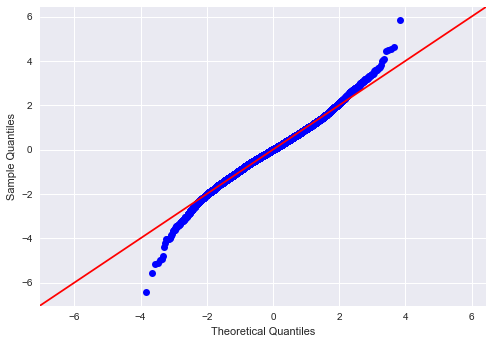

In [141]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

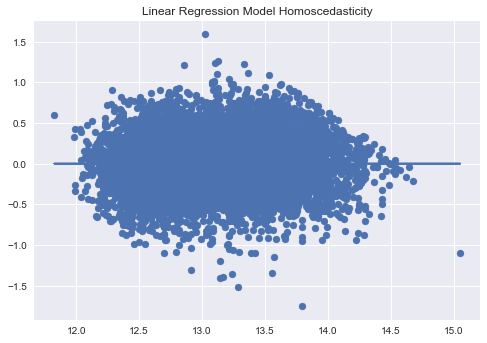

In [142]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [143]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('bedrooms', 16.853020882702758),
 ('sqft_lot', 28.63662051442805),
 ('zipcode_98003', 1.194103334954289),
 ('zipcode_98004', 1.2103131122072992),
 ('zipcode_98005', 1.1295769955510742),
 ('zipcode_98006', 1.36087782662495),
 ('zipcode_98007', 1.0993457513133618),
 ('zipcode_98008', 1.192735340182523),
 ('zipcode_98010', 1.0668026485729445),
 ('zipcode_98011', 1.1387215074742152),
 ('zipcode_98014', 1.0766973992662525),
 ('zipcode_98019', 1.1247651515159955),
 ('zipcode_98024', 1.0463091023239632),
 ('zipcode_98027', 1.2737651735635227),
 ('zipcode_98028', 1.2006316150511989),
 ('zipcode_98029', 1.2078012868750987),
 ('zipcode_98030', 1.173503155184668),
 ('zipcode_98031', 1.1854651570113865),
 ('zipcode_98033', 1.290402796193982),
 ('zipcode_98034', 1.3676700083204172),
 ('zipcode_98038', 1.3898185382890482),
 ('zipcode_98039', 1.0261653235924),
 ('zipcode_98040', 1.2095775966514881),
 ('zipcode_98042', 1.373778199053694),
 ('zipcode_98045', 1.1555898631624832),
 ('zipcode_98052', 1.

In [144]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_12.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

df_mc[(df_mc.cc>.65) & (df_mc.cc<1)]

Empty DataFrame
Columns: [cc]
Index: []

#### Remove sqft_lot and remodel (too high VIF value)

In [145]:
df_12 = df_12.drop(['sqft_lot'], axis=1)

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     464.7
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:24:36   Log-Likelihood:                -2360.9
No. Observations:               15760   AIC:                             4872.
Df Residuals:                   15685   BIC:                             5447.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9227      0.013    931.368

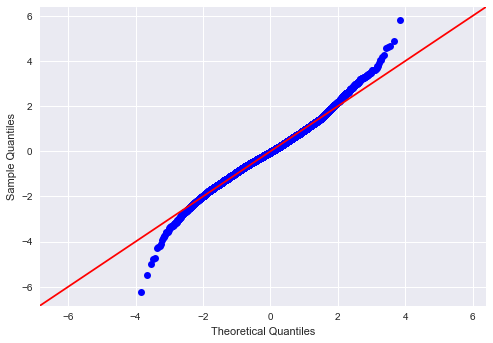

In [146]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

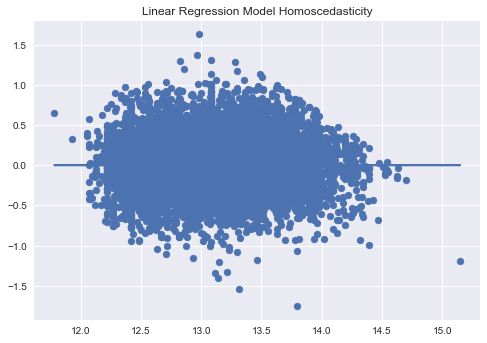

In [147]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [148]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('bedrooms', 8.960517257961367),
 ('zipcode_98003', 1.1103611779568359),
 ('zipcode_98004', 1.1375879869530912),
 ('zipcode_98005', 1.0816056124439248),
 ('zipcode_98006', 1.2427033856508538),
 ('zipcode_98007', 1.0670319988079124),
 ('zipcode_98008', 1.1273630779571304),
 ('zipcode_98010', 1.030680437559704),
 ('zipcode_98011', 1.0912846323350314),
 ('zipcode_98014', 1.0321529033971373),
 ('zipcode_98019', 1.0776932276428615),
 ('zipcode_98024', 1.0211504672043425),
 ('zipcode_98027', 1.1688454183990373),
 ('zipcode_98028', 1.124425644766017),
 ('zipcode_98029', 1.1451125972753475),
 ('zipcode_98030', 1.1096464339662206),
 ('zipcode_98031', 1.112325299366071),
 ('zipcode_98033', 1.1832058351407109),
 ('zipcode_98034', 1.2302305943189746),
 ('zipcode_98038', 1.2549988533410967),
 ('zipcode_98039', 1.0167276725330623),
 ('zipcode_98040', 1.1498417054964691),
 ('zipcode_98042', 1.2160038876788306),
 ('zipcode_98045', 1.080605218282874),
 ('zipcode_98052', 1.2627404675218912),
 ('zipcode

* bedrooms has VIF over 5. 

#### Dropping variables with p-value over .05

In [149]:
zips_drop = ['zipcode_98148', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198']
for z in zips_drop:
       df_12 = df_12.drop([z], axis=1)
df_12.describe()

bedrooms         price  zipcode_98003  zipcode_98004  \
count  21014.000000  21014.000000   21014.000000   21014.000000   
mean       3.366898     13.032819       0.013324       0.013753   
std        0.895406      0.502044       0.114663       0.116466   
min        1.000000     11.477298       0.000000       0.000000   
25%        3.000000     12.676076       0.000000       0.000000   
50%        3.000000     13.015891       0.000000       0.000000   
75%        4.000000     13.361380       0.000000       0.000000   
max       11.000000     14.626441       1.000000       1.000000   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
count   21014.000000   21014.000000    21014.00000   21014.000000   
mean        0.007995       0.023080        0.00671       0.013182   
std         0.089057       0.150161        0.08164       0.114055   
min         0.000000       0.000000        0.00000       0.000000   
25%         0.000000       0.000000        0.00000       0.000000   
50%         0.000000       0.000000        0.00000       0.000000   
75%         0.000000       0.000000        0.00000       0.000000   
max         1.000000       1.000000        1.00000       1.000000   

       zipcode_98010  zipcode_98011  ...  zipcode_98177  zipcode_98199  \
count   21014.000000   21014.000000  ...   21014.000000   21014.000000   
mean        0.003997       0.009232  ...       0.011897       0.014942   
std         0.063099       0.095641  ...       0.108424       0.121325   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

        condition_1   condition_2   condition_4  waterfront_1        view_1  \
count  21014.000000  21014.000000  21014.000000  21014.000000  21014.000000   
mean       0.007328      0.648472      0.079043      0.005044      0.015228   
std        0.085294      0.477459      0.269812      0.070845      0.122461   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_2        view_3        view_4  
count  21014.000000  21014.000000  21014.000000  
mean       0.042638      0.021795      0.012420  
std        0.202045      0.146017      0.110755  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 71 columns]

In [150]:
#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     491.3
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:24:56   Log-Likelihood:                -2362.5
No. Observations:               15760   AIC:                             4867.
Df Residuals:                   15689   BIC:                             5411.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9257      0.012   1017.309

In [151]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('bedrooms', 7.694441803539549),
 ('zipcode_98003', 1.0859948030848248),
 ('zipcode_98004', 1.1084437873942108),
 ('zipcode_98005', 1.0651919332842716),
 ('zipcode_98006', 1.1911766832369088),
 ('zipcode_98007', 1.0536898022565864),
 ('zipcode_98008', 1.1005112180031262),
 ('zipcode_98010', 1.0241313009371116),
 ('zipcode_98011', 1.071491649847393),
 ('zipcode_98014', 1.025133246076467),
 ('zipcode_98019', 1.0611133070669103),
 ('zipcode_98024', 1.0166153961860507),
 ('zipcode_98027', 1.1316624763684313),
 ('zipcode_98028', 1.0968446394043023),
 ('zipcode_98029', 1.1137460506818497),
 ('zipcode_98030', 1.0860935953612947),
 ('zipcode_98031', 1.0886075637271004),
 ('zipcode_98033', 1.1428177877376828),
 ('zipcode_98034', 1.1791092873583329),
 ('zipcode_98038', 1.2001335676960687),
 ('zipcode_98039', 1.0133375380459917),
 ('zipcode_98040', 1.1196680163990358),
 ('zipcode_98042', 1.1697881528528487),
 ('zipcode_98045', 1.0629665466237292),
 ('zipcode_98052', 1.2058565649382773),
 ('zipco

#### Bedrooms has VIF value that is slightly too high. Dropping and remodeling.

In [152]:
df_12 = df_12.drop(['bedrooms'], axis=1)

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     375.6
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:25:14   Log-Likelihood:                -3823.6
No. Observations:               15760   AIC:                             7787.
Df Residuals:                   15690   BIC:                             8324.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4112      0.009   1417.404

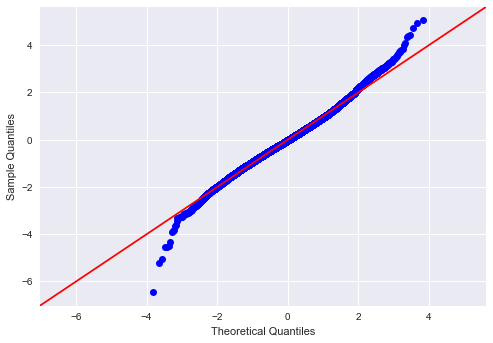

In [153]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

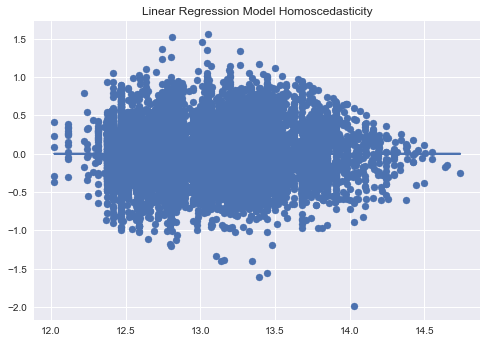

In [154]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

* Looks somewhat heteroscedastic..

In [155]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

[('zipcode_98003', 0.08808718662443656),
 ('zipcode_98004', 0.11667102880925312),
 ('zipcode_98005', 1.0093585322022451),
 ('zipcode_98006', 0.4968491332860877),
 ('zipcode_98007', 1.0068165164345189),
 ('zipcode_98008', 0.07725661581015783),
 ('zipcode_98010', 1.007066025311723),
 ('zipcode_98011', 1.0290235852945562),
 ('zipcode_98014', 1.0123761141944752),
 ('zipcode_98019', 1.0316506960192904),
 ('zipcode_98024', 1.0063422566613622),
 ('zipcode_98027', 0.353096397354476),
 ('zipcode_98028', 0.09893699394946587),
 ('zipcode_98029', 0.20797087583452928),
 ('zipcode_98030', 1.0284746435723153),
 ('zipcode_98031', 0.05657807174846527),
 ('zipcode_98033', 0.4122324699266629),
 ('zipcode_98034', 0.05508439497133113),
 ('zipcode_98038', 0.0862239815899692),
 ('zipcode_98039', 1.003923341534263),
 ('zipcode_98040', 0.03875128728535745),
 ('zipcode_98042', 0.04888740707177309),
 ('zipcode_98045', 1.0308424115387127),
 ('zipcode_98052', 0.11473153430579427),
 ('zipcode_98053', 0.339003121140

In [156]:
# generate predictions
X = sm.add_constant(df_train_x)
ypred = res.predict(X)

z = np.exp(df_train_y['price'])
z1 = np.exp(ypred)

mae = meanabs
mae = mae(z, z1)
mae

126606.43316647105

* MAE is high.
* Further modeling could focus on different set of variables or it could maximize on variables with the highest coefs in this model.

In [157]:
coefs = abs(res.params).sort_values(ascending=True)
coefs

zipcode_98003     0.049116
condition_2       0.056672
zipcode_98168     0.094706
zipcode_98030     0.098090
condition_4       0.104014
                   ...    
zipcode_98112     1.213076
zipcode_98040     1.294088
zipcode_98004     1.439916
zipcode_98039     1.689134
const            12.411186
Length: 70, dtype: float64

In [158]:
# I want to drop lowest few zipcode coefs to see if that improves model at all.
zips_drop = ['zipcode_98003', 'zipcode_98168', 'zipcode_98030']
for z in zips_drop:
       df_12 = df_12.drop([z], axis=1)
df_12.describe()

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     391.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:25:30   Log-Likelihood:                -3844.1
No. Observations:               15760   AIC:                             7822.
Df Residuals:                   15693   BIC:                             8336.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4157      0.008   1592.932

In [159]:
coefs = abs(res.params).sort_values(ascending=True)
coefs

condition_2       0.056181
zipcode_98055     0.102374
condition_4       0.102771
zipcode_98146     0.118618
zipcode_98042     0.125833
                   ...    
zipcode_98112     1.209011
zipcode_98040     1.289824
zipcode_98004     1.435694
zipcode_98039     1.684811
const            12.415711
Length: 67, dtype: float64

In [160]:
# dropping next three lowest zipcode vars with lowest coef values
# model again to seek improved r^2
zips_drop = ['zipcode_98055', 'zipcode_98146', 'zipcode_98042']
for z in zips_drop:
       df_12 = df_12.drop([z], axis=1)
df_12.describe()

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     406.2
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:25:31   Log-Likelihood:                -3886.8
No. Observations:               15760   AIC:                             7902.
Df Residuals:                   15696   BIC:                             8392.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4469      0.007   1769.352

In [161]:
# so... r^2 didn't improve... going to try this strategy once more.
coefs = abs(res.params).sort_values(ascending=True)
coefs

condition_2       0.057026
zipcode_98031     0.103645
condition_4       0.104504
zipcode_98092     0.130842
zipcode_98106     0.144744
                   ...    
zipcode_98112     1.177196
zipcode_98040     1.258706
zipcode_98004     1.404123
zipcode_98039     1.653313
const            12.446934
Length: 64, dtype: float64

In [162]:
# dropping next three lowest zipcode vars with lowest coef values
# model again to seek improved r^2
zips_drop = ['zipcode_98031', 'zipcode_98092', 'zipcode_98106']
for z in zips_drop:
       df_12 = df_12.drop([z], axis=1)
df_12.describe()

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     422.3
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:25:31   Log-Likelihood:                -3936.0
No. Observations:               15760   AIC:                             7994.
Df Residuals:                   15699   BIC:                             8462.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4707      0.007   1885.455

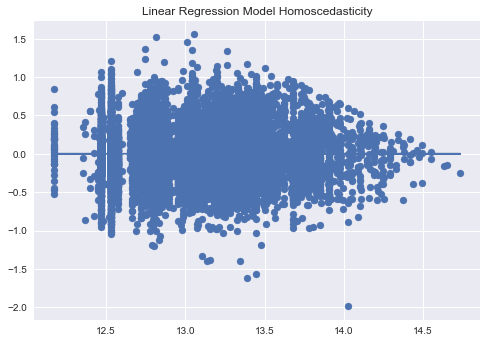

In [163]:
# r-squared went down again.
# checking assumptions to see results
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

* removing more zipcodes (with low absolute coefficient value) results in more heteroscedasticity and lower r^2

### Model 13 - Focus on preprocessing based on z-score an could try without zipcode.

In [164]:
df_13 = df.copy()
df_13.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [165]:
df_13.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [166]:
# suppressing scientific notation for more clear axis ticks
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [167]:
df_13['sqft_lot'].describe()

count     21597.00
mean      15099.41
std       41412.64
min         520.00
25%        5040.00
50%        7618.00
75%       10685.00
max     1651359.00
Name: sqft_lot, dtype: float64

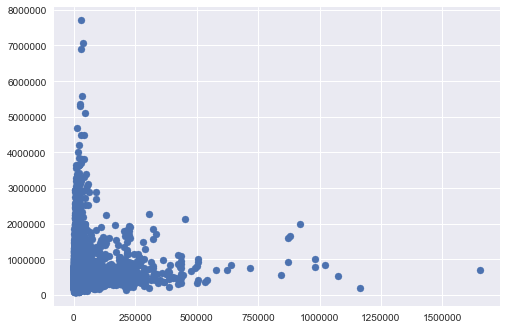

In [168]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(x=df_13['sqft_lot'], y=df_13.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x19d9c877c40>,
 'caps': [<matplotlib.lines.Line2D at 0x19d9c877b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d9c877220>],
 'medians': [<matplotlib.lines.Line2D at 0x19d9a127640>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d9a127670>],
 'means': []}

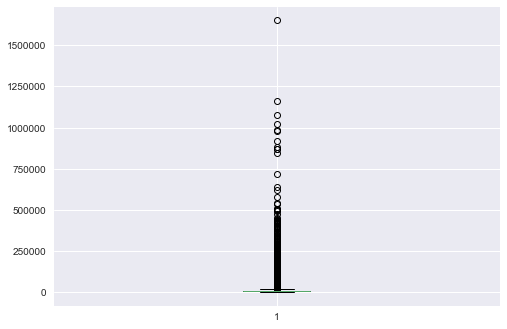

In [169]:
plt.ticklabel_format(useOffset=False, style='plain')     # suppress sci-fi not
plt.boxplot(x=df_13['sqft_lot'])

In [170]:
# apartments should be properties where the sqft_lot - sqft_living = 0
# I'm assuming that sqft_lot counts total sqft on property including a home,
# apartment, or any other structure.
df_13['lot-living sqft'] = df_13.apply(lambda x: x.sqft_lot - x.sqft_living, axis=1)
df_13

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          2      4        1180              0   
1               0     0          2      4        2170            400   
2               0     0          2      3         770              0   
3               0     0          4      4        1050            910   
4               0     0          2      5        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          2      5        1530              0   
21593           0     0          2      5        2310              0   
21594           0     0          2      4        1020              0   
21595           0     0          2      5        1600              0   
21596           0     0          2      4        1020              0   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0          1955          0.00    98178 47.51 -122.26           1340   
1          1951       1991.00    98125 47.72 -122.32           1690   
2          1933          0.00    98028 47.74 -122.23           2720   
3          1965          0.00    98136 47.52 -122.39           1360   
4          1987          0.00    98074 47.62 -122.05           1800   
...         ...           ...      ...   ...     ...            ...   
21592      2009          0.00    98103 47.70 -122.35           1530   
21593      2014          0.00    98146 47.51 -122.36           1830   
21594      2009          0.00    98144 47.59 -122.30           1020   
21595      2004          0.00    98027 47.53 -122.07           1410   
21596      2008          0.00    98144 47.59 -122.30           1020   

       sqft_lot15  lot-living sqft  
0            5650          4470.00  
1            7639          4672.00  
2            8062          9230.00  
3            5000          3040.00  
4            7503          6400.00  
...           ...              ...  
21592        1509          -399.00  
21593        7200          3503.00  
21594        2007           330.00  
21595        1287           788.00  
21596        1357            56.00  

[21597 rows x 20 columns]

In [171]:
df_13['lot-living sqft'].describe()

count     21597.00
mean      13019.09
std       41263.30
min       -1900.00
25%        3095.00
50%        5710.00
75%        8662.00
max     1650059.00
Name: lot-living sqft, dtype: float64

#### Feature Engineering

In [172]:
# Looks like sqft_lot counts area of property besides structures (sqft_living)
# So sqft_lot + sqft_living is probably total sqft
df_13['total_sqft'] = df_13.apply(lambda x: x.sqft_lot + x.sqft_living, axis=1)
df_13 = df_13.drop(['lot-living sqft'], axis=1)
df_13

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          2      4        1180              0   
1               0     0          2      4        2170            400   
2               0     0          2      3         770              0   
3               0     0          4      4        1050            910   
4               0     0          2      5        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          2      5        1530              0   
21593           0     0          2      5        2310              0   
21594           0     0          2      4        1020              0   
21595           0     0          2      5        1600              0   
21596           0     0          2      4        1020              0   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0          1955          0.00    98178 47.51 -122.26           1340   
1          1951       1991.00    98125 47.72 -122.32           1690   
2          1933          0.00    98028 47.74 -122.23           2720   
3          1965          0.00    98136 47.52 -122.39           1360   
4          1987          0.00    98074 47.62 -122.05           1800   
...         ...           ...      ...   ...     ...            ...   
21592      2009          0.00    98103 47.70 -122.35           1530   
21593      2014          0.00    98146 47.51 -122.36           1830   
21594      2009          0.00    98144 47.59 -122.30           1020   
21595      2004          0.00    98027 47.53 -122.07           1410   
21596      2008          0.00    98144 47.59 -122.30           1020   

       sqft_lot15  total_sqft  
0            5650     6830.00  
1            7639     9812.00  
2            8062    10770.00  
3            5000     6960.00  
4            7503     9760.00  
...           ...         ...  
21592        1509     2661.00  
21593        7200     8123.00  
21594        2007     2370.00  
21595        1287     3988.00  
21596        1357     2096.00  

[21597 rows x 20 columns]

In [173]:
df_13.total_sqft.describe()

count     21597.00
mean      17179.73
std       41581.72
min        1423.00
25%        7036.00
50%        9575.00
75%       12995.00
max     1652659.00
Name: total_sqft, dtype: float64

<AxesSubplot:>

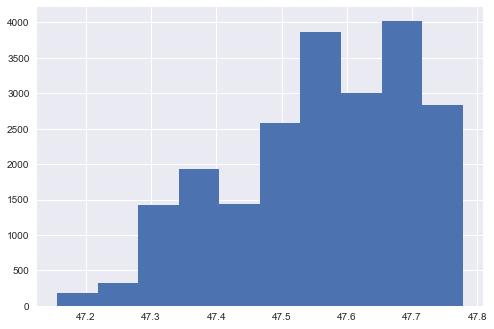

In [174]:
# what about grouping lat & long together and binning or just binning the two?
df_13.lat.hist(bins=10)

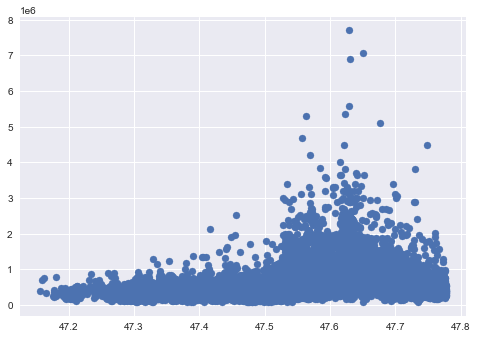

In [175]:
plt.scatter(x=df_13.lat, y=df_13.price)

In [176]:
df_13.lat.describe()

count   21597.00
mean       47.56
std         0.14
min        47.16
25%        47.47
50%        47.57
75%        47.68
max        47.78
Name: lat, dtype: float64

<AxesSubplot:>

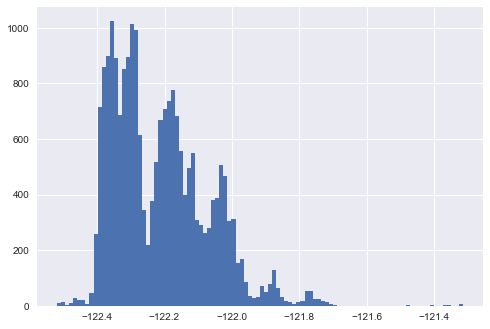

In [177]:
df_13.long.hist(bins=100)

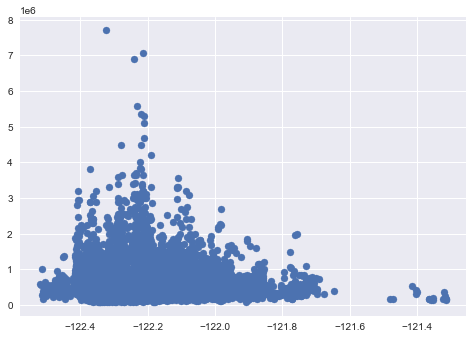

In [178]:
plt.scatter(x=df_13.long, y=df_13.price)

In [179]:
df_13.long.describe()

count   21597.00
mean     -122.21
std         0.14
min      -122.52
25%      -122.33
50%      -122.23
75%      -122.12
max      -121.31
Name: long, dtype: float64

In [180]:
# Looking at yr_built & yr_renovated: seems like newer homes would probably
# sell for more - newer parts means less likely to have major issues - more
# attractive to buyer, etc. 
df_13.yr_built.describe()

count   21597.00
mean     1971.00
std        29.38
min      1900.00
25%      1951.00
50%      1975.00
75%      1997.00
max      2015.00
Name: yr_built, dtype: float64

In [181]:
df_13.yr_renovated.describe()

count   21597.00
mean       68.76
std       364.04
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2015.00
Name: yr_renovated, dtype: float64

After looking through some of the data here: https://blue.kingcounty.com/Assessor/eRealProperty/ it seems like renovations are typically pretty major (i.e. adding a whole floor to the property). I am going to group homes into cats from old-new specifically 1-6 with cats: very old, old, somewhat old, somewhat new, new, and very new.
I am going to create an intermediary column as well that will be year built or renovated. I will then use this year to categorize homes into old - new categories such that each 20 years signifies a new category. For example, 'very old' (this will be 0 in the column) signifies homes built or renovated from 1895 - 1915.

In [182]:
# Create new year (old-new) column with values 0-6

# first, create an intermediary column that takes value of yr_renovated or 
# year_built. Will take yr_renovated if there is a value else yr_built
df_13['year_built_or_renovated'] = df_13.apply(lambda x: x.yr_renovated if (x.yr_renovated != 0.00) else x.yr_built, axis=1)

df_13

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0               0     0          2      4  ...              0      1955   
1               0     0          2      4  ...            400      1951   
2               0     0          2      3  ...              0      1933   
3               0     0          4      4  ...            910      1965   
4               0     0          2      5  ...              0      1987   
...           ...   ...        ...    ...  ...            ...       ...   
21592           0     0          2      5  ...              0      2009   
21593           0     0          2      5  ...              0      2014   
21594           0     0          2      4  ...              0      2009   
21595           0     0          2      5  ...              0      2004   
21596           0     0          2      4  ...              0      2008   

       yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  \
0              0.00    98178 47.51 -122.26           1340        5650   
1           1991.00    98125 47.72 -122.32           1690        7639   
2              0.00    98028 47.74 -122.23           2720        8062   
3              0.00    98136 47.52 -122.39           1360        5000   
4              0.00    98074 47.62 -122.05           1800        7503   
...             ...      ...   ...     ...            ...         ...   
21592          0.00    98103 47.70 -122.35           1530        1509   
21593          0.00    98146 47.51 -122.36           1830        7200   
21594          0.00    98144 47.59 -122.30           1020        2007   
21595          0.00    98027 47.53 -122.07           1410        1287   
21596          0.00    98144 47.59 -122.30           1020        1357   

       total_sqft  year_built_or_renovated  
0         6830.00                  1955.00  
1         9812.00                  1991.00  
2        10770.00                  1933.00  
3         6960.00                  1965.00  
4         9760.00                  1987.00  
...           ...                      ...  
21592     2661.00                  2009.00  
21593     8123.00                  2014.00  
21594     2370.00                  2009.00  
21595     3988.00                  2004.00  
21596     2096.00                  2008.00  

[21597 rows x 21 columns]

In [183]:
df_13.year_built_or_renovated.describe()

count   21597.00
mean     1972.95
std        28.95
min      1900.00
25%      1954.00
50%      1977.00
75%      1999.00
max      2015.00
Name: year_built_or_renovated, dtype: float64

<AxesSubplot:>

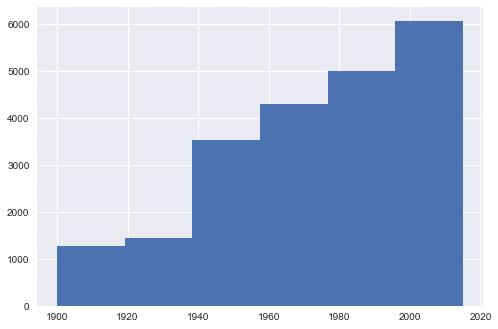

In [184]:
df_13.year_built_or_renovated.hist(bins=6)

#### Feature engineering 2

In [185]:
# This function facillitates with classifying homes as very old - very new
# input: column from dataframe
# output: list of integer values from 0-5
def old_new_classify(col):
    new_col = []
    for x in col:     # loops through each row
        if x < 1915.00:
            new_col.append(0)     # very old
        elif (x < 1935.00 and x > 1914.00):
            new_col.append(1)     # old
        elif (x < 1955.00 and x > 1934.00):
            new_col.append(2)     # somewhat old
        elif (x < 1975.00 and x > 1954.00):
            new_col.append(3)     # somewhat new
        elif (x < 1995.00 and x > 1974.00):
            new_col.append(4)     # new
        else:
            new_col.append(5)     # very new
    return new_col

In [186]:
df_13['old_new'] = old_new_classify(df_13['year_built_or_renovated'])

df_13

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
0               0     0          2      4  ...      1955          0.00   
1               0     0          2      4  ...      1951       1991.00   
2               0     0          2      3  ...      1933          0.00   
3               0     0          4      4  ...      1965          0.00   
4               0     0          2      5  ...      1987          0.00   
...           ...   ...        ...    ...  ...       ...           ...   
21592           0     0          2      5  ...      2009          0.00   
21593           0     0          2      5  ...      2014          0.00   
21594           0     0          2      4  ...      2009          0.00   
21595           0     0          2      5  ...      2004          0.00   
21596           0     0          2      4  ...      2008          0.00   

       zipcode   lat    long  sqft_living15  sqft_lot15  total_sqft  \
0        98178 47.51 -122.26           1340        5650     6830.00   
1        98125 47.72 -122.32           1690        7639     9812.00   
2        98028 47.74 -122.23           2720        8062    10770.00   
3        98136 47.52 -122.39           1360        5000     6960.00   
4        98074 47.62 -122.05           1800        7503     9760.00   
...        ...   ...     ...            ...         ...         ...   
21592    98103 47.70 -122.35           1530        1509     2661.00   
21593    98146 47.51 -122.36           1830        7200     8123.00   
21594    98144 47.59 -122.30           1020        2007     2370.00   
21595    98027 47.53 -122.07           1410        1287     3988.00   
21596    98144 47.59 -122.30           1020        1357     2096.00   

       year_built_or_renovated  old_new  
0                      1955.00        3  
1                      1991.00        4  
2                      1933.00        1  
3                      1965.00        3  
4                      1987.00        4  
...                        ...      ...  
21592                  2009.00        5  
21593                  2014.00        5  
21594                  2009.00        5  
21595                  2004.00        5  
21596                  2008.00        5  

[21597 rows x 22 columns]

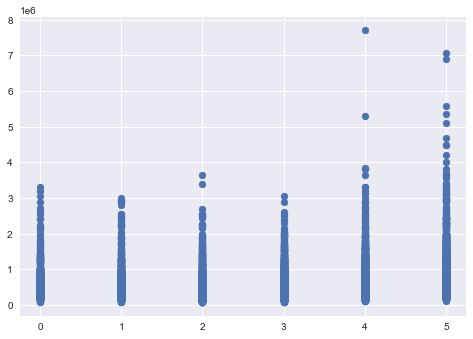

In [187]:
plt.scatter(x=df_13['old_new'], y=df_13.price)

It might be the case that some of the oldest homes might be considered historical and would thus increase the value of the home.

In [188]:
df_13.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_sqft', 'year_built_or_renovated',
       'old_new'],
      dtype='object')

#### Pre-Processing

In [189]:
# dropping some variables that are not needed.
to_drop = ['yr_built', 'yr_renovated', 'lat', 'long', 'year_built_or_renovated']
df_13i = df_13.copy()
for col in to_drop:
    df_13i = df_13i.drop([col], axis=1)
    
df_13i

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
0               0     0          2      4        1180              0    98178   
1               0     0          2      4        2170            400    98125   
2               0     0          2      3         770              0    98028   
3               0     0          4      4        1050            910    98136   
4               0     0          2      5        1680              0    98074   
...           ...   ...        ...    ...         ...            ...      ...   
21592           0     0          2      5        1530              0    98103   
21593           0     0          2      5        2310              0    98146   
21594           0     0          2      4        1020              0    98144   
21595           0     0          2      5        1600              0    98027   
21596           0     0          2      4        1020              0    98144   

       sqft_living15  sqft_lot15  total_sqft  old_new  
0               1340        5650     6830.00        3  
1               1690        7639     9812.00        4  
2               2720        8062    10770.00        1  
3               1360        5000     6960.00        3  
4               1800        7503     9760.00        4  
...              ...         ...         ...      ...  
21592           1530        1509     2661.00        5  
21593           1830        7200     8123.00        5  
21594           1020        2007     2370.00        5  
21595           1410        1287     3988.00        5  
21596           1020        1357     2096.00        5  

[21597 rows x 17 columns]

<AxesSubplot:>

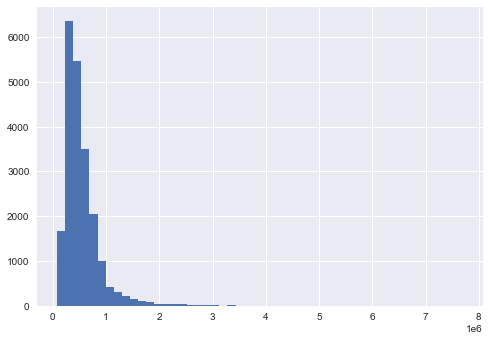

In [190]:
df_13i.price.hist(bins=50)

In [191]:
# remove the outlier of 33 bedrooms
df_13i = df_13i[df_13i['bedrooms'] < 32]

# log-normalize price
price_log = np.log(df_13i['price'])
df_13i = df_13i.drop(['price'], axis=1)
df_13i['price'] = price_log

df_13i.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650    1.00           0     0   
1         3       2.25         2570      7242    2.00           0     0   
2         2       1.00          770     10000    1.00           0     0   
3         4       3.00         1960      5000    1.00           0     0   
4         3       2.00         1680      8080    1.00           0     0   

   condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0          2      4        1180              0    98178           1340   
1          2      4        2170            400    98125           1690   
2          2      3         770              0    98028           2720   
3          4      4        1050            910    98136           1360   
4          2      5        1680              0    98074           1800   

   sqft_lot15  total_sqft  old_new  price  
0        5650     6830.00        3  12.31  
1        7639     9812.00        4  13.20  
2        8062    10770.00        1  12.10  
3        5000     6960.00        3  13.31  
4        7503     9760.00        4  13.14

In [192]:
# drop rows in df based on price z-score - using z-score because of norm distr.
max_price = df_13i.price.mean() + (3*df_13i.price.std())
min_price = df_13i.price.mean() - (3*df_13i.price.std())

df_13i = df_13i[(df_13i.price < max_price) & (df_13i.price > min_price)]
df_13i

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
2             2       1.00          770     10000    1.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
2              2      3         770              0    98028           2720   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
2            8062    10770.00        1  12.10  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[21427 rows x 17 columns]

#### Log-transformations and dummying

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'total_sqft'}>,
        <AxesSubplot:title={'center':'old_new'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

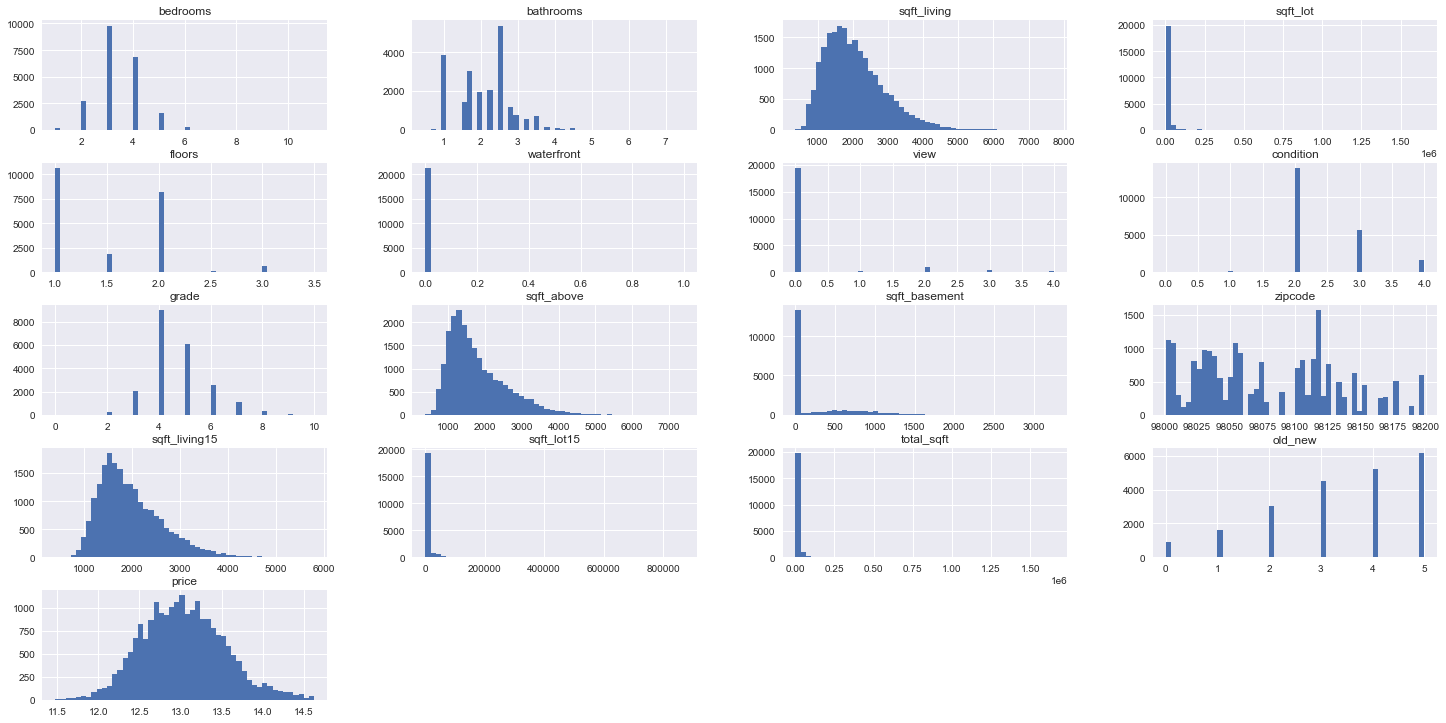

In [193]:
# plot histograms of all the columns in the set.
df_13i.hist(bins=50, figsize=(25, 12.5))

{'whiskers': [<matplotlib.lines.Line2D at 0x19d9ad96160>,
 'caps': [<matplotlib.lines.Line2D at 0x19d9ad96820>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d9ad8adc0>],
 'medians': [<matplotlib.lines.Line2D at 0x19d9ad96ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d9ad9b280>],
 'means': []}

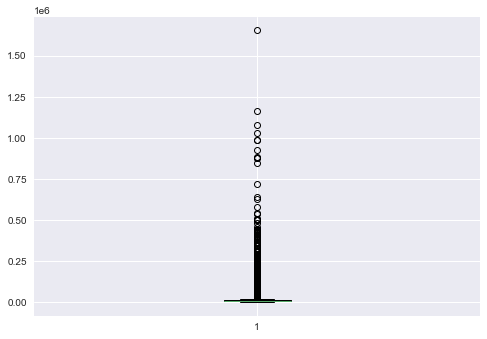

In [194]:
plt.boxplot(df_13i.total_sqft)

In [195]:
df_13i.total_sqft.describe()

count     21427.00
mean      17118.82
std       41670.55
min        1423.00
25%        7020.00
50%        9540.00
75%       12876.00
max     1652659.00
Name: total_sqft, dtype: float64

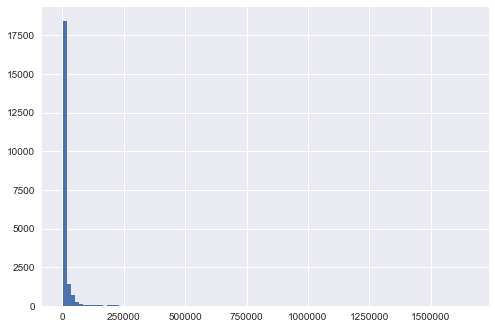

In [196]:
df_13i.total_sqft.hist(bins=100)
plt.ticklabel_format(useOffset=False, style='plain')

In [197]:
# There are some properties with a huge amount of total squarefeet in 
# comparison to others. Going to try dropping these values based off of IQR
q3, q1 = np.percentile(df_13i.total_sqft, [75 ,25])
iqr = q3 - q1

# define and drop outliers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

df_13i = df_13i[(df_13i.total_sqft < upper_bound) & (df_13.total_sqft > lower_bound)]

df_13i

<ipython-input-197-623740490566>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_13i = df_13i[(df_13i.total_sqft < upper_bound) & (df_13.total_sqft > lower_bound)]


bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
2             2       1.00          770     10000    1.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
2              2      3         770              0    98028           2720   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
2            8062    10770.00        1  12.10  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[19059 rows x 17 columns]

Dropped around 2,000 rows

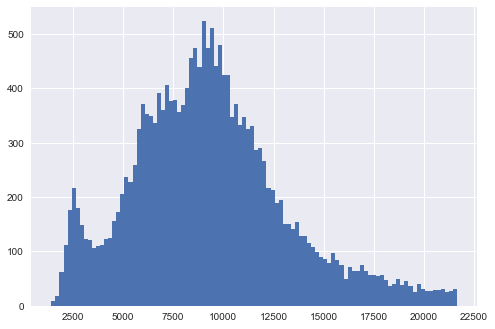

In [198]:
df_13i.total_sqft.hist(bins=100)
plt.ticklabel_format(useOffset=False, style='plain')

<AxesSubplot:xlabel='zipcode', ylabel='price'>

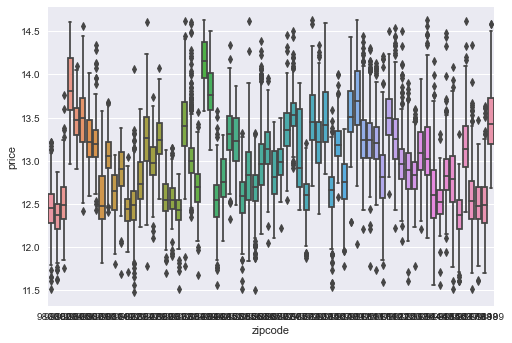

In [199]:
sns.boxplot(x=df_13i.zipcode, y=df_13i.price)

There are outliers for almost every zipcode. I will try to filter these out.

In [200]:
zip_uniques = df_13i.zipcode.unique()

In [201]:
# for each zipcode, I will need to establish upper and lower bounds to then
# filter out outliers.
for zip_c in zip_uniques:
    # create new df with current zipcode
    df_zipcode = pd.DataFrame()
    df_zipcode = df_13i[df_13i.zipcode == int(zip_c)]
    
    # find first and third quartiles
    q3, q1 = np.percentile(df_zipcode.price, [75 ,25])
    
    iqr = q3 - q1

    # define and drop outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    zip_d = int(zip_c)
    
    for row in df_13i.index:
        if df_13i.loc[row, 'zipcode'] == zip_d:
            if (df_13i.loc[row, 'price'] > upper_bound) |  (df_13i.loc[row, 'price'] < lower_bound):
                df_13i = df_13i.drop(labels=row, axis=0)

# df_13i = df_13i[(df_13i.total_sqft < upper_bound) & (df_13.total_sqft > lower_bound)]

df_13i

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
6             3       2.25         1715      6819    2.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
6              2      4        1715              0    98003           2238   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
6            6819     8534.00        5  12.46  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[18639 rows x 17 columns]

<AxesSubplot:xlabel='zipcode', ylabel='price'>

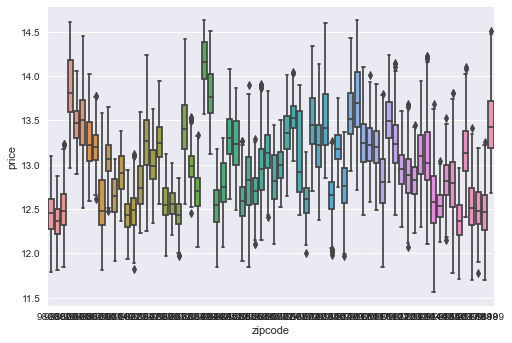

In [202]:
sns.boxplot(x=df_13i.zipcode, y=df_13i.price)

In [203]:
# check counts for each zipcode to make sure there are enough datapoints.
df_13i.zipcode.value_counts(ascending=True)

98039     25
98024     27
98070     33
98077     44
98014     51
        ... 
98118    496
98052    517
98117    542
98115    570
98103    597
Name: zipcode, Length: 70, dtype: int64

<AxesSubplot:xlabel='waterfront', ylabel='price'>

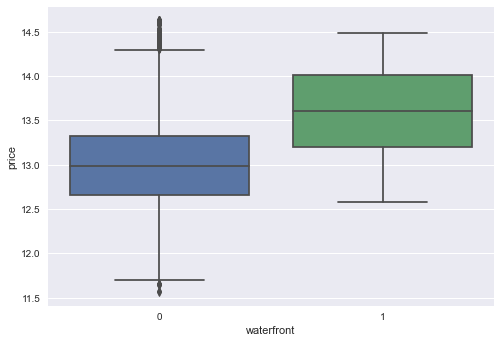

In [204]:
# explore other categorical variables
sns.boxplot(x=df_13i.waterfront, y=df_13i.price)

In [205]:
df_13i = IQR_filter_categorical('waterfront', df_13i)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

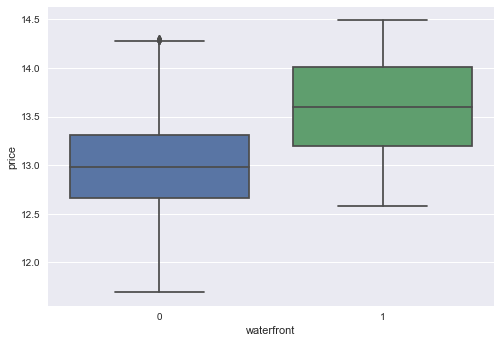

In [206]:
sns.boxplot(x=df_13i.waterfront, y=df_13i.price)

<AxesSubplot:xlabel='view', ylabel='price'>

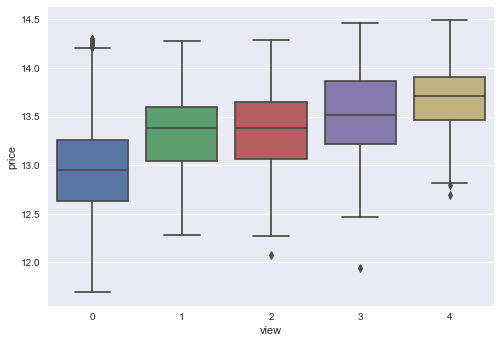

In [207]:
sns.boxplot(x=df_13i.view, y=df_13i.price)

In [208]:
df_13i = IQR_filter_categorical('view', df_13i)

In [209]:
df_13i

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
6             3       2.25         1715      6819    2.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
6              2      4        1715              0    98003           2238   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
6            6819     8534.00        5  12.46  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[18456 rows x 17 columns]

<AxesSubplot:xlabel='view', ylabel='price'>

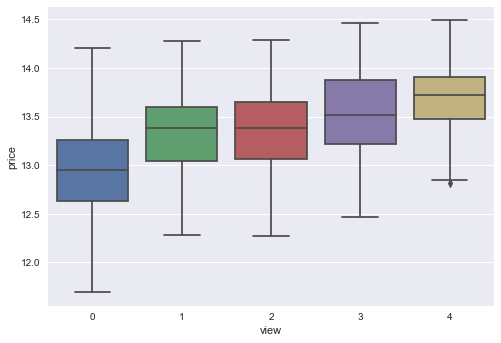

In [210]:
sns.boxplot(x=df_13i.view, y=df_13i.price)

<AxesSubplot:xlabel='condition', ylabel='price'>

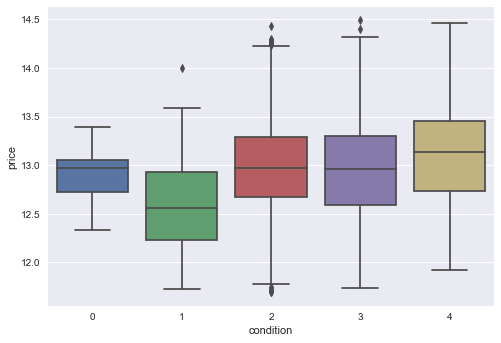

In [211]:
sns.boxplot(x=df_13i.condition, y=df_13i.price)

In [212]:
df_13i = IQR_filter_categorical('condition', df_13i)

In [213]:
df_13i = IQR_filter_categorical('grade', df_13i)

In [214]:
df_13i

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
6             3       2.25         1715      6819    2.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
6              2      4        1715              0    98003           2238   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
6            6819     8534.00        5  12.46  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[18369 rows x 17 columns]

<AxesSubplot:xlabel='old_new', ylabel='price'>

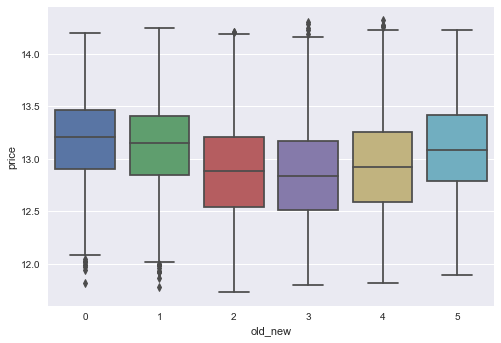

In [215]:
sns.boxplot(x=df_13i.old_new, y=df_13i.price)

In [216]:
df_13i = IQR_filter_categorical('old_new', df_13i)
df_13i

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
6             3       2.25         1715      6819    2.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
6              2      4        1715              0    98003           2238   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
6            6819     8534.00        5  12.46  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[18336 rows x 17 columns]

In [217]:
var_list = ['sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
            'total_sqft', 'sqft_lot', 'sqft_living']
df_13i = var_log_transform(var_list, df_13i)
df_13i.head()

C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


bedrooms  bathrooms  floors  waterfront  view  condition  grade  zipcode  \
0         3       1.00    1.00           0     0          2      4    98178   
1         3       2.25    2.00           0     0          2      4    98125   
3         4       3.00    1.00           0     0          4      4    98136   
4         3       2.00    1.00           0     0          2      5    98074   
6         3       2.25    2.00           0     0          2      4    98003   

   old_new  price  sqft_above  sqft_basement  sqft_living15  sqft_lot15  \
0        3  12.31        7.07           -inf           7.20        8.64   
1        4  13.20        7.68           5.99           7.43        8.94   
3        3  13.31        6.96           6.81           7.22        8.52   
4        4  13.14        7.43           -inf           7.50        8.92   
6        5  12.46        7.45           -inf           7.71        8.83   

   total_sqft  sqft_lot  sqft_living  
0        8.83      8.64         7.07  
1        9.19      8.89         7.85  
3        8.85      8.52         7.58  
4        9.19      9.00         7.43  
6        9.05      8.83         7.45

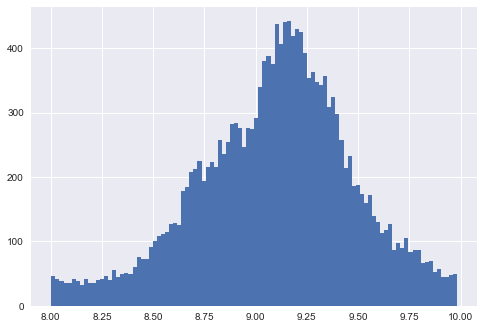

In [225]:
df_13i.total_sqft.hist(bins=100)
plt.ticklabel_format(useOffset=False, style='plain')

{'whiskers': [<matplotlib.lines.Line2D at 0x19da1de3a90>,
 'caps': [<matplotlib.lines.Line2D at 0x19da1df2190>,
 'boxes': [<matplotlib.lines.Line2D at 0x19da1de3730>],
 'medians': [<matplotlib.lines.Line2D at 0x19da1df2820>],
 'fliers': [<matplotlib.lines.Line2D at 0x19da1df2b50>],
 'means': []}

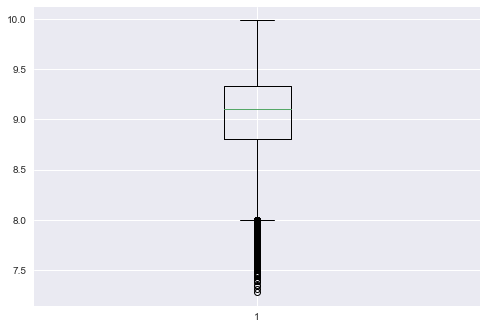

In [219]:
plt.boxplot(df_13i.total_sqft)

In [220]:
df_13i = df_13i.reset_index(drop=True)

In [222]:
# There are some properties with a huge amount of total squarefeet in 
# comparison to others. Going to try dropping these values based off of IQR
q3, q1 = np.percentile(df_13i['total_sqft'], [75, 25])
iqr = q3 - q1

# define and drop outliers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(upper_bound, lower_bound)

df_13i = df_13i[(df_13i['total_sqft'] > lower_bound)]

df_13i

10.130433054512302 8.00276625501398


bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0             3       1.00    1.00           0     0          2      4   
1             3       2.25    2.00           0     0          2      4   
2             4       3.00    1.00           0     0          4      4   
3             3       2.00    1.00           0     0          2      5   
4             3       2.25    2.00           0     0          2      4   
...         ...        ...     ...         ...   ...        ...    ...   
18326         3       2.50    2.00           0     0          2      5   
18328         4       2.50    2.00           0     0          2      6   
18329         4       3.50    2.00           0     0          2      6   
18332         4       2.50    2.00           0     0          2      5   
18334         3       2.50    2.00           0     0          2      5   

       zipcode  old_new  price  sqft_above  sqft_basement  sqft_living15  \
0        98178        3  12.31        7.07           -inf           7.20   
1        98125        4  13.20        7.68           5.99           7.43   
2        98136        3  13.31        6.96           6.81           7.22   
3        98074        4  13.14        7.43           -inf           7.50   
4        98003        5  12.46        7.45           -inf           7.71   
...        ...      ...    ...         ...            ...            ...   
18326    98065        5  13.14        7.73           -inf           7.73   
18328    98056        5  13.32        7.83           -inf           7.83   
18329    98136        5  13.83        7.86           6.81           7.63   
18332    98146        5  12.90        7.75           -inf           7.51   
18334    98027        5  12.90        7.38           -inf           7.25   

       sqft_lot15  total_sqft  sqft_lot  sqft_living  
0            8.64        8.83      8.64         7.07  
1            8.94        9.19      8.89         7.85  
2            8.52        8.85      8.52         7.58  
3            8.92        9.19      9.00         7.43  
4            8.83        9.05      8.83         7.45  
...           ...         ...       ...          ...  
18326        8.65        8.96      8.62         7.73  
18328        8.70        9.05      8.70         7.83  
18329        8.73        9.28      8.88         8.16  
18332        8.88        9.00      8.67         7.75  
18334        7.16        8.29      7.78         7.38  

[17474 rows x 17 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x19da1e37ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x19da21531c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19da1e37760>],
 'medians': [<matplotlib.lines.Line2D at 0x19da2153850>],
 'fliers': [<matplotlib.lines.Line2D at 0x19da2153b80>],
 'means': []}

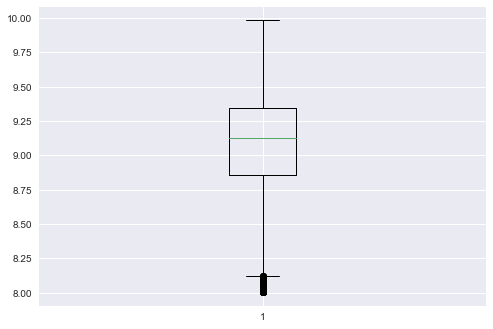

In [223]:
plt.boxplot(df_13i.total_sqft)

In [226]:
# dropping sqft_basement - don't need this anyway because it + sqft_above is
# equal to sqft_living
df_13i = df_13i.drop(['sqft_basement'], axis=1)

KeyError: "['sqft_basement'] not found in axis"

In [229]:
dum_list = ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'old_new']
df_13i = dum_transformation(dum_list, df_13i)

#### Check linearity assumption

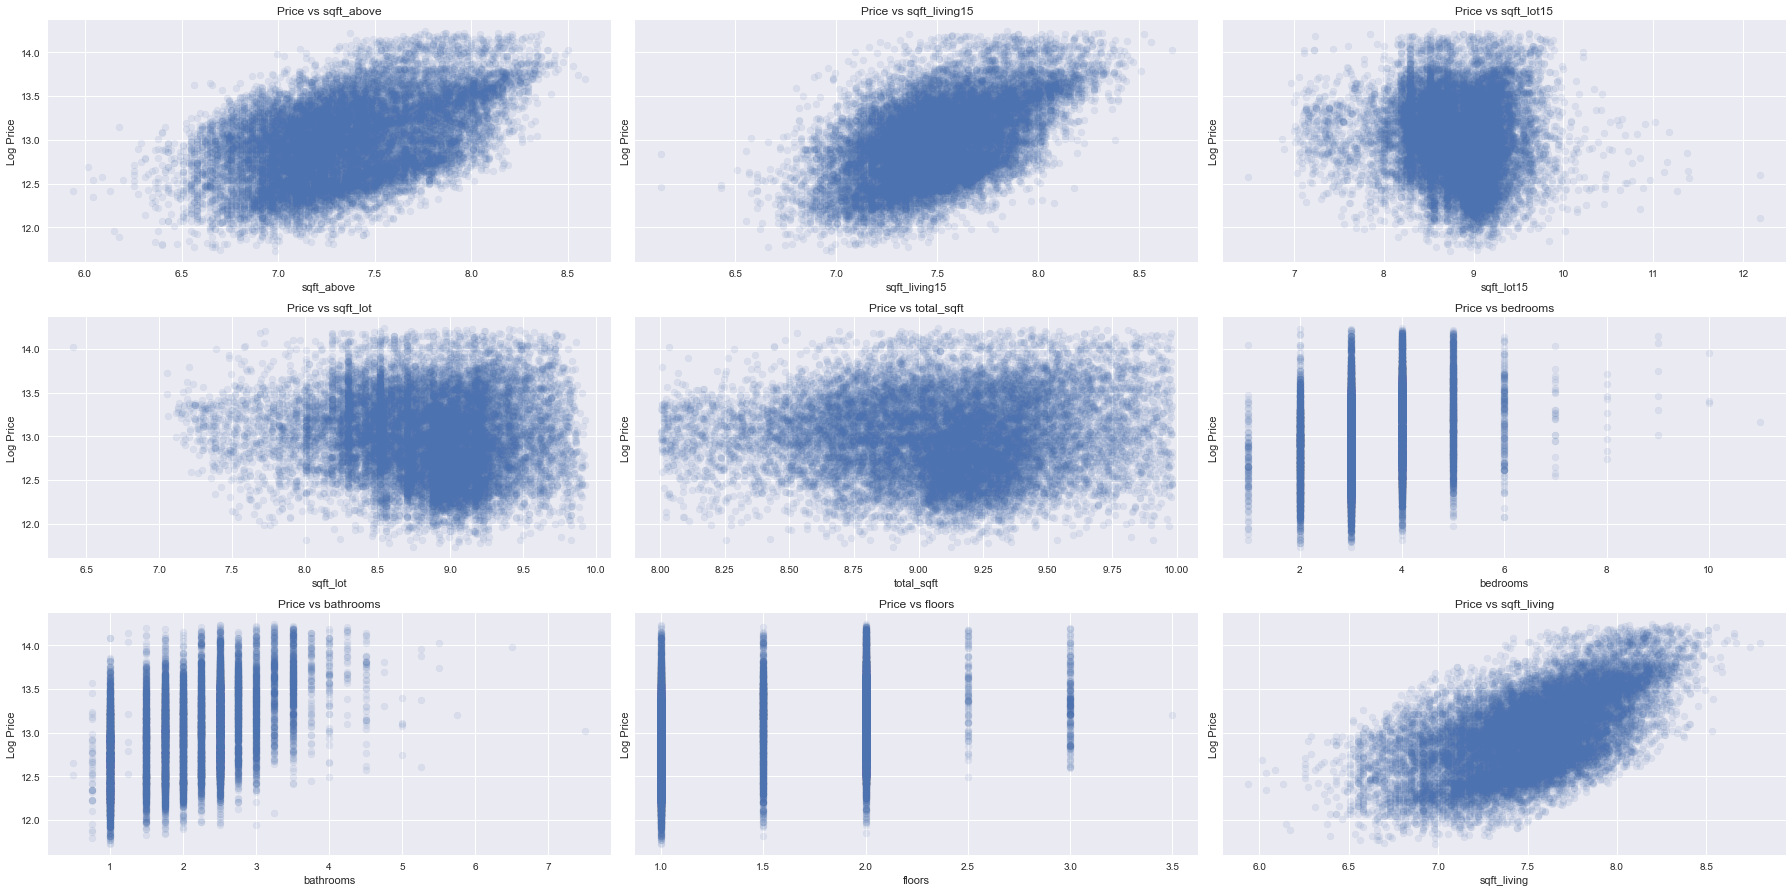

In [230]:
# visualize scatterplots of histograms with price as y variable and numerical
# variables as x variables: 'sqft_above', 'sqft_living15', 
# 'sqft_lot15','total_sqft', bedrooms, bathrooms, floors

numericals = ['sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
              'total_sqft', 'bedrooms', 'bathrooms', 'floors', 'sqft_living']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), numericals):
    ax.scatter(df_13i[column], df_13i['price'], label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Log Price')

fig.tight_layout()

Observations: doesn't really seem like sqft_lot15 or floors are linearly related with price. Floors doesn't either. sqft_lot, bedrooms, and total_sqft may be very roughly linearly related with price.

In [231]:
# safe to remove floors due to lack of linearity
df_13i = df_13i.drop(['floors'], axis=1)

#### Remove very highly correlating features

In [232]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_13i.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

# lower bound of .75 to avoid multicollinearity
df_mc[(df_mc.cc>.75) & (df_mc.cc<1)] 

cc
pairs                          
(total_sqft, sqft_lot)     0.97
(sqft_lot15, sqft_lot)     0.87
(total_sqft, sqft_lot15)   0.84
(sqft_above, sqft_living)  0.83
(condition_3, condition_2) 0.81
(bathrooms, sqft_living)   0.76

Dropping variables with high correlation values

In [233]:
to_drop = ['sqft_lot', 'sqft_lot15', 'sqft_living', 'condition_2']
for var in to_drop:
       df_13i = df_13i.drop([var], axis=1)
df_13i.describe()

bedrooms  bathrooms    price  sqft_above  sqft_living15  total_sqft  \
count  17474.00   17474.00 17474.00    17474.00       17474.00    17474.00   
mean       3.38       2.04    12.99        7.36           7.51        9.09   
std        0.88       0.71     0.46        0.39           0.30        0.38   
min        1.00       0.50    11.73        5.94           6.13        8.00   
25%        3.00       1.50    12.65        7.07           7.30        8.85   
50%        3.00       2.00    12.98        7.33           7.50        9.12   
75%        4.00       2.50    13.32        7.64           7.71        9.34   
max       11.00       7.50    14.24        8.59           8.66        9.98   

       waterfront_1   view_1   view_2   view_3  ...  zipcode_98177  \
count      17474.00 17474.00 17474.00 17474.00  ...       17474.00   
mean           0.00     0.01     0.04     0.02  ...           0.01   
std            0.03     0.12     0.20     0.13  ...           0.11   
min            0.00     0.00     0.00     0.00  ...           0.00   
25%            0.00     0.00     0.00     0.00  ...           0.00   
50%            0.00     0.00     0.00     0.00  ...           0.00   
75%            0.00     0.00     0.00     0.00  ...           0.00   
max            1.00     1.00     1.00     1.00  ...           1.00   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  old_new_1  \
count       17474.00       17474.00       17474.00       17474.00   17474.00   
mean            0.01           0.01           0.01           0.02       0.09   
std             0.12           0.08           0.12           0.12       0.28   
min             0.00           0.00           0.00           0.00       0.00   
25%             0.00           0.00           0.00           0.00       0.00   
50%             0.00           0.00           0.00           0.00       0.00   
75%             0.00           0.00           0.00           0.00       0.00   
max             1.00           1.00           1.00           1.00       1.00   

       old_new_2  old_new_3  old_new_4  old_new_5  
count   17474.00   17474.00   17474.00   17474.00  
mean        0.15       0.23       0.23       0.26  
std         0.36       0.42       0.42       0.44  
min         0.00       0.00       0.00       0.00  
25%         0.00       0.00       0.00       0.00  
50%         0.00       0.00       0.00       0.00  
75%         0.00       0.00       0.00       1.00  
max         1.00       1.00       1.00       1.00  

[8 rows x 97 columns]

#### Model

In [234]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_13i)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     940.0
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:45:49   Log-Likelihood:                 5204.7
No. Observations:               13105   AIC:                        -1.022e+04
Df Residuals:                   13008   BIC:                            -9490.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.6500      0.180     48.101

#### Check assumptions

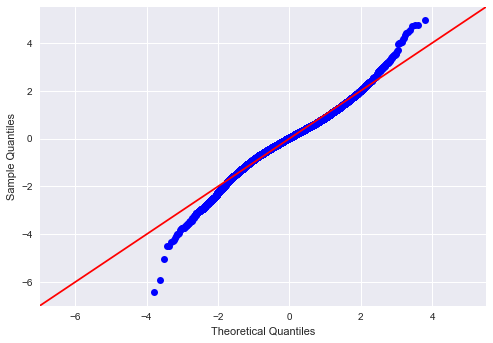

In [235]:
sm_check_resid_normality(res)

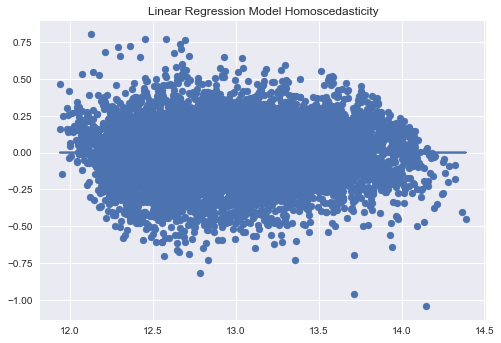

In [236]:
sm_check_scedas(res, df_train_y, X)

In [237]:
multicollinearity_check(df_x)

[('bedrooms', 26.612462481497587),
 ('bathrooms', 25.744219930265736),
 ('sqft_above', 1251.7934810034283),
 ('sqft_living15', 1638.38851371652),
 ('total_sqft', 1285.4264282884265),
 ('waterfront_1', 1.209235746714977),
 ('view_1', 1.06862352511587),
 ('view_2', 1.1440382625205054),
 ('view_3', 1.0983366218386195),
 ('view_4', 1.1745003286181348),
 ('condition_1', 1.0348917322747158),
 ('condition_3', 1.8517279647014595),
 ('condition_4', 1.3582274712921385),
 ('grade_1', 2.6679962413879803),
 ('grade_2', 20.516086307976096),
 ('grade_3', 231.771847675816),
 ('grade_4', 1091.1463958861978),
 ('grade_5', 677.4169134268952),
 ('grade_6', 277.2397271630677),
 ('grade_7', 90.50308009552342),
 ('grade_8', 18.62907653108017),
 ('grade_9', 2.2799675040983858),
 ('zipcode_98002', 1.6531139095208236),
 ('zipcode_98003', 1.8828635131434486),
 ('zipcode_98004', 1.6283964456015172),
 ('zipcode_98005', 1.4339406468361087),
 ('zipcode_98006', 2.506876725210402),
 ('zipcode_98007', 1.475272637436969

#### Post-model feature elimination

In [238]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_13i.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

# Conservative lower bound of .5 to avoid multicollinearity
df_mc[(df_mc.cc>.5) & (df_mc.cc<1)] 

cc
pairs                           
(sqft_above, sqft_living15) 0.68
(sqft_above, bathrooms)     0.68
(grade_4, grade_5)          0.57
(bathrooms, sqft_living15)  0.57
(sqft_living15, price)      0.54
(bedrooms, bathrooms)       0.52
(bedrooms, sqft_above)      0.50
(sqft_above, old_new_5)     0.50

In [239]:
# drop variables that have high correlation with each other
to_drop = ['grade_4', 'sqft_above', 'sqft_living15', 'bedrooms']
for var in to_drop:
       df_13i = df_13i.drop([var], axis=1)
df_13i.describe()

bathrooms    price  total_sqft  waterfront_1   view_1   view_2  \
count   17474.00 17474.00    17474.00      17474.00 17474.00 17474.00   
mean        2.04    12.99        9.09          0.00     0.01     0.04   
std         0.71     0.46        0.38          0.03     0.12     0.20   
min         0.50    11.73        8.00          0.00     0.00     0.00   
25%         1.50    12.65        8.85          0.00     0.00     0.00   
50%         2.00    12.98        9.12          0.00     0.00     0.00   
75%         2.50    13.32        9.34          0.00     0.00     0.00   
max         7.50    14.24        9.98          1.00     1.00     1.00   

        view_3   view_4  condition_1  condition_3  ...  zipcode_98177  \
count 17474.00 17474.00     17474.00     17474.00  ...       17474.00   
mean      0.02     0.01         0.01         0.27  ...           0.01   
std       0.13     0.07         0.08         0.45  ...           0.11   
min       0.00     0.00         0.00         0.00  ...           0.00   
25%       0.00     0.00         0.00         0.00  ...           0.00   
50%       0.00     0.00         0.00         0.00  ...           0.00   
75%       0.00     0.00         0.00         1.00  ...           0.00   
max       1.00     1.00         1.00         1.00  ...           1.00   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  old_new_1  \
count       17474.00       17474.00       17474.00       17474.00   17474.00   
mean            0.01           0.01           0.01           0.02       0.09   
std             0.12           0.08           0.12           0.12       0.28   
min             0.00           0.00           0.00           0.00       0.00   
25%             0.00           0.00           0.00           0.00       0.00   
50%             0.00           0.00           0.00           0.00       0.00   
75%             0.00           0.00           0.00           0.00       0.00   
max             1.00           1.00           1.00           1.00       1.00   

       old_new_2  old_new_3  old_new_4  old_new_5  
count   17474.00   17474.00   17474.00   17474.00  
mean        0.15       0.23       0.23       0.26  
std         0.36       0.42       0.42       0.44  
min         0.00       0.00       0.00       0.00  
25%         0.00       0.00       0.00       0.00  
50%         0.00       0.00       0.00       0.00  
75%         0.00       0.00       0.00       1.00  
max         1.00       1.00       1.00       1.00  

[8 rows x 93 columns]

#### Model

In [240]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_13i)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:47:18   Log-Likelihood:                 4389.7
No. Observations:               13105   AIC:                            -8593.
Df Residuals:                   13012   BIC:                            -7898.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.4039      0.055    190.762

In [241]:
multicollinearity_check(df_x)

[('bathrooms', 19.971407996009848),
 ('total_sqft', 93.48933233836199),
 ('waterfront_1', 1.2085205662014047),
 ('view_1', 1.0575698029192022),
 ('view_2', 1.1221463173507435),
 ('view_3', 1.0835942239181875),
 ('view_4', 1.1671154864387503),
 ('condition_1', 1.0346422427066555),
 ('condition_3', 1.8473153205950694),
 ('condition_4', 1.3521363869440952),
 ('grade_1', 1.0229940664847328),
 ('grade_2', 1.0883781365127903),
 ('grade_3', 1.5008036586405042),
 ('grade_5', 2.0799147719273012),
 ('grade_6', 1.7868497528690097),
 ('grade_7', 1.4434194592445602),
 ('grade_8', 1.1284678846955682),
 ('grade_9', 1.0298640820715612),
 ('zipcode_98002', 1.5966390728173792),
 ('zipcode_98003', 1.8320753651483799),
 ('zipcode_98004', 1.5898035854797894),
 ('zipcode_98005', 1.4107688950074533),
 ('zipcode_98006', 2.41919292424471),
 ('zipcode_98007', 1.4376814808664753),
 ('zipcode_98008', 1.830339495655911),
 ('zipcode_98010', 1.1768508715735735),
 ('zipcode_98011', 1.5832322207543639),
 ('zipcode_980

#### Post-model feature elim.

In [242]:
# total sqft has the highest mc score... going to drop this
df_13i = df_13i.drop(['total_sqft'], axis=1)
df_13i

bathrooms  price  waterfront_1  view_1  view_2  view_3  view_4  \
0           1.00  12.31             0       0       0       0       0   
1           2.25  13.20             0       0       0       0       0   
2           3.00  13.31             0       0       0       0       0   
3           2.00  13.14             0       0       0       0       0   
4           2.25  12.46             0       0       0       0       0   
...          ...    ...           ...     ...     ...     ...     ...   
18326       2.50  13.14             0       0       0       0       0   
18328       2.50  13.32             0       0       0       0       0   
18329       3.50  13.83             0       0       0       0       0   
18332       2.50  12.90             0       0       0       0       0   
18334       2.50  12.90             0       0       0       0       0   

       condition_1  condition_3  condition_4  ...  zipcode_98177  \
0                0            0            0  ...              0   
1                0            0            0  ...              0   
2                0            0            1  ...              0   
3                0            0            0  ...              0   
4                0            0            0  ...              0   
...            ...          ...          ...  ...            ...   
18326            0            0            0  ...              0   
18328            0            0            0  ...              0   
18329            0            0            0  ...              0   
18332            0            0            0  ...              0   
18334            0            0            0  ...              0   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  old_new_1  \
0                  1              0              0              0          0   
1                  0              0              0              0          0   
2                  0              0              0              0          0   
3                  0              0              0              0          0   
4                  0              0              0              0          0   
...              ...            ...            ...            ...        ...   
18326              0              0              0              0          0   
18328              0              0              0              0          0   
18329              0              0              0              0          0   
18332              0              0              0              0          0   
18334              0              0              0              0          0   

       old_new_2  old_new_3  old_new_4  old_new_5  
0              0          1          0          0  
1              0          0          1          0  
2              0          1          0          0  
3              0          0          1          0  
4              0          0          0          1  
...          ...        ...        ...        ...  
18326          0          0          0          1  
18328          0          0          0          1  
18329          0          0          0          1  
18332          0          0          0          1  
18334          0          0          0          1  

[17474 rows x 92 columns]

#### Model

In [243]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_13i)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     772.4
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:49:18   Log-Likelihood:                 3795.4
No. Observations:               13105   AIC:                            -7407.
Df Residuals:                   13013   BIC:                            -6719.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.2435      0.016    763.436

In [244]:
multicollinearity_check(df_x)

[('bathrooms', 17.85953661474775),
 ('waterfront_1', 1.2084331752431674),
 ('view_1', 1.0575171354995316),
 ('view_2', 1.1221275280720784),
 ('view_3', 1.0835181008857733),
 ('view_4', 1.1667667297685063),
 ('condition_1', 1.0325908551081846),
 ('condition_3', 1.819440009998665),
 ('condition_4', 1.3459167380400776),
 ('grade_1', 1.0225833629270105),
 ('grade_2', 1.082671901049752),
 ('grade_3', 1.4624445385748048),
 ('grade_5', 2.077752973883933),
 ('grade_6', 1.786579733440846),
 ('grade_7', 1.4429598125236285),
 ('grade_8', 1.128402480046034),
 ('grade_9', 1.0298301246630084),
 ('zipcode_98002', 1.282672831262719),
 ('zipcode_98003', 1.3815917028231521),
 ('zipcode_98004', 1.272392760694329),
 ('zipcode_98005', 1.2126774803546816),
 ('zipcode_98006', 1.717439910050921),
 ('zipcode_98007', 1.2179760690029175),
 ('zipcode_98008', 1.4264146386912617),
 ('zipcode_98010', 1.0810765710976424),
 ('zipcode_98011', 1.2699704137509025),
 ('zipcode_98014', 1.0755555473509342),
 ('zipcode_98019

#### Post-model feature selection

In [245]:
# Drop sqft_above, sqft_living15
to_drop = ['bathrooms']
for var in to_drop:
       df_13i = df_13i.drop([var], axis=1)
df_13i.describe()

price  waterfront_1   view_1   view_2   view_3   view_4  condition_1  \
count 17474.00      17474.00 17474.00 17474.00 17474.00 17474.00     17474.00   
mean     12.99          0.00     0.01     0.04     0.02     0.01         0.01   
std       0.46          0.03     0.12     0.20     0.13     0.07         0.08   
min      11.73          0.00     0.00     0.00     0.00     0.00         0.00   
25%      12.65          0.00     0.00     0.00     0.00     0.00         0.00   
50%      12.98          0.00     0.00     0.00     0.00     0.00         0.00   
75%      13.32          0.00     0.00     0.00     0.00     0.00         0.00   
max      14.24          1.00     1.00     1.00     1.00     1.00         1.00   

       condition_3  condition_4  grade_1  ...  zipcode_98177  zipcode_98178  \
count     17474.00     17474.00 17474.00  ...       17474.00       17474.00   
mean          0.27         0.08     0.00  ...           0.01           0.01   
std           0.45         0.28     0.03  ...           0.11           0.12   
min           0.00         0.00     0.00  ...           0.00           0.00   
25%           0.00         0.00     0.00  ...           0.00           0.00   
50%           0.00         0.00     0.00  ...           0.00           0.00   
75%           1.00         0.00     0.00  ...           0.00           0.00   
max           1.00         1.00     1.00  ...           1.00           1.00   

       zipcode_98188  zipcode_98198  zipcode_98199  old_new_1  old_new_2  \
count       17474.00       17474.00       17474.00   17474.00   17474.00   
mean            0.01           0.01           0.02       0.09       0.15   
std             0.08           0.12           0.12       0.28       0.36   
min             0.00           0.00           0.00       0.00       0.00   
25%             0.00           0.00           0.00       0.00       0.00   
50%             0.00           0.00           0.00       0.00       0.00   
75%             0.00           0.00           0.00       0.00       0.00   
max             1.00           1.00           1.00       1.00       1.00   

       old_new_3  old_new_4  old_new_5  
count   17474.00   17474.00   17474.00  
mean        0.23       0.23       0.26  
std         0.42       0.42       0.44  
min         0.00       0.00       0.00  
25%         0.00       0.00       0.00  
50%         0.00       0.00       0.00  
75%         0.00       0.00       1.00  
max         1.00       1.00       1.00  

[8 rows x 91 columns]

#### Model

In [246]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_13i)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     685.2
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:51:36   Log-Likelihood:                 3079.8
No. Observations:               13105   AIC:                            -5978.
Df Residuals:                   13014   BIC:                            -5297.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4249      0.016    767.024

In [247]:
multicollinearity_check(df_x)

[('waterfront_1', 1.2077165569736557),
 ('view_1', 1.055686891920714),
 ('view_2', 0.3098005244136664),
 ('view_3', 0.14610179844220683),
 ('view_4', 1.1657745580386816),
 ('condition_1', 1.032498515077283),
 ('condition_3', 0.05947984825112283),
 ('condition_4', 0.16989916117052034),
 ('grade_1', 1.0219453323621157),
 ('grade_2', 1.080839674958182),
 ('grade_3', 0.1893164892451629),
 ('grade_5', 0.09247274465310187),
 ('grade_6', 0.09126160086432551),
 ('grade_7', 0.1940047807762267),
 ('grade_8', 1.1064903247494569),
 ('grade_9', 1.0279679126316659),
 ('zipcode_98002', 1.240048556941388),
 ('zipcode_98003', 0.010346979250506361),
 ('zipcode_98004', 1.2304097688819728),
 ('zipcode_98005', 1.1830742065880973),
 ('zipcode_98006', 0.6128062954398626),
 ('zipcode_98007', 1.190690168834267),
 ('zipcode_98008', 1.368419605430337),
 ('zipcode_98010', 1.074914937886522),
 ('zipcode_98011', 1.2292522727363093),
 ('zipcode_98014', 1.0702282537272116),
 ('zipcode_98019', 1.179272364604905),
 ('z

In [248]:
# drop variables that have too high of p-value
to_drop = ['zipcode_98002', 'zipcode_98003', 'zipcode_98022', 'zipcode_98023',
          'zipcode_98032', 'zipcode_98092', 'old_new_1']
for var in to_drop:
       df_13i = df_13i.drop([var], axis=1)
df_13i.describe()

price  waterfront_1   view_1   view_2   view_3   view_4  condition_1  \
count 17474.00      17474.00 17474.00 17474.00 17474.00 17474.00     17474.00   
mean     12.99          0.00     0.01     0.04     0.02     0.01         0.01   
std       0.46          0.03     0.12     0.20     0.13     0.07         0.08   
min      11.73          0.00     0.00     0.00     0.00     0.00         0.00   
25%      12.65          0.00     0.00     0.00     0.00     0.00         0.00   
50%      12.98          0.00     0.00     0.00     0.00     0.00         0.00   
75%      13.32          0.00     0.00     0.00     0.00     0.00         0.00   
max      14.24          1.00     1.00     1.00     1.00     1.00         1.00   

       condition_3  condition_4  grade_1  ...  zipcode_98168  zipcode_98177  \
count     17474.00     17474.00 17474.00  ...       17474.00       17474.00   
mean          0.27         0.08     0.00  ...           0.01           0.01   
std           0.45         0.28     0.03  ...           0.11           0.11   
min           0.00         0.00     0.00  ...           0.00           0.00   
25%           0.00         0.00     0.00  ...           0.00           0.00   
50%           0.00         0.00     0.00  ...           0.00           0.00   
75%           1.00         0.00     0.00  ...           0.00           0.00   
max           1.00         1.00     1.00  ...           1.00           1.00   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  old_new_2  \
count       17474.00       17474.00       17474.00       17474.00   17474.00   
mean            0.01           0.01           0.01           0.02       0.15   
std             0.12           0.08           0.12           0.12       0.36   
min             0.00           0.00           0.00           0.00       0.00   
25%             0.00           0.00           0.00           0.00       0.00   
50%             0.00           0.00           0.00           0.00       0.00   
75%             0.00           0.00           0.00           0.00       0.00   
max             1.00           1.00           1.00           1.00       1.00   

       old_new_3  old_new_4  old_new_5  
count   17474.00   17474.00   17474.00  
mean        0.23       0.23       0.26  
std         0.42       0.42       0.44  
min         0.00       0.00       0.00  
25%         0.00       0.00       0.00  
50%         0.00       0.00       0.00  
75%         0.00       0.00       1.00  
max         1.00       1.00       1.00  

[8 rows x 84 columns]

In [249]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_13i)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     743.2
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:55:44   Log-Likelihood:                 3077.9
No. Observations:               13105   AIC:                            -5988.
Df Residuals:                   13021   BIC:                            -5359.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4206      0.009   1360.051

In [250]:
multicollinearity_check(df_x)

[('waterfront_1', 1.2076527372596668),
 ('view_1', 1.0552348023255842),
 ('view_2', 0.3091365976511115),
 ('view_3', 0.14589106666789603),
 ('view_4', 1.165171855965905),
 ('condition_1', 1.0295348819033991),
 ('condition_3', 0.0548677447120394),
 ('condition_4', 0.16257165886603178),
 ('grade_1', 1.0214171745706382),
 ('grade_2', 1.0655712696234112),
 ('grade_3', 0.17948938597902256),
 ('grade_5', 0.09106157734444634),
 ('grade_6', 0.09071487924630064),
 ('grade_7', 0.19363674148156326),
 ('grade_8', 1.1059629090418892),
 ('grade_9', 1.0277636202781875),
 ('zipcode_98004', 1.0824904575476815),
 ('zipcode_98005', 1.0714707090368543),
 ('zipcode_98006', 0.46853067760116324),
 ('zipcode_98007', 1.0670693765022221),
 ('zipcode_98008', 1.1376122095577437),
 ('zipcode_98010', 1.0302381595429677),
 ('zipcode_98011', 1.0706049592508753),
 ('zipcode_98014', 1.027768416034663),
 ('zipcode_98019', 1.0630451140483343),
 ('zipcode_98024', 1.0130149894671623),
 ('zipcode_98027', 1.110401766212187),

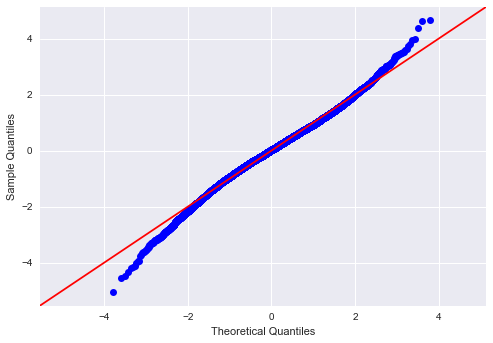

In [251]:
sm_check_resid_normality(res)

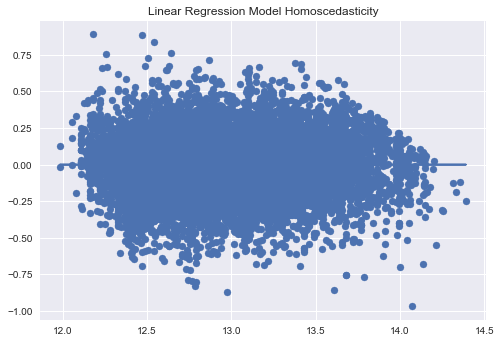

In [252]:
sm_check_scedas(res, df_train_y, X)

In [253]:
X = sm.add_constant(df_train_x)

# generate predictions
ypred = res.predict(X)

z = np.exp(df_train_y['price'])
z1 = np.exp(ypred)

mae = meanabs
mae = mae(z, z1)
mae

71259.2037686064

#### Post-model manipulation

#### Model

In [ ]:
#### Sale TYPE may be interesting to look at as well. For instance, whether the 
# sale was completed via a corporate entity or an individual.
# One reason why this might be significant is that a corporate entity will 
# typically be looking to profit as much as possible from the deal and will
# have expertise. An individual might take a lower offer for various reasons:
# lack of expertise, incentive to sell the property quickly (i.e. already moved
# into a new house), or they could have even sold at discount to a family member.

In [ ]:
# Note that there are also accessory buildings that might be located on a 
# property, which may boost value and squarefootage of buildings. For ex,
# there could be a barn on a property, which would boost value.

## Interpretation of Model

### Finding 1: R-squared value

Model 3 has an r-squared value of about 78%, which means that is able to explain about 78% of the variance of the actual data points from the predicted values represented by the model.
Below is a visualization of the model versus the actual values. Keep in mind that the actual values were log-normalized, so the error represented by the difference between actual vs. predicted values is extrapolated to a much larger degree than, say, the first model's visual representation of error.

In [ ]:
# visualize the error in model 3
X = df2.drop(['price'], axis=1)
y = df2['price']
lin_model(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
y_hat = lr.predict(X_train)

plt.figure(figsize=(12, 8))

ax = sns.distplot(df2['price'], hist=False, color="b", 
                  label="Actual (Log) Prices")
sns.distplot(y_hat, hist=False, color="y", label="Predicted (Log) Values" ,
             ax=ax)


plt.title('Actual vs Predicted Values for Home Prices')
plt.xlabel('Log Price')
plt.ylabel('Density')

plt.legend()
plt.show()
plt.close()

As seen by this visualization and the r-squared value, the model is not perfect. However, it does at least offer a very good starting point for ruling out homes or further investigating homes to build or buy. It can also offer a way in which the stakeholder can understand whether a particular home may be under or overvalued.

### Finding 2: Most significant model coefficients

In [ ]:
# create df with coefficient names and values

# re-establish linear regression model to extract relevant info
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
lr.fit(X_train, y_train)

# define names and values of the coefficients
co_names = X_train.columns   # X_train columns - labels with log-transform
co_values = lr.coef_

# create df with these variables
df_coefs = pd.DataFrame(list(zip(co_names, co_values)), 
                        columns=['Coefficients', 'Values'])

# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.7f' % x)

# change values in 'Values' to absolute - we care about the magnitude
df_coefs['Values'] = df_coefs['Values'].abs() 

df_coefs.sort_values(by='Values', ascending=False)     # highest values at top

The most significant coefficients are lat, waterfront, and sqft_above. 
Further investigation of why these coefficients are the most significant is offered below.

#####  Latitude

In [ ]:
# ceate QQ-plot of lat to investigate linearity
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(df2['lat'], dist=stats.norm, line='45', fit=True)

Latitude is roughly linear and when plotted against price, it has a somewhat trimodal distribution with the first bell curve seeming about half the size as the other two (as seen in 4.1). 
Interpretation of lat characteristics:
* Rough linearity facilitates greater significance in linear regression.
* The trimodality of latitude versus price is insignificant, but latitude trends upward as price does (seen in 4.2), which facilitates greater significance in linear regression.

##### Waterfront

* Look at the values found in waterfront and their frequency.
* Look at scatterplot of waterfront vs. price.

In [ ]:
df['waterfront'].value_counts()

Most properties are not waterfront properties or they did not have an entry included. Only 146 homes are waterfront properties.

In [ ]:
plt.scatter(df['waterfront'], df['price'] / 100_000, alpha=0.2)

Observations:
* Almost all homes are concentrated in lower value ranges and do not have waterfronts.
* It seems that the model is deriving weight from the waterfront variable by ascribing significance in the frequency of homes with a waterfront. For instance it is safe to say that homes without a waterfront will have a low price (in general), and homes with a waterfront will typically trend higher in price.

##### sqft_above

The third highest linear relationship among the coefficients with price is sqft_above. This relationship is intuitive because one would expect that as the square footage of a home increases, then the price would increase proportionally. Additionally, sqft_above is log-normal and has a fairly linear relationship with price. This relationship will be shown again below.

In [ ]:
plt.scatter(df['sqft_above'], df['price'] / 100_000, alpha=0.1)